<br><font size="6"><img src ="https://storage.googleapis.com/kaggle-competitions/kaggle/4504/logos/front_page.png" style="width:200px" align = "right"><b>The Winton Stock Market Challenge</b></font>

<div><p style="font-family:Comic Sans MS,font-size:30px;">In this project, the challenge is to predict the return of a stock, given the history of the past few days. </p>
    
We are provided with a 5-day windows of time, days : D-2, D-1, D, D+1, and D+2. We are given returns in days D-2, D-1, and part of day D, and we are asked to predict the returns in the rest of day D, and in days D+1 and D+2.
<br><br>
During day D, there is intraday return data, which are the returns at different points in the day. We provide 180 minutes of data, from t=1 to t=180. In the training set we are given the full 180 minutes, in the test set just the first 120 minutes are provided.<br>

For each 5-day window, we are also provided with 25 features, Feature_1 to Feature_25. These may or may not be useful in our prediction.<br><br>
Each row in the dataset is an arbitrary stock at an arbitrary 5 day time window.<br>
How these returns are calculated is defined by Winton, and will not to be revealed to us in this competition. The data set is designed to be representative of real data and so should bring about a number of challenges.</div>

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4504/media/Presentation1%20(1).jpg" alt="" width="650" height="239">

<font size="3"><b><i>Memebers-</b></i></font>
<p style="text-align:right;"><cite>Priyanshu Gupta - 170511 </cite></p>
<p style="text-align:right;"><cite>Priyanshu Ranjan Prasad - 170512 </cite></p>
<p style="text-align:right;"><cite>Praveen  - 170504 </cite></p>
<p style="text-align:right;"><cite>Prashansa Dadu -170491</cite></p>
<p style="text-align:right;"><cite>Pulkit Deshmukh - 170514 </cite></p>
<p style="text-align:right;"><cite>Aayush Ostwal - 170452 </cite></p>

In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN 
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
import random as random
import math
import pickle
from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.


In [21]:
df =pd.read_csv("D:/Acads/summers2019/IME672/Project/Dataset/train.csv")# loading the dataset
df2=df.copy()

The primary challenge was to understand the data in the absence of any meta data. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 211 entries, Id to Weight_Daily
dtypes: float64(209), int64(2)
memory usage: 64.4 MB


In [ ]:
df.head()

In [6]:
df.describe()

Id    Feature_1     Feature_2     Feature_3     Feature_4  \
count  40000.00000  6687.000000  30854.000000  38763.000000  32279.000000   
mean   20000.50000     3.590250     -0.117558      0.558392      0.405572   
std    11547.14972     2.798532      1.236250      0.902233      0.799082   
min        1.00000     1.000000     -3.440521     -4.643526     -5.440596   
25%    10000.75000     1.000000     -0.967186     -0.110192     -0.111696   
50%    20000.50000     3.000000     -0.389162      0.437228      0.403516   
75%    30000.25000     6.000000      0.414442      1.064754      0.945944   
max    40000.00000    10.000000      4.175150      4.530405      2.953163   

          Feature_5     Feature_6     Feature_7     Feature_8     Feature_9  \
count  40000.000000  38067.000000  40000.000000  39531.000000  38125.000000   
mean       5.482775      0.430972  49244.971525      0.196958     10.680289   
std        2.942324      1.498274  28242.409717      0.138485      2.850634   
min        1.000000     -0.936644    338.000000      0.009800      0.000000   
25%        2.000000     -0.265555  26143.000000      0.016600      9.000000   
50%        6.000000      0.055564  48457.000000      0.213800     11.000000   
75%        8.000000      0.559921  72387.000000      0.331800     12.000000   
max       10.000000     12.609885  99861.000000      0.365000     36.000000   

       ...       Ret_175       Ret_176       Ret_177       Ret_178  \
count  ...  40000.000000  4.000000e+04  4.000000e+04  4.000000e+04   
mean   ...      0.000049 -3.580980e-06 -9.675766e-06 -1.268935e-05   
std    ...      0.001115  1.166019e-03  1.248956e-03  1.217967e-03   
min    ...     -0.018048 -1.786752e-02 -3.526027e-02 -4.864099e-02   
25%    ...     -0.000316 -3.943210e-04 -4.091851e-04 -3.649676e-04   
50%    ...      0.000004 -4.039616e-07  4.016833e-07  6.407432e-07   
75%    ...      0.000407  3.820685e-04  4.172179e-04  3.750965e-04   
max    ...      0.020781  3.061460e-02  4.406460e-02  2.922928e-02   

            Ret_179       Ret_180   Ret_PlusOne   Ret_PlusTwo  \
count  40000.000000  40000.000000  40000.000000  40000.000000   
mean      -0.000017     -0.000057     -0.000210      0.000012   
std        0.001208      0.001270      0.025039      0.024160   
min       -0.037215     -0.058046     -0.627690     -0.450779   
25%       -0.000361     -0.000413     -0.010521     -0.010055   
50%        0.000001     -0.000002     -0.000258     -0.000258   
75%        0.000378      0.000364      0.010005      0.009772   
max        0.048221      0.026112      0.795602      0.303038   

       Weight_Intraday  Weight_Daily  
count     4.000000e+04  4.000000e+04  
mean      1.504600e+06  1.880750e+06  
std       2.059143e+05  2.573928e+05  
min       1.000035e+06  1.250044e+06  
25%       1.357070e+06  1.696337e+06  
50%       1.477713e+06  1.847142e+06  
75%       1.624389e+06  2.030486e+06  
max       2.761229e+06  3.451536e+06  

[8 rows x 211 columns]

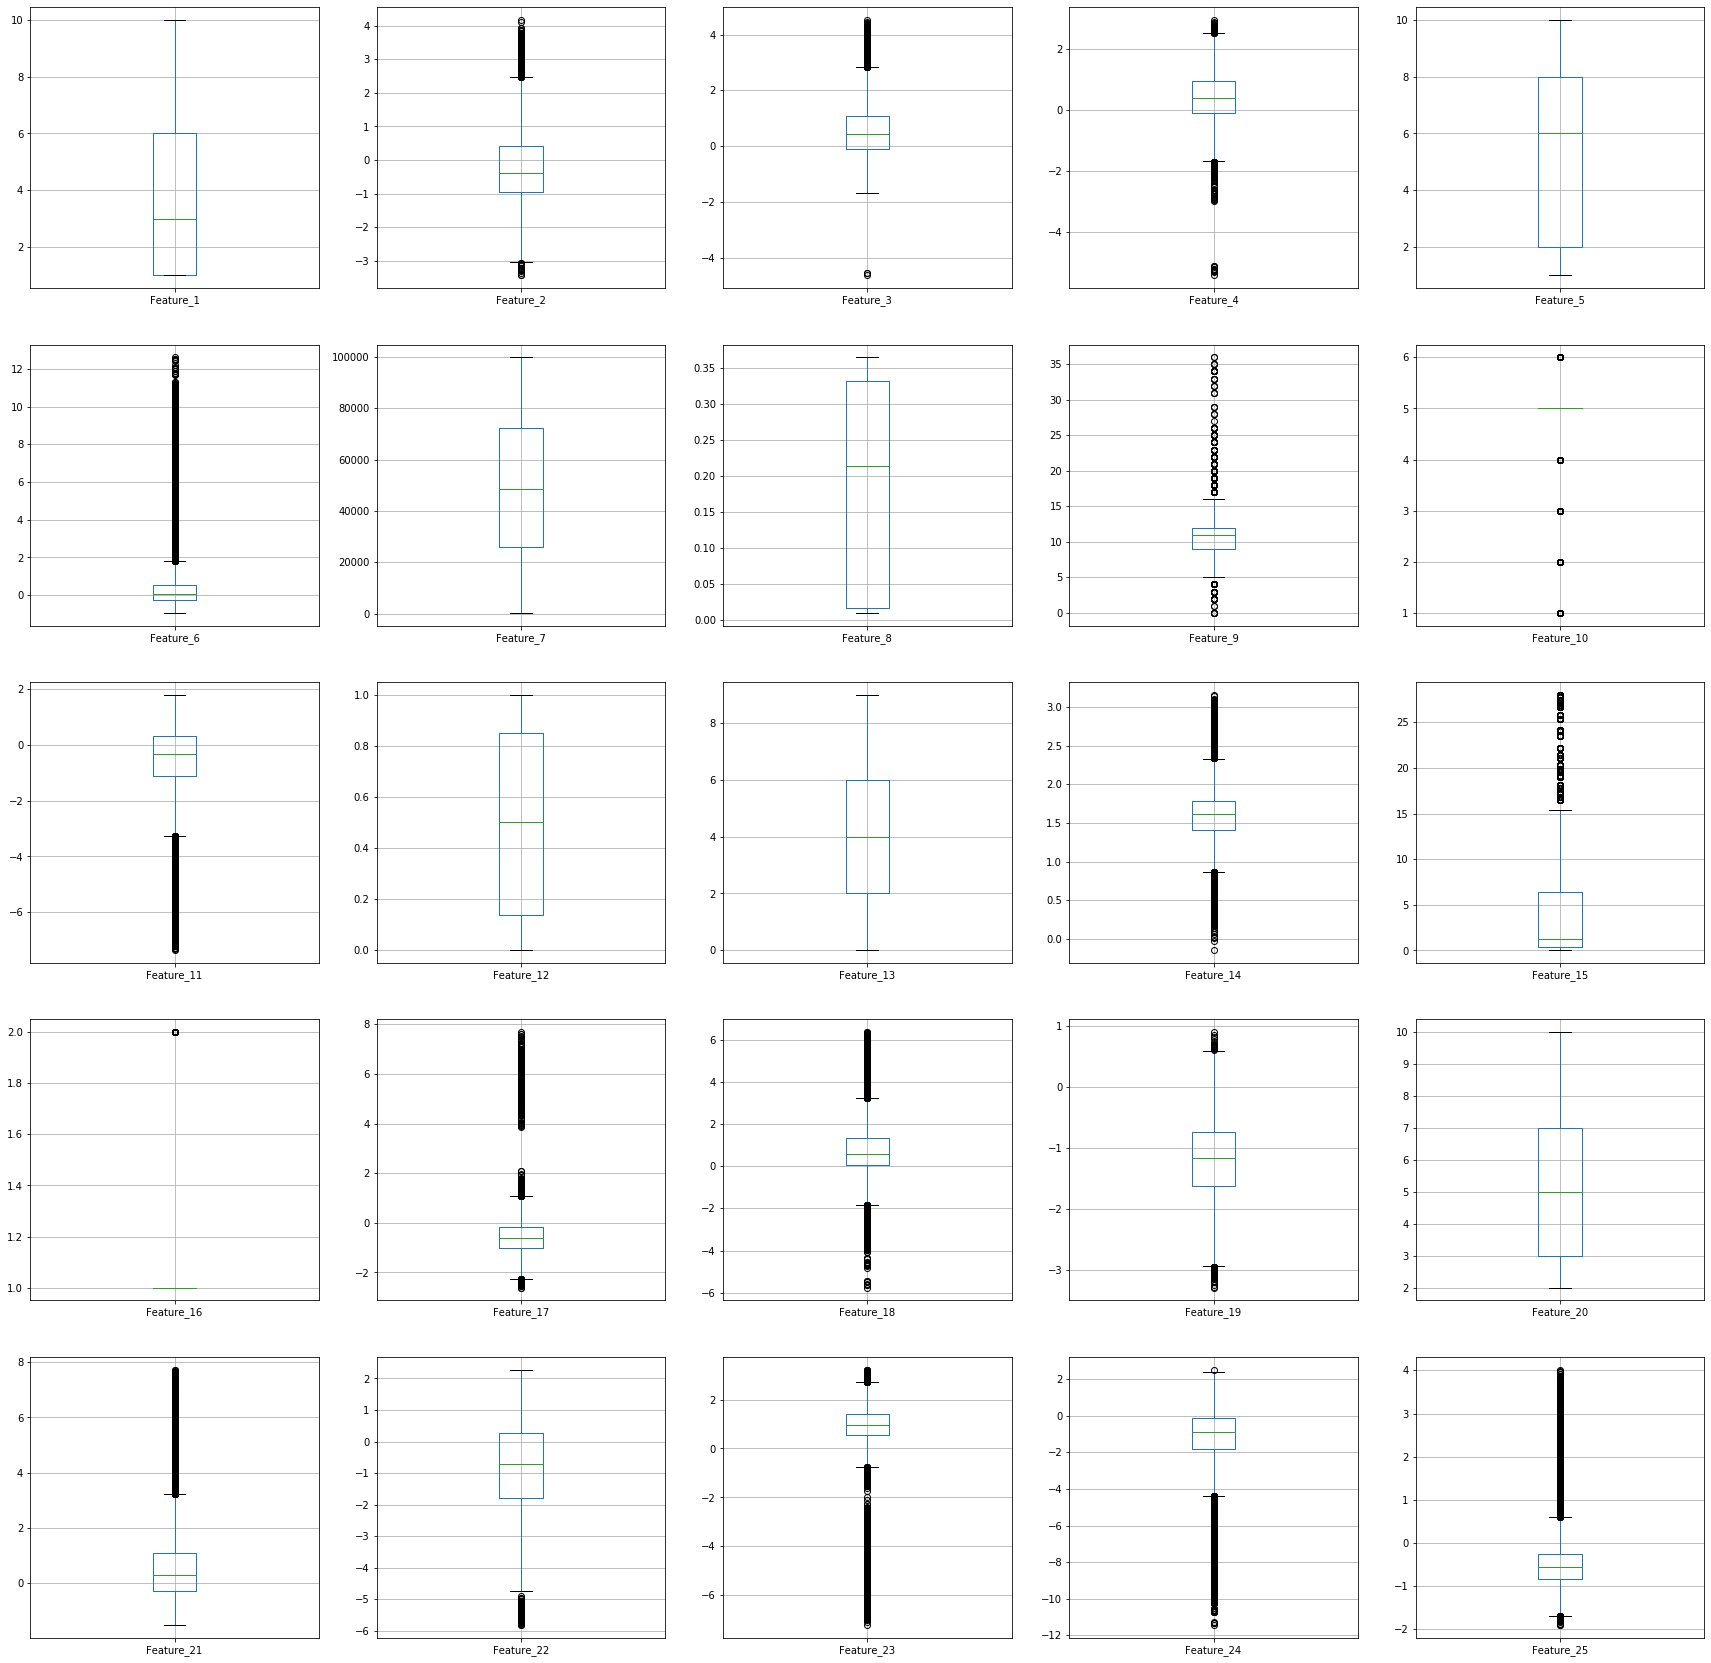

In [7]:
#pllotting boxplots
plt.figure(figsize=(30,30))
cole=[]
for i, col in enumerate(list(df.columns)[1:26]):
    ax1=plt.subplot(5, 5, i + 1)
    if df[col].nunique(dropna=True)<50:
        cole+=[col];
    df.boxplot(col);

In [8]:
df['Feature_8'].unique()

array([0.2254, 0.0166, 0.365 , 0.2654, 0.2138, 0.2064, 0.2119, 0.3583,
       0.2109, 0.0158, 0.3318, 0.2208, 0.3418, 0.0171,    nan, 0.2986,
       0.0111, 0.2087, 0.2323, 0.01  , 0.3451, 0.0099, 0.3484, 0.0163,
       0.0142, 0.0101, 0.0105, 0.0107, 0.0098, 0.0102, 0.0164, 0.0126,
       0.0174])

In [9]:
df['Feature_9'].unique()

array([11., 13.,  9.,  8.,  6., 10., 14., 17.,  7., nan, 12., 16., 15.,
        5., 19.,  4., 18., 22., 21., 20., 34., 23.,  3.,  2., 35., 24.,
       32., 26., 36., 31., 25., 33.,  0., 28., 27., 29.,  1.])

In [10]:
del cole[2]

In [11]:
df[cole]=df[cole].astype(str)

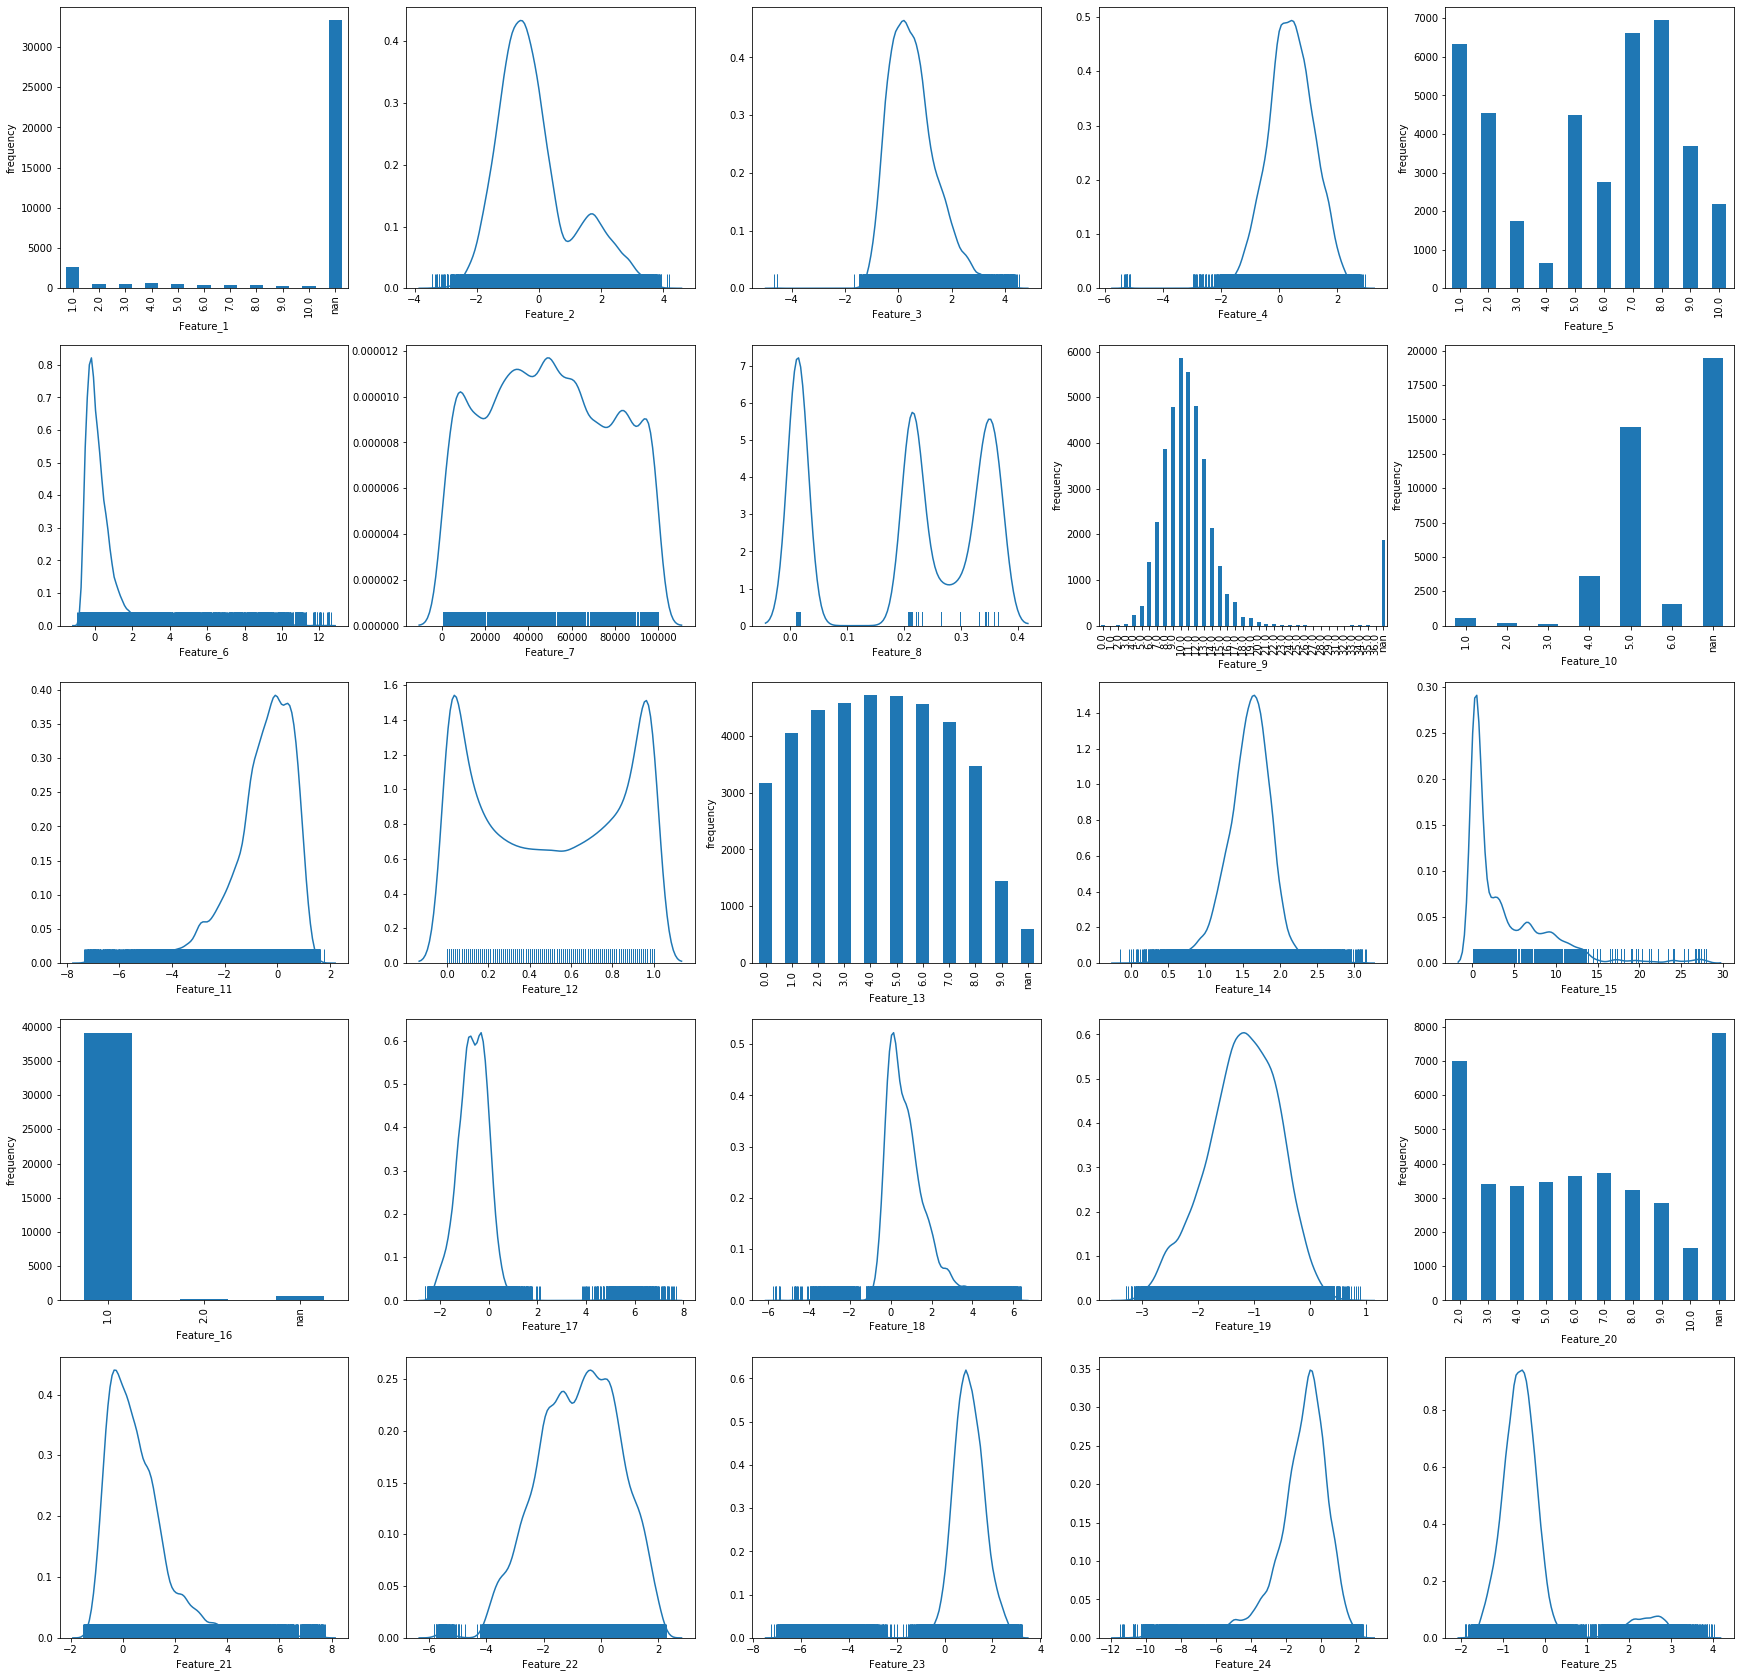

In [12]:
#pllotting distribution plots and bargraphs.
plt.figure(figsize=(30,30))
for i, col in enumerate(list(df.columns)[1:26]):
    ax2=plt.subplot(5, 5, i + 1)
    if df[col].dtype== object:
        df[col].astype(float).value_counts(dropna=False).sort_index().plot('bar');
        ax2.set( xlabel =col , ylabel="frequency")
    else:
        sns.distplot(df[col].dropna(), hist=False, rug=True);

In [13]:
df[cole]=df[cole].astype(float)
cole

['Feature_1',
 'Feature_5',
 'Feature_9',
 'Feature_10',
 'Feature_13',
 'Feature_16',
 'Feature_20']

In [14]:
df.isnull().sum()

Id                     0
Feature_1          33313
Feature_2           9146
Feature_3           1237
Feature_4           7721
Feature_5              0
Feature_6           1933
Feature_7              0
Feature_8            469
Feature_9           1875
Feature_10         19471
Feature_11           987
Feature_12          1096
Feature_13           594
Feature_14           728
Feature_15          2141
Feature_16           610
Feature_17           646
Feature_18           568
Feature_19          1190
Feature_20          7826
Feature_21          1018
Feature_22          1345
Feature_23          1711
Feature_24           726
Feature_25           655
Ret_MinusTwo           0
Ret_MinusOne           0
Ret_2               1054
Ret_3               1245
                   ...  
Ret_155                0
Ret_156                0
Ret_157                0
Ret_158                0
Ret_159                0
Ret_160                0
Ret_161                0
Ret_162                0
Ret_163                0


In [15]:
#Removing low performing features
df=df.drop(columns=['Feature_1','Feature_2','Feature_4','Feature_10','Feature_20'],axis=1)

In [16]:
for x in cole:
    if x not in df.columns:
        cole.remove(x)

In [17]:
cole

['Feature_5', 'Feature_9', 'Feature_13', 'Feature_16']

In [18]:
df['Feature_16'].fillna(1.0, inplace=True)

In [19]:
for col in df.columns[1:21]:
    print(col)
    df[col]=df[col].apply(lambda x: np.random.choice(df[col].dropna().values) if math.isnan(x) else x)

Feature_3
Feature_5
Feature_6
Feature_7
Feature_8
Feature_9
Feature_11
Feature_12
Feature_13
Feature_14
Feature_15
Feature_16
Feature_17
Feature_18
Feature_19
Feature_21
Feature_22
Feature_23
Feature_24
Feature_25


In [20]:
df.isnull().sum()

Id                    0
Feature_3             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_16            0
Feature_17            0
Feature_18            0
Feature_19            0
Feature_21            0
Feature_22            0
Feature_23            0
Feature_24            0
Feature_25            0
Ret_MinusTwo          0
Ret_MinusOne          0
Ret_2              1054
Ret_3              1245
Ret_4              1202
Ret_5              1275
Ret_6              1320
Ret_7              1228
Ret_8              1210
                   ... 
Ret_155               0
Ret_156               0
Ret_157               0
Ret_158               0
Ret_159               0
Ret_160               0
Ret_161               0
Ret_162               0
Ret_163               0
Ret_164               0
Ret_165         

In [21]:
df.head()

Id  Feature_3  Feature_5  Feature_6  Feature_7  Feature_8  Feature_9  \
0   1   0.070685        8.0  -0.761152      75751     0.2254       11.0   
1   2   0.433342        3.0   0.388896      17369     0.0166       13.0   
2   3   0.739591        9.0   0.471947       8277     0.3650        9.0   
3   4   1.568248        5.0   0.120653      22508     0.2654       13.0   
4   5   2.765531        7.0   4.866985      22423     0.2138       13.0   

   Feature_11  Feature_12  Feature_13  ...   Ret_175   Ret_176   Ret_177  \
0   -0.961740        0.49         5.0  ... -0.002688  0.002246 -0.000838   
1   -0.409923        0.71         9.0  ... -0.000129  0.000123  0.000248   
2   -0.473024        0.03         6.0  ... -0.000524 -0.000394  0.000116   
3   -2.138383        0.00         6.0  ...  0.000346 -0.000090  0.000288   
4   -4.795565        0.97         5.0  ... -0.001235  0.000027  0.002449   

        Ret_178   Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  \
0 -6.953224e-04  0.000003 -0.001974    -0.019512     0.028846   
1  3.315418e-07  0.000003  0.000027    -0.002939    -0.010253   
2  5.322557e-04  0.000274  0.000784    -0.024791     0.015711   
3 -1.281102e-04  0.000074  0.000341    -0.005680    -0.002190   
4  8.619882e-06  0.001209 -0.000004     0.036104    -0.026552   

   Weight_Intraday  Weight_Daily  
0     1.251508e+06  1.564385e+06  
1     1.733950e+06  2.167438e+06  
2     1.529197e+06  1.911497e+06  
3     1.711569e+06  2.139462e+06  
4     1.267270e+06  1.584088e+06  

[5 rows x 206 columns]

In [22]:
df[cole]=df[cole].astype(str)

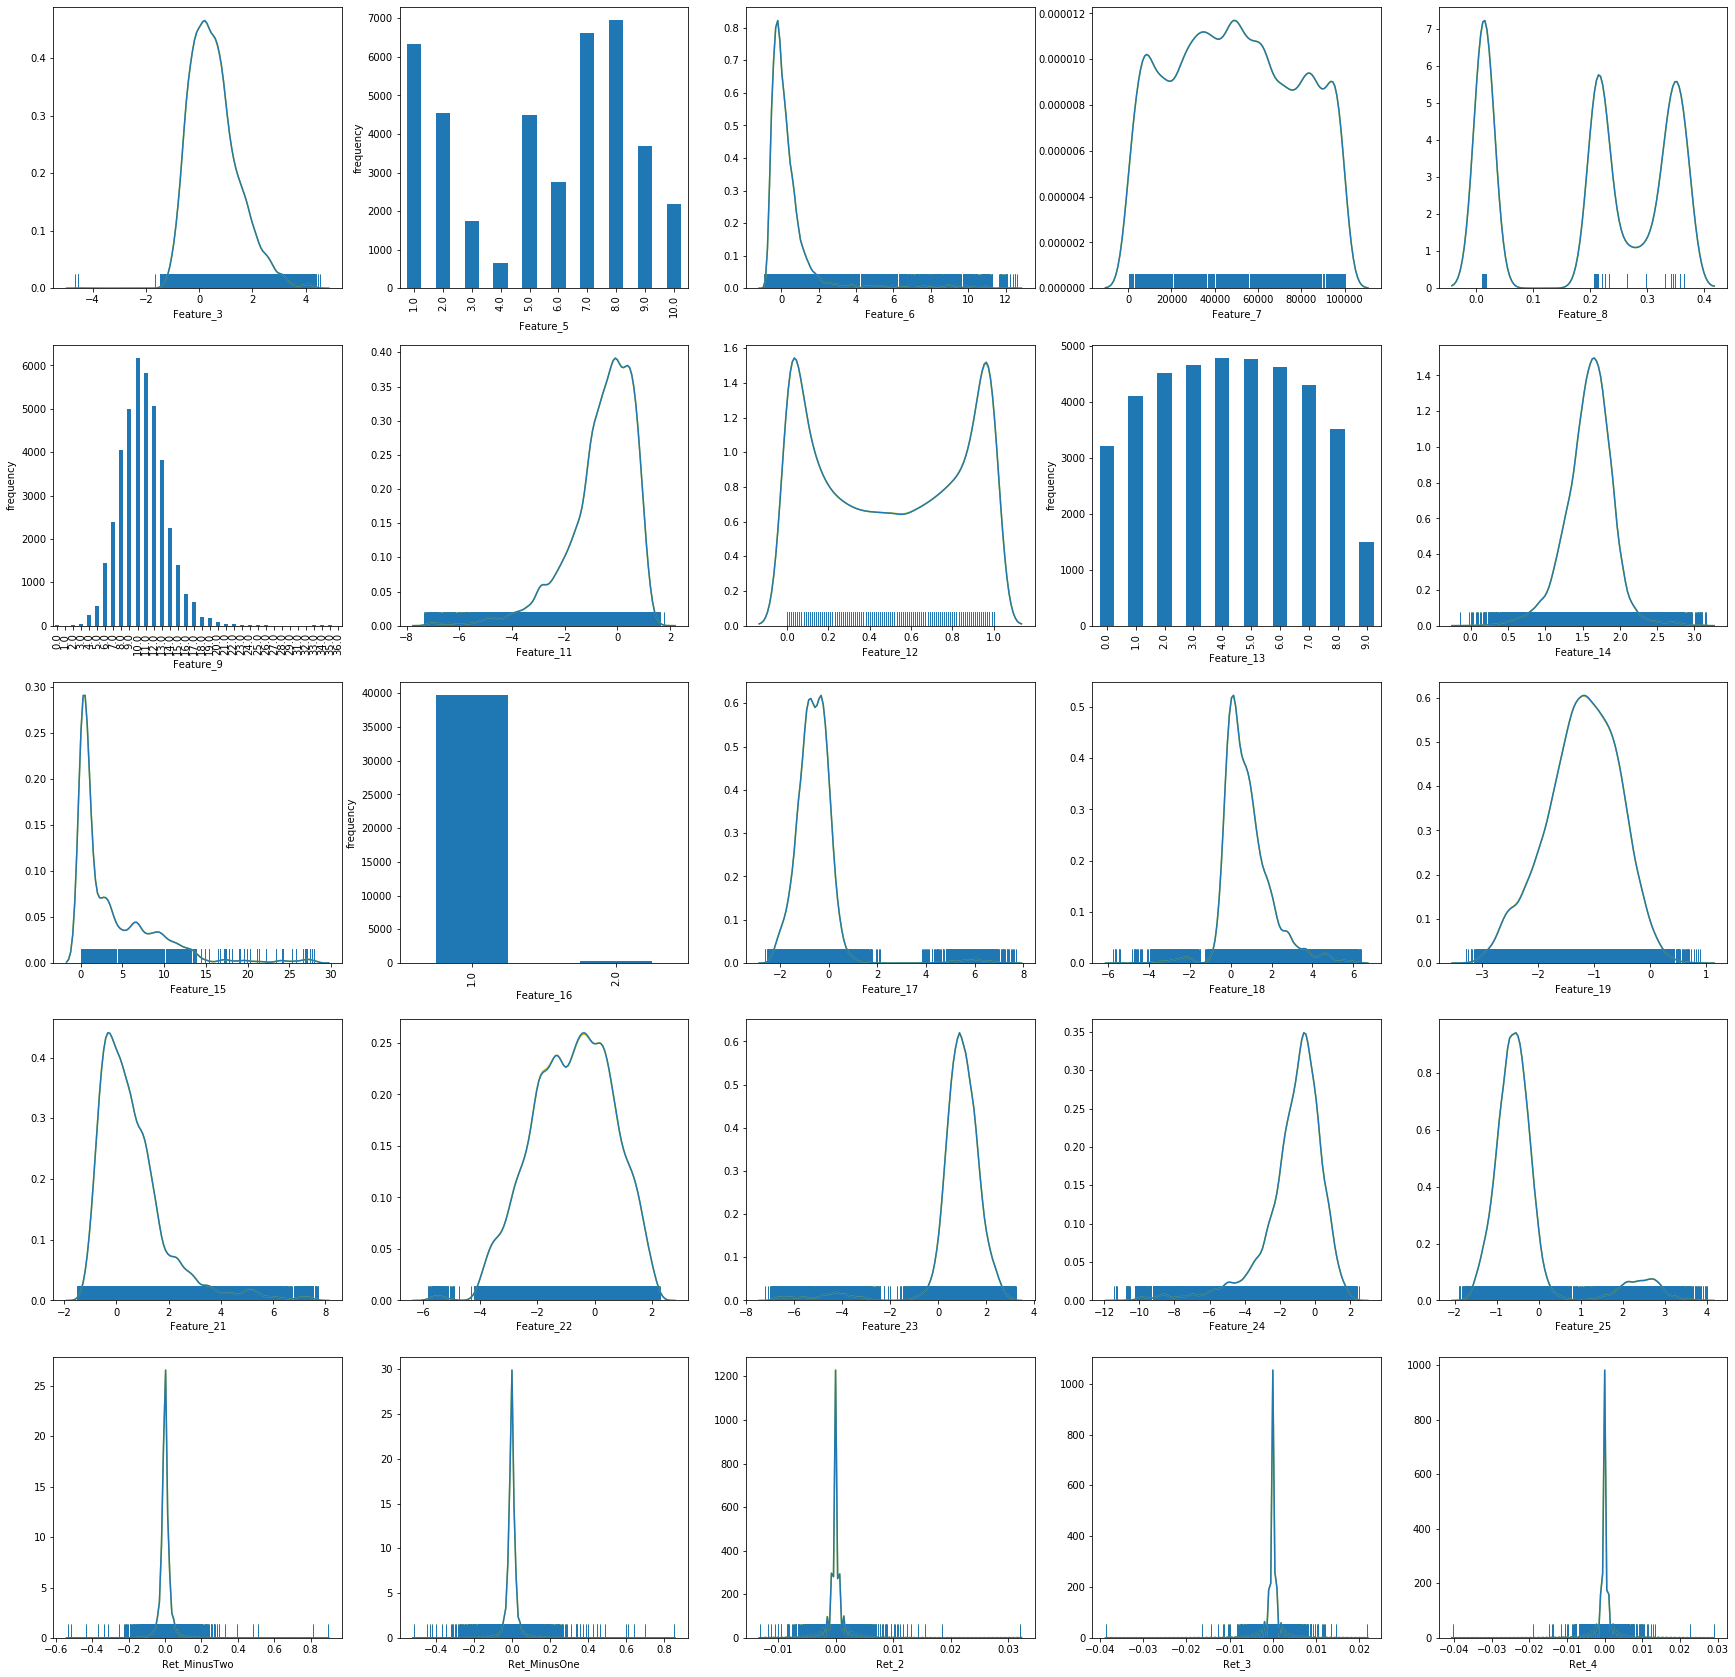

In [23]:
#pllotting distribution plots and bargraphs.
plt.figure(figsize=(30,30))
for i, col in enumerate(list(df.columns)[1:26]):
    ax2=plt.subplot(5, 5, i + 1)
    if df[col].dtype== object:
        df[col].astype(float).value_counts(dropna=False).sort_index().plot('bar');
        ax2.set( xlabel =col , ylabel="frequency")
    else:
        sns.distplot(df2[col].dropna(), hist=False, rug=True,color='y')
        sns.distplot(df[col].dropna(), hist=False, rug=True);

In [24]:
train_df =df.copy()

[14:22:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


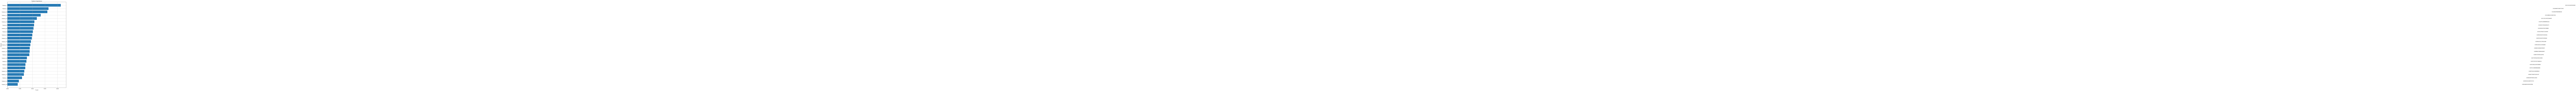

In [24]:
#getting the importance of all features using Xgboost Dmatrix [Gain]
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.Ret_MinusTwo.values
colmn=train_df.columns[1:26]
train_X= train_df[colmn]


xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=.8, ax=ax,importance_type="gain")
plt.show()


[19:13:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


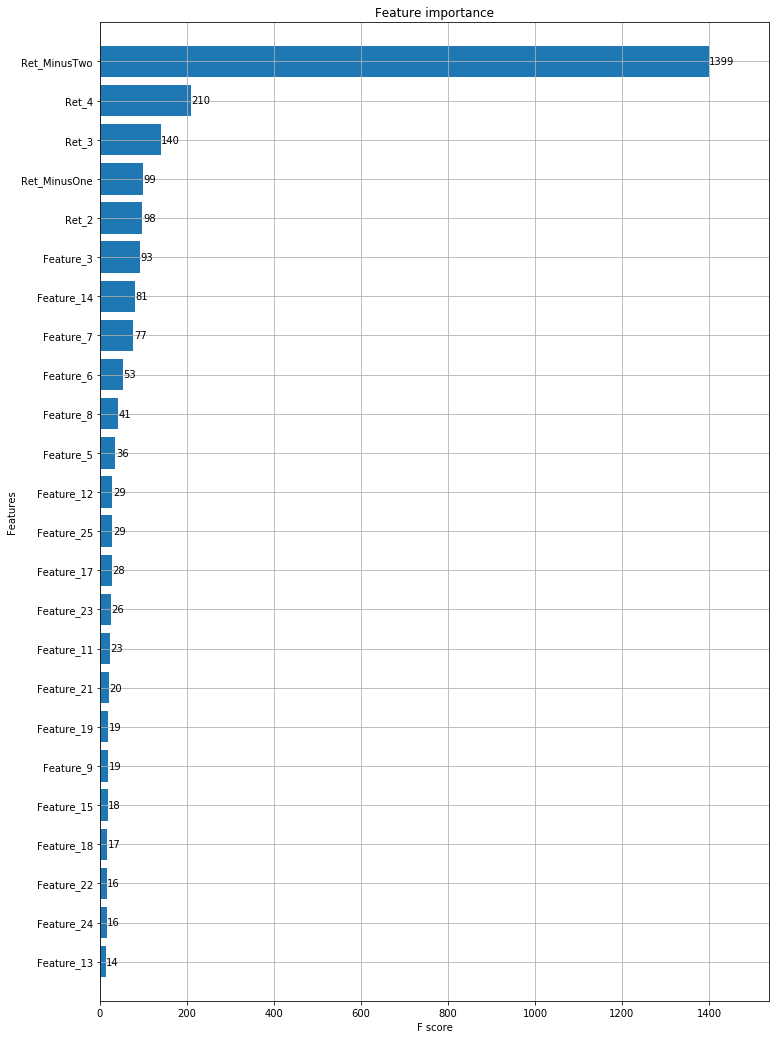

In [25]:
#getting the importance of all features using Xgboost Dmatrix [weights]
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.Ret_MinusTwo.values
colmn=train_df.columns[1:26]
train_X= train_df[colmn]


xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=.8, ax=ax,importance_type="weight")
plt.show()


[14:23:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


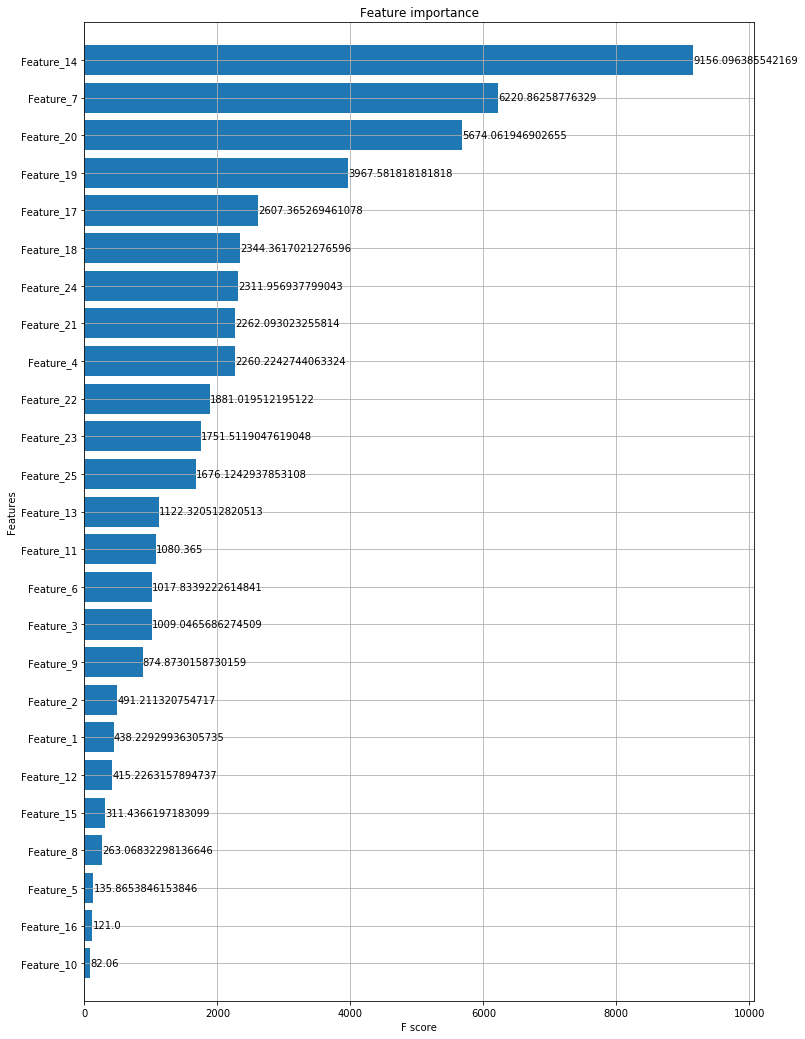

In [25]:
#getting the importance of all features using Xgboost Dmatrix [cover]
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.Ret_MinusTwo.values
colmn=train_df.columns[1:26]
train_X= train_df[colmn]


xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=.8, ax=ax,importance_type="cover")
plt.show()


In [26]:
df=df.drop(columns=["Feature_16","Feature_21","Feature_24"])

In [27]:
df.head()

Id  Feature_3 Feature_5  Feature_6  Feature_7  Feature_8 Feature_9  \
0   1   0.070685       8.0  -0.761152      75751     0.2254      11.0   
1   2   0.433342       3.0   0.388896      17369     0.0166      13.0   
2   3   0.739591       9.0   0.471947       8277     0.3650       9.0   
3   4   1.568248       5.0   0.120653      22508     0.2654      13.0   
4   5   2.765531       7.0   4.866985      22423     0.2138      13.0   

   Feature_11  Feature_12 Feature_13  ...   Ret_175   Ret_176   Ret_177  \
0   -0.961740        0.49        5.0  ... -0.002688  0.002246 -0.000838   
1   -0.409923        0.71        9.0  ... -0.000129  0.000123  0.000248   
2   -0.473024        0.03        6.0  ... -0.000524 -0.000394  0.000116   
3   -2.138383        0.00        6.0  ...  0.000346 -0.000090  0.000288   
4   -4.795565        0.97        5.0  ... -0.001235  0.000027  0.002449   

        Ret_178   Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  \
0 -6.953224e-04  0.000003 -0.001974    -0.019512     0.028846   
1  3.315418e-07  0.000003  0.000027    -0.002939    -0.010253   
2  5.322557e-04  0.000274  0.000784    -0.024791     0.015711   
3 -1.281102e-04  0.000074  0.000341    -0.005680    -0.002190   
4  8.619882e-06  0.001209 -0.000004     0.036104    -0.026552   

   Weight_Intraday  Weight_Daily  
0     1.251508e+06  1.564385e+06  
1     1.733950e+06  2.167438e+06  
2     1.529197e+06  1.911497e+06  
3     1.711569e+06  2.139462e+06  
4     1.267270e+06  1.584088e+06  

[5 rows x 203 columns]

In [28]:
df.to_csv(r'D:/Acads/summers2019/IME672/Project/Dataset/train_prepros1.csv')

In [2]:
df=pd.read_csv("D:/Acads/summers2019/IME672/Project/Dataset/train_prepros1.csv",index_col=0)# loading the dataset

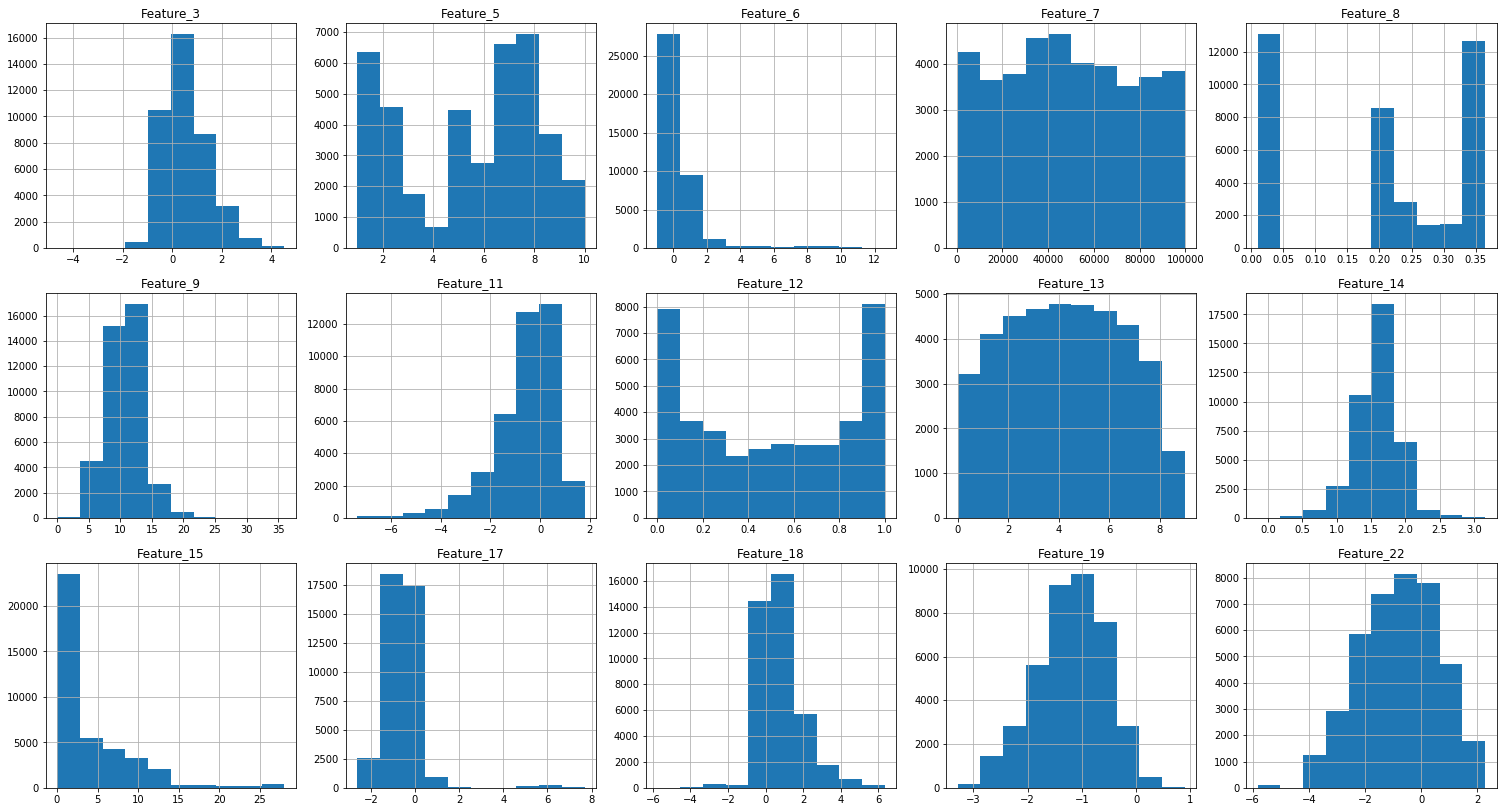

In [30]:
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(df.columns)[1:16]):
    plt.subplot(5, 5, i + 1)
    df[col].hist()
    plt.title(col)

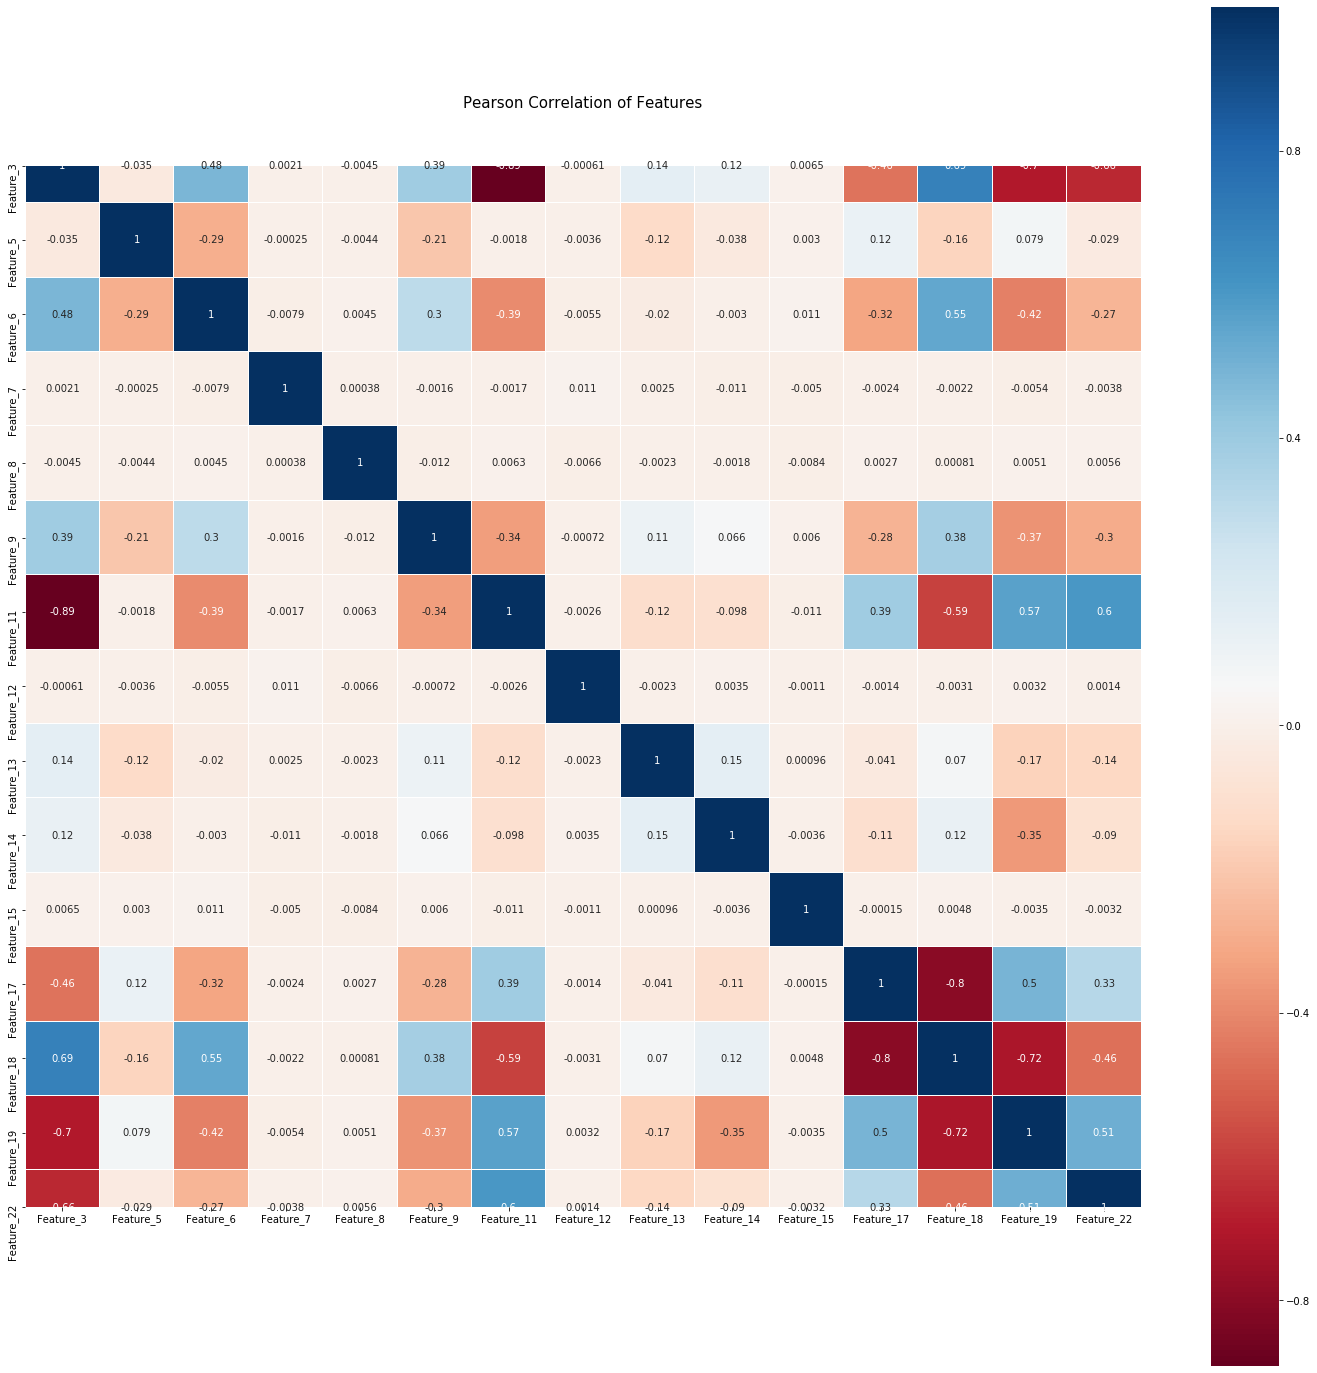

In [31]:
colormap = plt.cm.RdBu
plt.figure(figsize=(25,25))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[df.columns[1:16]].corr(),linewidths=.1,vmax=1,
            square=True, cmap=colormap, linecolor='white', annot=True)

In [4]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
df=df.drop(df[to_drop[1:-1]], axis=1)
to_drop[1:-1]


['Feature_18']

In [4]:
to_drop

['Feature_11', 'Feature_18', 'Weight_Daily']

In [5]:
df.isnull().sum()

Id                    0
Feature_3             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
Feature_17            0
Feature_19            0
Feature_22            0
Feature_23            0
Feature_25            0
Ret_MinusTwo          0
Ret_MinusOne          0
Ret_2              1054
Ret_3              1245
Ret_4              1202
Ret_5              1275
Ret_6              1320
Ret_7              1228
Ret_8              1210
Ret_9              1317
Ret_10             1313
Ret_11             1369
Ret_12             1238
                   ... 
Ret_155               0
Ret_156               0
Ret_157               0
Ret_158               0
Ret_159               0
Ret_160               0
Ret_161               0
Ret_162               0
Ret_163               0
Ret_164               0
Ret_165         

In [35]:
for i, col in enumerate(list(df.columns)[1:200]):
        df[col].fillna(df[col].mean(), inplace=True)


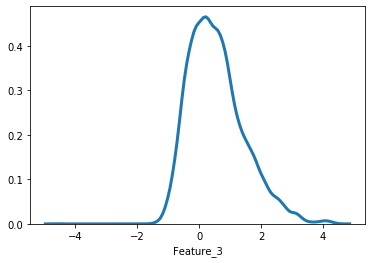

In [36]:
sns.distplot(df.Feature_3, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},)

In [37]:
df.isnull().sum()

Id                 0
Feature_3          0
Feature_5          0
Feature_6          0
Feature_7          0
Feature_8          0
Feature_9          0
Feature_11         0
Feature_12         0
Feature_13         0
Feature_14         0
Feature_15         0
Feature_17         0
Feature_19         0
Feature_22         0
Feature_23         0
Feature_25         0
Ret_MinusTwo       0
Ret_MinusOne       0
Ret_2              0
Ret_3              0
Ret_4              0
Ret_5              0
Ret_6              0
Ret_7              0
Ret_8              0
Ret_9              0
Ret_10             0
Ret_11             0
Ret_12             0
                  ..
Ret_155            0
Ret_156            0
Ret_157            0
Ret_158            0
Ret_159            0
Ret_160            0
Ret_161            0
Ret_162            0
Ret_163            0
Ret_164            0
Ret_165            0
Ret_166            0
Ret_167            0
Ret_168            0
Ret_169            0
Ret_170            0
Ret_171      

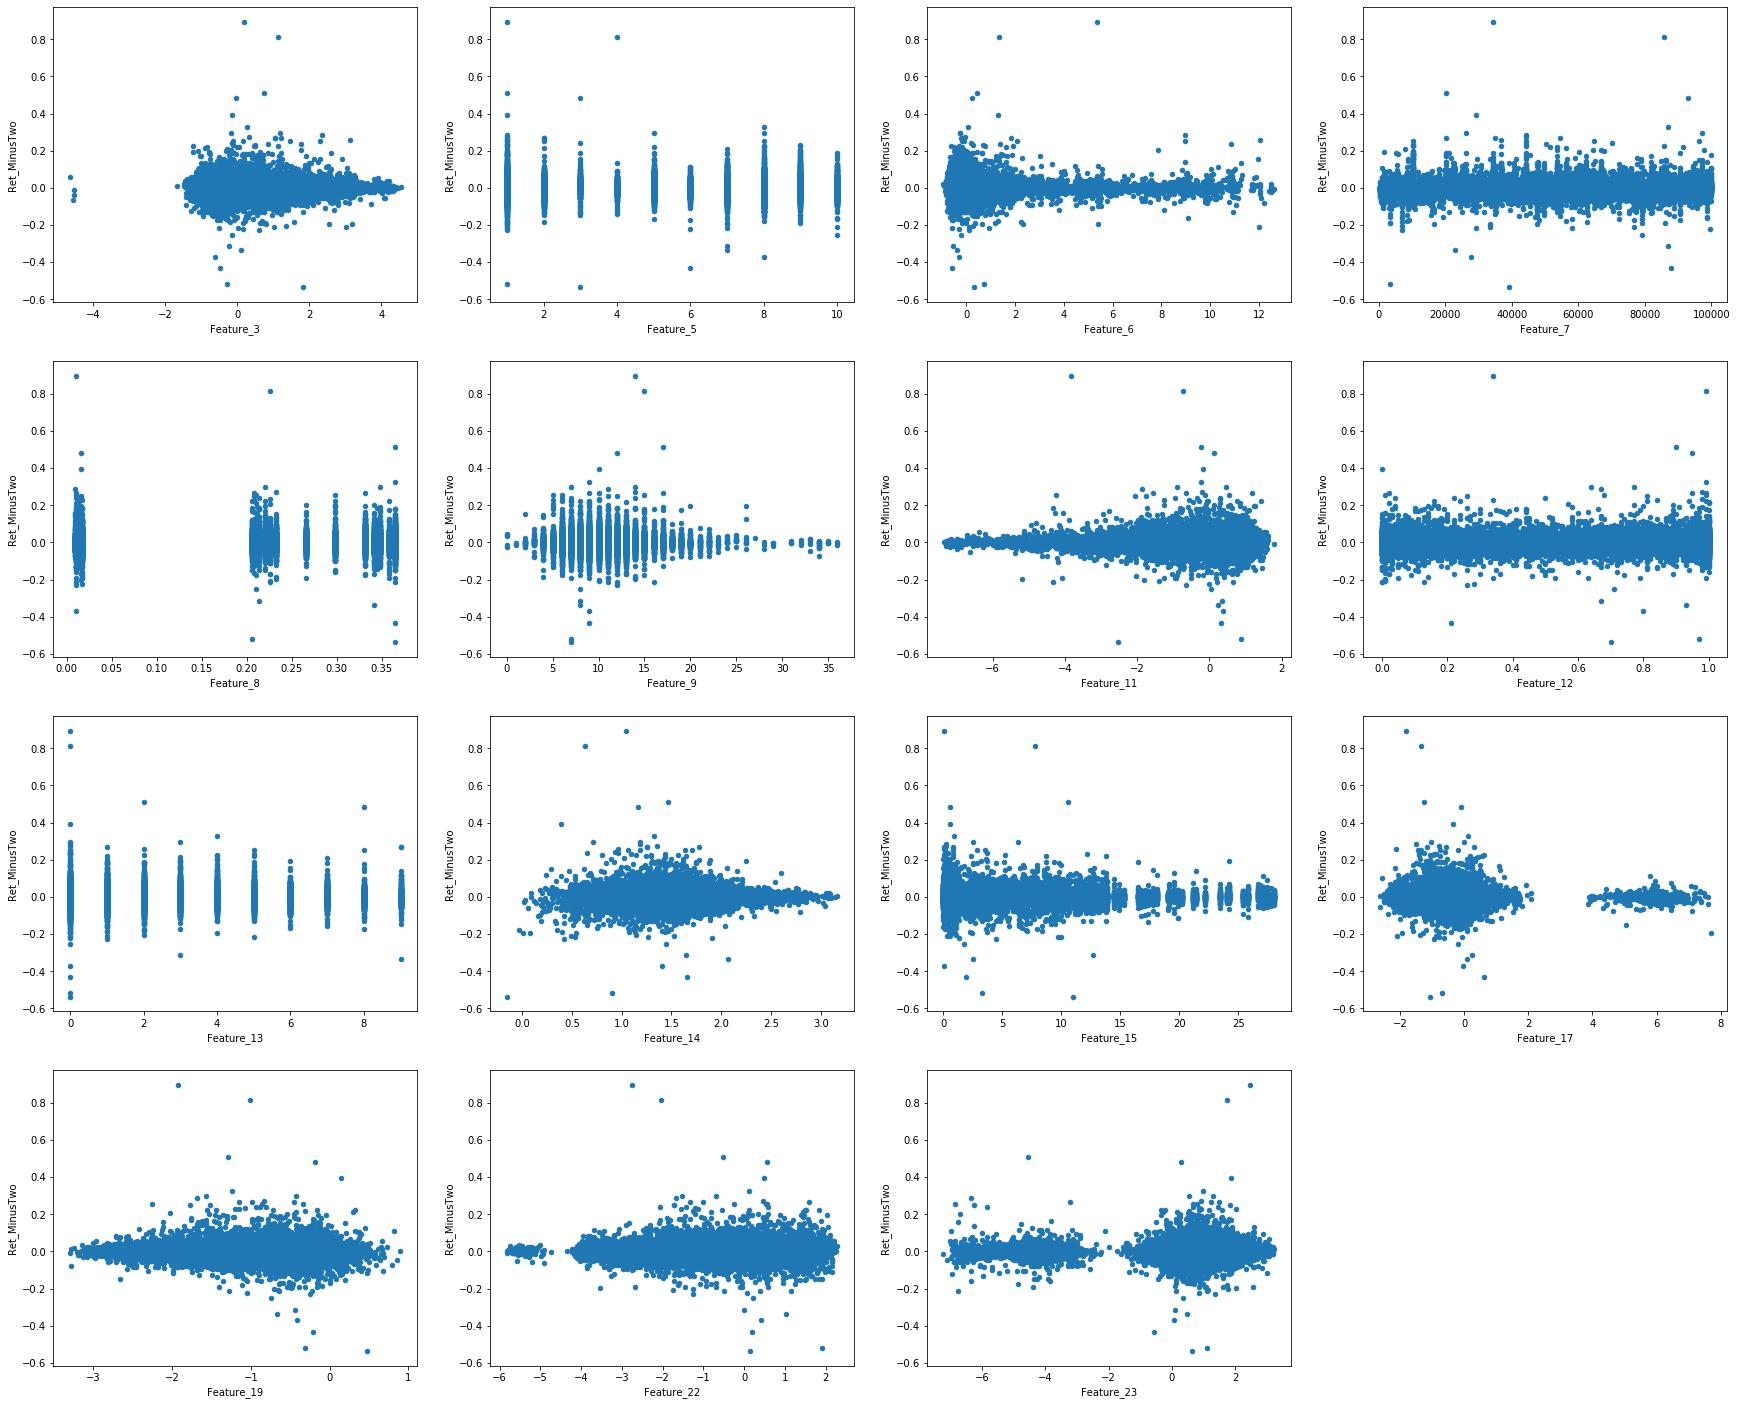

In [38]:
for i, col in enumerate(list(df.columns)[1:16]):
    ax1=plt.subplot(4, 4, i + 1)
    df.plot.scatter(x=col, y='Ret_MinusTwo',figsize=(30,25),ax=ax1);
    

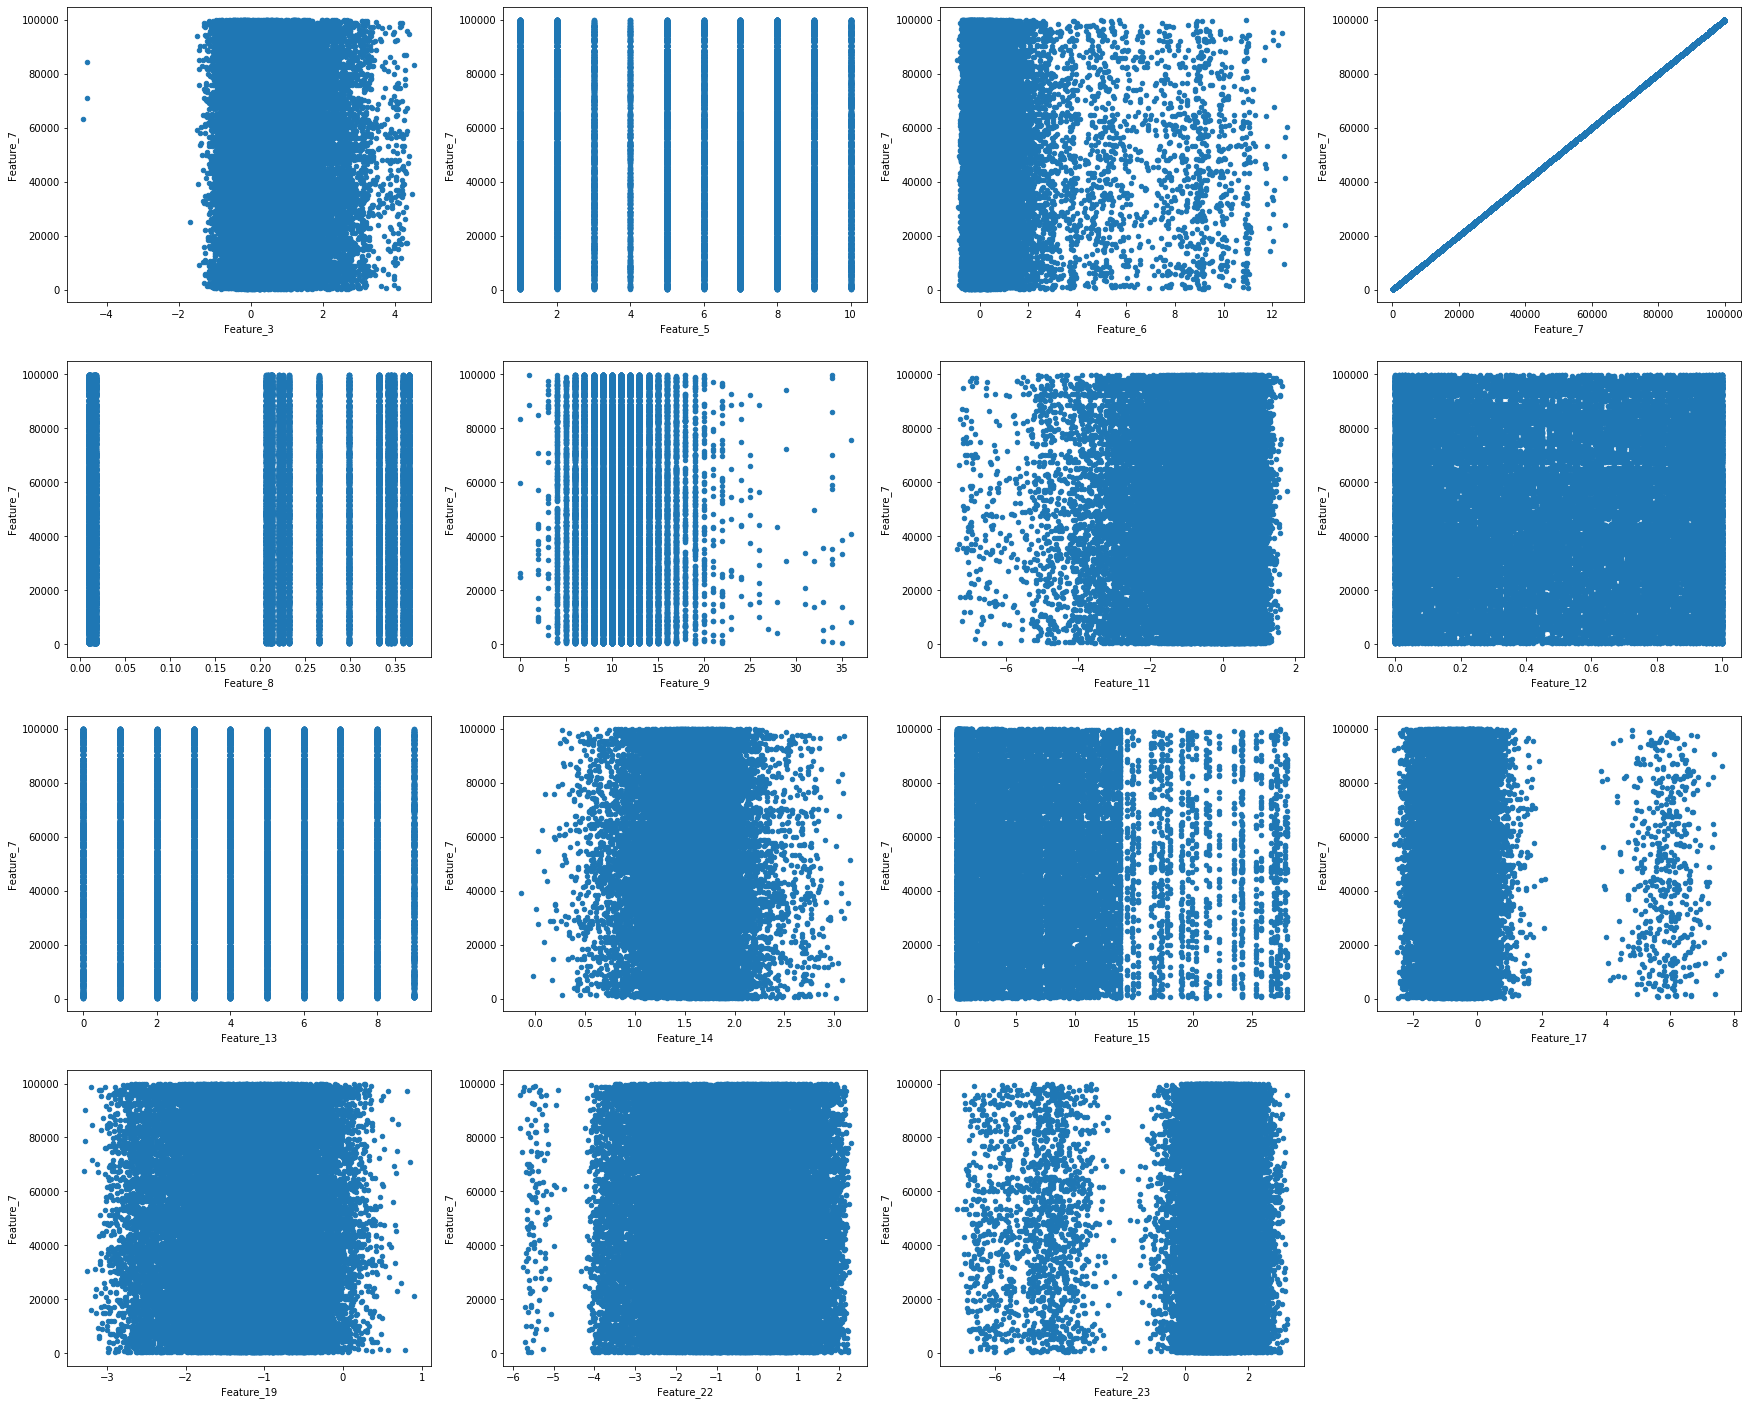

In [31]:
for i, col in enumerate(list(df.columns)[1:16]):
    ax1=plt.subplot(4, 4, i + 1)
    df.plot.scatter(x=col, y='Feature_7',figsize=(30,25),ax=ax1);
    

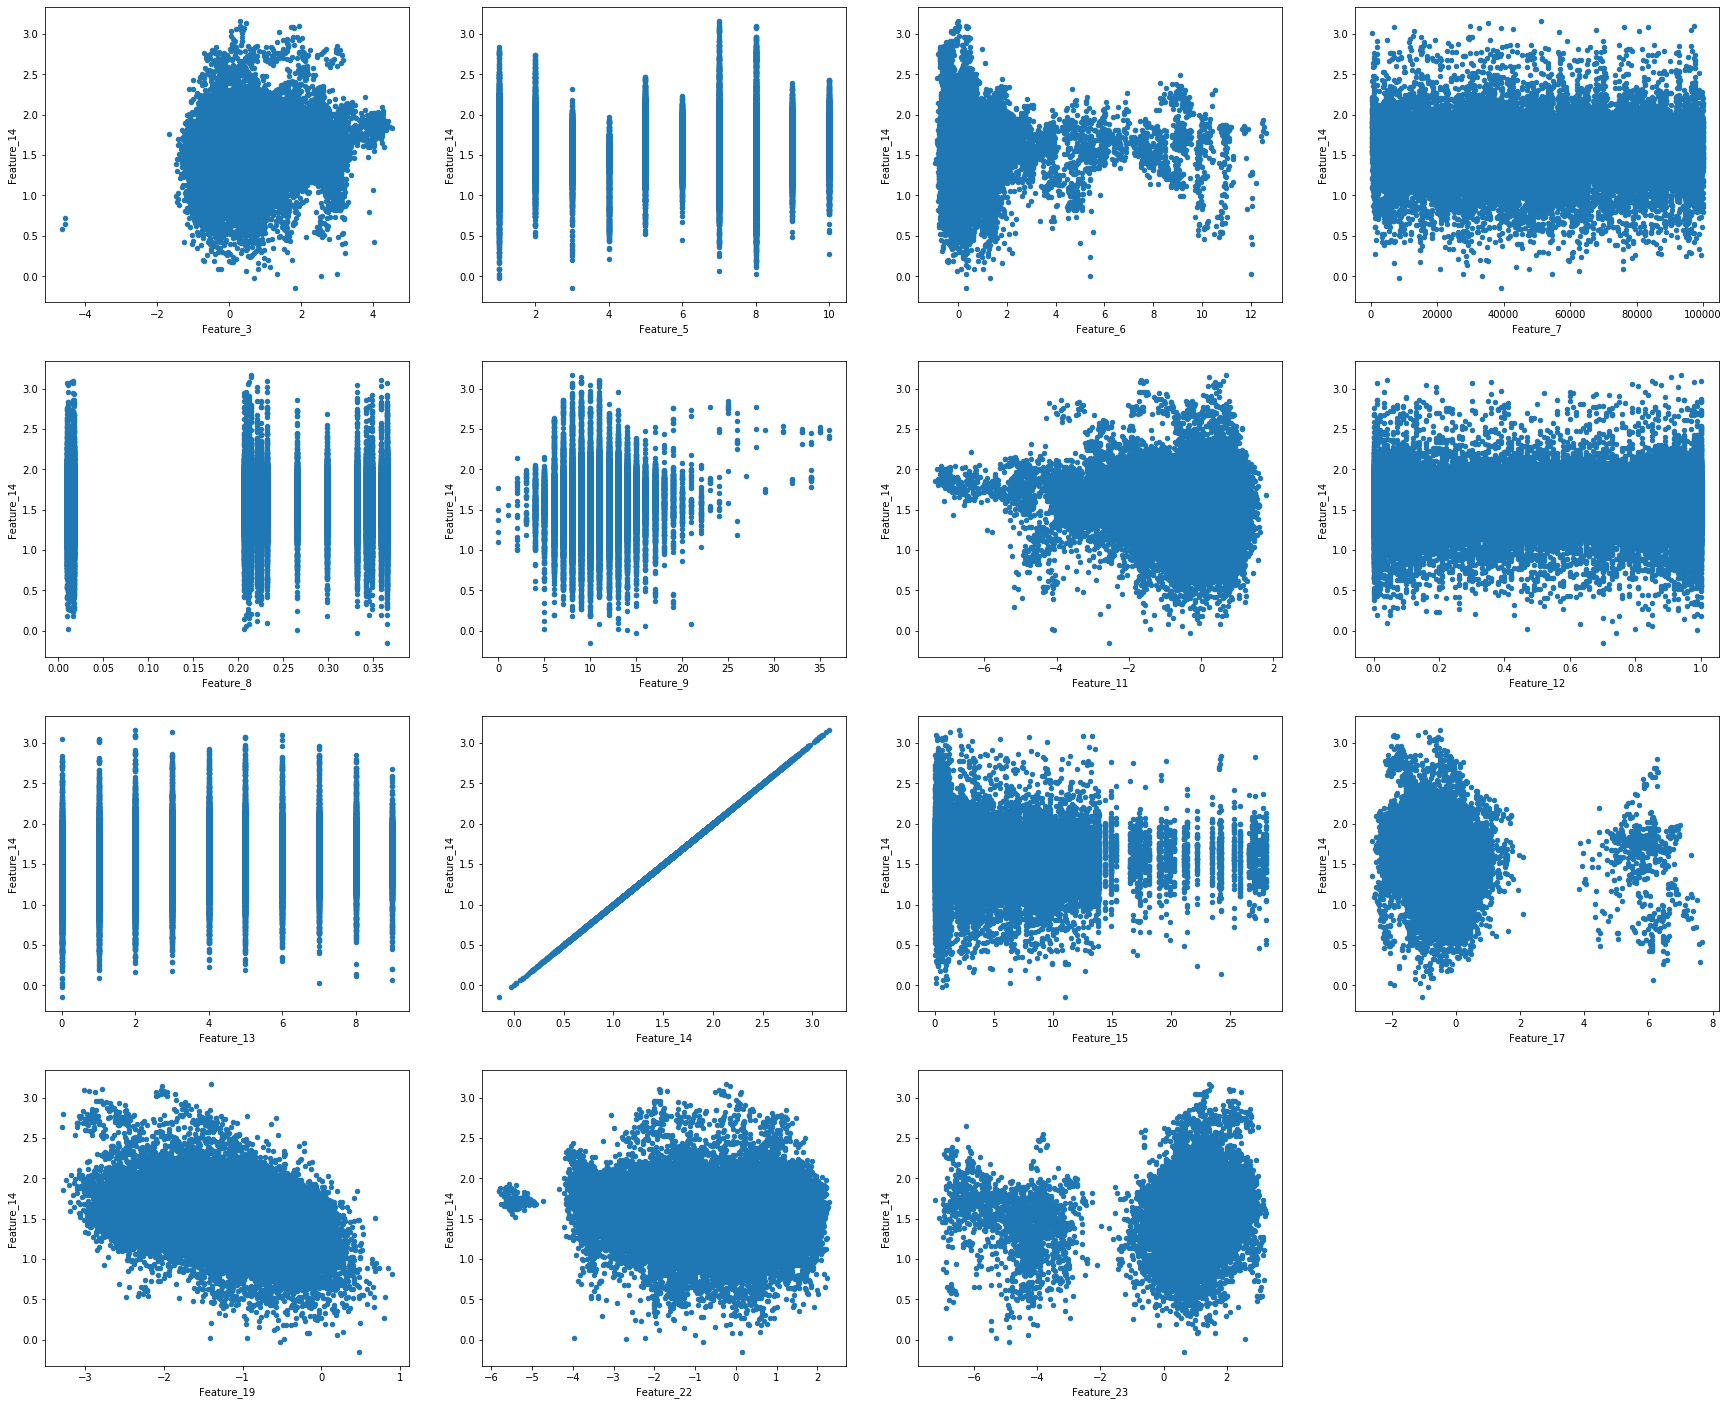

In [32]:
for i, col in enumerate(list(df.columns)[1:16]):
    ax1=plt.subplot(4, 4, i + 1)
    df.plot.scatter(x=col, y='Feature_14',figsize=(30,25),ax=ax1);
    

### Checking Mean distribution of Ret_PlusTwo for Different features 

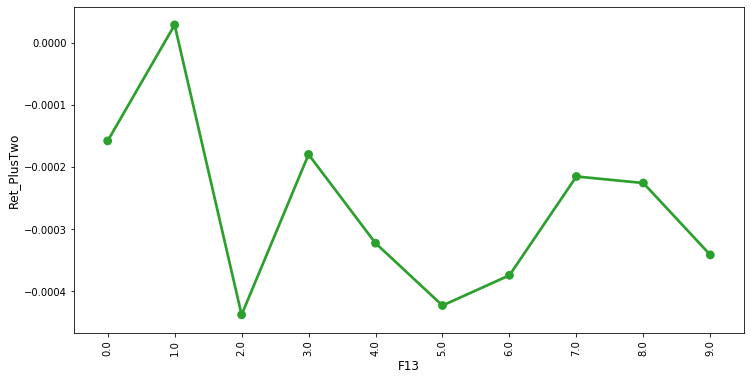

In [40]:
grouped_df = df.groupby('Feature_13')['Ret_PlusTwo'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,6))
sns.pointplot(grouped_df.Feature_13.values, grouped_df.Ret_PlusTwo.values, alpha=0.8, color=color[2])
plt.ylabel('Ret_PlusTwo', fontsize=12)
plt.xlabel('F13', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

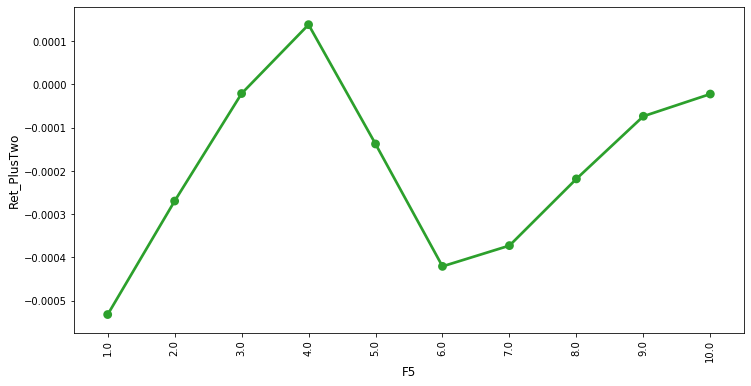

In [41]:
grouped_df = df.groupby('Feature_5')['Ret_PlusTwo'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,6))
sns.pointplot(grouped_df.Feature_5.values, grouped_df.Ret_PlusTwo.values, alpha=0.8, color=color[2])
plt.ylabel('Ret_PlusTwo', fontsize=12)
plt.xlabel('F5', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
x=df[df.columns[1:16]].sample(n=200).values
x = preprocessing.StandardScaler().fit_transform(x)

## PCA

In [41]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

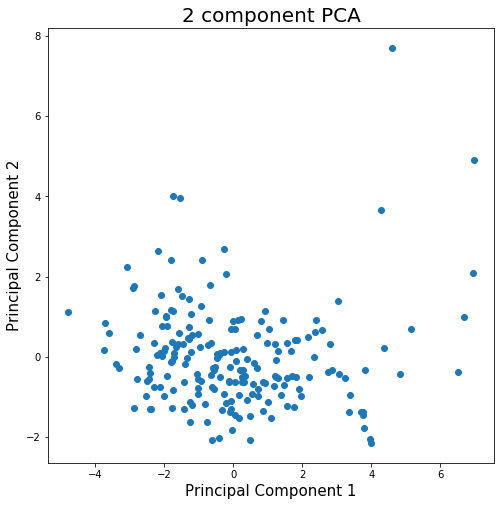

In [42]:
finalDf=principalDf
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'])

Text(0.5, 0, 'PC3')

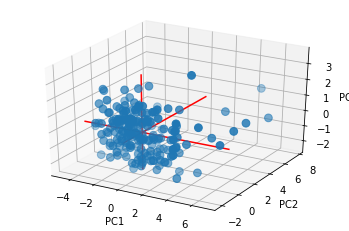

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'],finalDf['principal component 3'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf['principal component 1']), max(finalDf['principal component 1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf['principal component 2']), max(finalDf['principal component 2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(finalDf['principal component 3']), max(finalDf['principal component 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


## KMeans

In [ ]:
# km = KMeans(
#     n_clusters=12, init='random',
#     n_init=2, max_iter=300, 
#     tol=1e-04, random_state=0
# )
# y_km = km.fit_predict(df[m1:16])

## Xtreme Gradient Boosting

In [5]:
major_list = []

training_csv = df
testing_csv = pd.read_csv("D:/Acads/summers2019/IME672/Project/Dataset/test_2.csv")# loading the dataset

In [6]:
testing_csv.head()

Id  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1        1.0   1.412783  -0.056284        NaN       10.0   0.413226   
1   2        NaN        NaN   0.907973   1.002425        7.0  -0.257825   
2   3        NaN  -0.607583   1.076668   0.517865        5.0   0.947340   
3   4        NaN   2.230240   0.223222        NaN        1.0        NaN   
4   5        NaN   0.360399   0.597896  -0.145497       10.0   0.275744   

   Feature_7  Feature_8  Feature_9  ...   Ret_111   Ret_112   Ret_113  \
0      18871     0.2138       11.0  ...  0.000370 -0.000762       NaN   
1       5852     0.2138       13.0  ...  0.000457  0.000003 -0.000007   
2      76935     0.0105       10.0  ...  0.000003  0.000157 -0.000181   
3      84573     0.3318       13.0  ...  0.000010 -0.000792 -0.000479   
4      89615     0.0099        8.0  ...  0.000447  0.000489 -0.000233   

    Ret_114   Ret_115   Ret_116   Ret_117   Ret_118   Ret_119   Ret_120  
0  0.000366 -0.002444 -0.001301 -0.000917  0.000762 -0.000556  0.000759  
1 -0.000003 -0.000012 -0.000463 -0.000003 -0.000002  0.000468 -0.000012  
2  0.000003       NaN  0.000164  0.000353  0.000704 -0.000168 -0.000006  
3  0.000017  0.000170 -0.001079  0.000320  0.000006  0.001392 -0.001850  
4 -0.000495  0.000057 -0.000050 -0.000011 -0.000377  0.000227 -0.000114  

[5 rows x 147 columns]

In [7]:
training_csv.columns[0:25]

Index(['Id', 'Feature_3', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_17', 'Feature_19', 'Feature_22', 'Feature_23',
       'Feature_25', 'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4',
       'Ret_5', 'Ret_6', 'Ret_7'],
      dtype='object')

In [8]:
training_csv.head()
testing_csv=testing_csv.drop(columns=['Feature_1','Feature_2','Feature_4','Feature_10','Feature_20','Feature_16','Feature_21','Feature_24','Feature_18'])
testing_csv.columns[0:25]

Index(['Id', 'Feature_3', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8',
       'Feature_9', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_17', 'Feature_19', 'Feature_22', 'Feature_23',
       'Feature_25', 'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4',
       'Ret_5', 'Ret_6', 'Ret_7'],
      dtype='object')

In [9]:
trainval=training_csv.copy()
split=np.random.rand(trainval.shape[0])>0.8
train=trainval[split==False]
val=trainval[split==True]
test=val
score=0
predicted=val[val.columns[138:202]]
predicted.head()

Ret_121   Ret_122   Ret_123   Ret_124   Ret_125   Ret_126   Ret_127  \
2   0.000271  0.000126  0.000655 -0.000515 -0.000924 -0.000769  0.000282   
3   0.000210 -0.000301 -0.000142  0.000068 -0.000508 -0.000122  0.000295   
6   0.000005 -0.000163 -0.000478 -0.000481  0.000173  0.000170  0.000826   
18 -0.000418 -0.000869 -0.001296  0.000009 -0.001101 -0.001728 -0.000836   
27  0.000006 -0.000015 -0.000010  0.000016 -0.001168  0.001203 -0.000016   

     Ret_128   Ret_129   Ret_130  ...   Ret_175   Ret_176   Ret_177   Ret_178  \
2  -0.000120  0.000408 -0.000267  ... -0.000524 -0.000394  0.000116  0.000532   
3   0.000297 -0.000199 -0.000217  ...  0.000346 -0.000090  0.000288 -0.000128   
6  -0.000136 -0.000215 -0.000012  ...  0.000326 -0.000408  0.000086 -0.000012   
18  0.000170 -0.000009 -0.000316  ... -0.000869  0.000658  0.000003  0.003020   
27 -0.003555  0.001200  0.002403  ... -0.008361 -0.007115  0.001186 -0.007075   

     Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  Weight_Intraday  \
2   0.000274  0.000784    -0.024791     0.015711     1.529197e+06   
3   0.000074  0.000341    -0.005680    -0.002190     1.711569e+06   
6  -0.000006  0.000640    -0.011105    -0.030745     1.719166e+06   
18  0.000438 -0.000638     0.003166    -0.007578     1.675006e+06   
27 -0.005854 -0.003510     0.129496    -0.012954     1.340404e+06   

    Weight_Daily  
2   1.911497e+06  
3   2.139462e+06  
6   2.148958e+06  
18  2.093757e+06  
27  1.675506e+06  

[5 rows x 64 columns]

In [10]:
for col in  tqdm(list(trainval.columns[183:200])):
    if 'Ret_Plus' in col:
        weight = 'Weight_Daily'
    else:
        weight = 'Weight_Intraday'
    traindat = train.drop(columns=train.columns[138:]).values 
    traintar = train[col].values
    testdat  = test.drop(columns=train.columns[138:]).values
    testtar = test[col].values
    
    data_train = xgb.DMatrix(traindat,label=traintar,missing=np.NaN,weight = train[weight])
    data_test = xgb.DMatrix(testdat,label=testtar,missing=np.NaN,weight = test[weight])
    model_params ={'max_depth' : 10, 'eta': 0.1, 'silent': 1 , 'gamma': 0, 'lambda' :500,'alpha' : 400}
    number_of_rounds=700
    
    watchlist = [(data_test, 'eval'),(data_train, 'train')]
    bst = xgb.train(model_params, data_train, number_of_rounds, watchlist, early_stopping_rounds=10)
    preds = bst.predict(data_test)
    pickle.dump(bst, open("xgboost_model"+col+".dat", "wb"))
    labels = data_test.get_label()
    predicted[col]=preds
    X = np.mean(test[weight] * np.abs(preds - labels))
    print(round(X))
    score+=X
print('Final score is {}'.format(score))

C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	eval-rmse:0.450022	train-rmse:0.450043
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:0.405018	train-rmse:0.405039
[2]	eval-rmse:0.364514	train-rmse:0.364535
[3]	eval-rmse:0.328061	train-rmse:0.328082
[4]	eval-rmse:0.295253	train-rmse:0.295274
[5]	eval-rmse:0.265725	train-rmse:0.265747
[6]	eval-rmse:0.23915	train-rmse:0.239173
[7]	eval-rmse:0.215233	train-rmse:0.215256
[8]	eval-rmse:0.193708	train-rmse:0.193731
[9]	eval-rmse:0.174335	train-rmse:0.174359
[10]	eval-rmse:0.1569	train-rmse:0.156923
[11]	eval-rmse:0.141207	train-rmse:0.141232
[12]	eval-rmse:0.127085	train-rmse:0.127109
[13]	eval-rmse:0.114375	train-rmse:0.114399
[14]	eval-rmse:0.102936	train-rmse:0.10296
[15]	eval-rmse:0.09264	train-rmse:0.092665
[16]	eval-rmse:0.083374	train-rmse:0.0834
[17]	eval-rmse:0.075036	train-rmse:0.075061
[18]	eval-rmse:0.06753	train-rmse:0.067556
[19]	eval-rmse:0.060776	train-rmse:0.

[184]	eval-rmse:0.00102	train-rmse:0.00013
[185]	eval-rmse:0.00102	train-rmse:0.000129
[186]	eval-rmse:0.00102	train-rmse:0.000127
[187]	eval-rmse:0.00102	train-rmse:0.000125
[188]	eval-rmse:0.00102	train-rmse:0.000123
[189]	eval-rmse:0.00102	train-rmse:0.000123
[190]	eval-rmse:0.00102	train-rmse:0.000121
[191]	eval-rmse:0.00102	train-rmse:0.000119
[192]	eval-rmse:0.00102	train-rmse:0.000118
[193]	eval-rmse:0.00102	train-rmse:0.000116
[194]	eval-rmse:0.00102	train-rmse:0.000115
[195]	eval-rmse:0.00102	train-rmse:0.000113
[196]	eval-rmse:0.00102	train-rmse:0.000111
[197]	eval-rmse:0.00102	train-rmse:0.000111
[198]	eval-rmse:0.00102	train-rmse:0.00011
[199]	eval-rmse:0.00102	train-rmse:0.000109
[200]	eval-rmse:0.00102	train-rmse:0.000107
[201]	eval-rmse:0.00102	train-rmse:0.000106
[202]	eval-rmse:0.00102	train-rmse:0.000104
[203]	eval-rmse:0.00102	train-rmse:0.000103
[204]	eval-rmse:0.00102	train-rmse:0.000102
[205]	eval-rmse:0.00102	train-rmse:0.000101
[206]	eval-rmse:0.00102	train-rmse

[375]	eval-rmse:0.00102	train-rmse:1.8e-05
[376]	eval-rmse:0.00102	train-rmse:1.8e-05
[377]	eval-rmse:0.00102	train-rmse:1.8e-05
[378]	eval-rmse:0.00102	train-rmse:1.8e-05
[379]	eval-rmse:0.00102	train-rmse:1.7e-05
[380]	eval-rmse:0.00102	train-rmse:1.7e-05
[381]	eval-rmse:0.00102	train-rmse:1.7e-05
[382]	eval-rmse:0.00102	train-rmse:1.7e-05
[383]	eval-rmse:0.00102	train-rmse:1.7e-05
[384]	eval-rmse:0.00102	train-rmse:1.7e-05
[385]	eval-rmse:0.00102	train-rmse:1.7e-05
[386]	eval-rmse:0.00102	train-rmse:1.6e-05
[387]	eval-rmse:0.00102	train-rmse:1.6e-05
[388]	eval-rmse:0.00102	train-rmse:1.6e-05
[389]	eval-rmse:0.00102	train-rmse:1.6e-05
[390]	eval-rmse:0.00102	train-rmse:1.6e-05
[391]	eval-rmse:0.00102	train-rmse:1.6e-05
[392]	eval-rmse:0.00102	train-rmse:1.6e-05
[393]	eval-rmse:0.00102	train-rmse:1.6e-05
[394]	eval-rmse:0.00102	train-rmse:1.5e-05
[395]	eval-rmse:0.00102	train-rmse:1.5e-05
[396]	eval-rmse:0.00102	train-rmse:1.5e-05
[397]	eval-rmse:0.00102	train-rmse:1.5e-05
[398]	eval-

C:\Users\purug\Anaconda3\envs\Winton\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


902
[0]	eval-rmse:0.449963	train-rmse:0.449953
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:0.404969	train-rmse:0.404958
[2]	eval-rmse:0.364474	train-rmse:0.364463
[3]	eval-rmse:0.328028	train-rmse:0.328017
[4]	eval-rmse:0.295228	train-rmse:0.295216
[5]	eval-rmse:0.265707	train-rmse:0.265694
[6]	eval-rmse:0.239139	train-rmse:0.239126
[7]	eval-rmse:0.215228	train-rmse:0.215214
[8]	eval-rmse:0.193707	train-rmse:0.193693
[9]	eval-rmse:0.174339	train-rmse:0.174324
[10]	eval-rmse:0.156908	train-rmse:0.156892
[11]	eval-rmse:0.141219	train-rmse:0.141204
[12]	eval-rmse:0.1271	train-rmse:0.127085
[13]	eval-rmse:0.114392	train-rmse:0.114377
[14]	eval-rmse:0.102956	train-rmse:0.10294
[15]	eval-rmse:0.092663	train-rmse:0.092648
[16]	eval-rmse:0.0834	train-rmse:0.083384
[17]	eval-rmse:0.075064	train-rmse:0.075047
[18]	eval-rmse:0.06756	train-rmse:0.067544
[19]	eval-rmse:0.060808	train-r

[182]	eval-rmse:0.001112	train-rmse:0.000152
[183]	eval-rmse:0.001112	train-rmse:0.00015
[184]	eval-rmse:0.001112	train-rmse:0.000149
[185]	eval-rmse:0.001112	train-rmse:0.000147
[186]	eval-rmse:0.001112	train-rmse:0.000146
[187]	eval-rmse:0.001112	train-rmse:0.000146
[188]	eval-rmse:0.001112	train-rmse:0.000144
[189]	eval-rmse:0.001112	train-rmse:0.000142
[190]	eval-rmse:0.001112	train-rmse:0.000141
[191]	eval-rmse:0.001112	train-rmse:0.000139
[192]	eval-rmse:0.001112	train-rmse:0.000137
[193]	eval-rmse:0.001112	train-rmse:0.000137
[194]	eval-rmse:0.001111	train-rmse:0.000135
[195]	eval-rmse:0.001111	train-rmse:0.000134
[196]	eval-rmse:0.001111	train-rmse:0.000133
[197]	eval-rmse:0.001111	train-rmse:0.000131
[198]	eval-rmse:0.001111	train-rmse:0.000129
[199]	eval-rmse:0.001111	train-rmse:0.000128
[200]	eval-rmse:0.001111	train-rmse:0.000127
[201]	eval-rmse:0.001111	train-rmse:0.000125
[202]	eval-rmse:0.001111	train-rmse:0.000123
[203]	eval-rmse:0.001111	train-rmse:0.000122
[204]	eval-

[368]	eval-rmse:0.001111	train-rmse:2.2e-05
[369]	eval-rmse:0.001111	train-rmse:2.2e-05
[370]	eval-rmse:0.001111	train-rmse:2.2e-05
[371]	eval-rmse:0.001111	train-rmse:2.1e-05
[372]	eval-rmse:0.001111	train-rmse:2.1e-05
[373]	eval-rmse:0.001111	train-rmse:2.1e-05
[374]	eval-rmse:0.001111	train-rmse:2.1e-05
[375]	eval-rmse:0.001111	train-rmse:2.1e-05
[376]	eval-rmse:0.001111	train-rmse:2.1e-05
[377]	eval-rmse:0.001111	train-rmse:2e-05
[378]	eval-rmse:0.001111	train-rmse:2e-05
[379]	eval-rmse:0.001111	train-rmse:2e-05
[380]	eval-rmse:0.001111	train-rmse:2e-05
[381]	eval-rmse:0.001111	train-rmse:2e-05
[382]	eval-rmse:0.001111	train-rmse:1.9e-05
[383]	eval-rmse:0.001111	train-rmse:1.9e-05
[384]	eval-rmse:0.001111	train-rmse:1.9e-05
[385]	eval-rmse:0.001111	train-rmse:1.9e-05
[386]	eval-rmse:0.001111	train-rmse:1.9e-05
[387]	eval-rmse:0.001111	train-rmse:1.9e-05
[388]	eval-rmse:0.001111	train-rmse:1.9e-05
[389]	eval-rmse:0.001111	train-rmse:1.9e-05
[390]	eval-rmse:0.001111	train-rmse:1.8e-0

[108]	eval-rmse:0.001032	train-rmse:0.000322
[109]	eval-rmse:0.001032	train-rmse:0.000317
[110]	eval-rmse:0.001032	train-rmse:0.000312
[111]	eval-rmse:0.001032	train-rmse:0.000308
[112]	eval-rmse:0.001032	train-rmse:0.000304
[113]	eval-rmse:0.001032	train-rmse:0.000303
[114]	eval-rmse:0.001032	train-rmse:0.000298
[115]	eval-rmse:0.001032	train-rmse:0.000293
[116]	eval-rmse:0.001032	train-rmse:0.00029
[117]	eval-rmse:0.001032	train-rmse:0.000288
[118]	eval-rmse:0.001032	train-rmse:0.000286
[119]	eval-rmse:0.001032	train-rmse:0.000282
[120]	eval-rmse:0.001032	train-rmse:0.00028
[121]	eval-rmse:0.001032	train-rmse:0.000276
[122]	eval-rmse:0.001032	train-rmse:0.000272
[123]	eval-rmse:0.001032	train-rmse:0.000269
[124]	eval-rmse:0.001032	train-rmse:0.000265
[125]	eval-rmse:0.001032	train-rmse:0.000263
[126]	eval-rmse:0.001032	train-rmse:0.000261
[127]	eval-rmse:0.001032	train-rmse:0.00026
[128]	eval-rmse:0.001032	train-rmse:0.000255
[129]	eval-rmse:0.001031	train-rmse:0.000251
[130]	eval-rm

[293]	eval-rmse:0.001031	train-rmse:3.8e-05
[294]	eval-rmse:0.001031	train-rmse:3.8e-05
[295]	eval-rmse:0.001031	train-rmse:3.8e-05
[296]	eval-rmse:0.001031	train-rmse:3.7e-05
[297]	eval-rmse:0.001031	train-rmse:3.7e-05
[298]	eval-rmse:0.001031	train-rmse:3.6e-05
[299]	eval-rmse:0.001031	train-rmse:3.6e-05
[300]	eval-rmse:0.001031	train-rmse:3.6e-05
[301]	eval-rmse:0.001031	train-rmse:3.5e-05
[302]	eval-rmse:0.001031	train-rmse:3.5e-05
[303]	eval-rmse:0.00103	train-rmse:3.5e-05
[304]	eval-rmse:0.001031	train-rmse:3.4e-05
[305]	eval-rmse:0.001031	train-rmse:3.4e-05
[306]	eval-rmse:0.001031	train-rmse:3.3e-05
[307]	eval-rmse:0.001031	train-rmse:3.3e-05
[308]	eval-rmse:0.001031	train-rmse:3.3e-05
[309]	eval-rmse:0.001031	train-rmse:3.2e-05
[310]	eval-rmse:0.001031	train-rmse:3.2e-05
[311]	eval-rmse:0.001031	train-rmse:3.2e-05
[312]	eval-rmse:0.001031	train-rmse:3.1e-05
[313]	eval-rmse:0.001031	train-rmse:3.1e-05
[314]	eval-rmse:0.001031	train-rmse:3.1e-05
[315]	eval-rmse:0.00103	train-rms

[56]	eval-rmse:0.001556	train-rmse:0.001377
[57]	eval-rmse:0.001462	train-rmse:0.001263
[58]	eval-rmse:0.001381	train-rmse:0.001164
[59]	eval-rmse:0.001312	train-rmse:0.001076
[60]	eval-rmse:0.001254	train-rmse:0.000998
[61]	eval-rmse:0.001204	train-rmse:0.000928
[62]	eval-rmse:0.001162	train-rmse:0.000867
[63]	eval-rmse:0.001127	train-rmse:0.000816
[64]	eval-rmse:0.001098	train-rmse:0.000768
[65]	eval-rmse:0.001073	train-rmse:0.000728
[66]	eval-rmse:0.001053	train-rmse:0.000691
[67]	eval-rmse:0.001037	train-rmse:0.000657
[68]	eval-rmse:0.001024	train-rmse:0.000629
[69]	eval-rmse:0.001013	train-rmse:0.000607
[70]	eval-rmse:0.001004	train-rmse:0.000584
[71]	eval-rmse:0.000996	train-rmse:0.000566
[72]	eval-rmse:0.000991	train-rmse:0.000548
[73]	eval-rmse:0.000986	train-rmse:0.000532
[74]	eval-rmse:0.000983	train-rmse:0.000519
[75]	eval-rmse:0.00098	train-rmse:0.000504
[76]	eval-rmse:0.000978	train-rmse:0.00049
[77]	eval-rmse:0.000976	train-rmse:0.000479
[78]	eval-rmse:0.000974	train-rmse

[241]	eval-rmse:0.000967	train-rmse:6.9e-05
[242]	eval-rmse:0.000967	train-rmse:6.9e-05
[243]	eval-rmse:0.000967	train-rmse:6.8e-05
[244]	eval-rmse:0.000967	train-rmse:6.7e-05
[245]	eval-rmse:0.000967	train-rmse:6.6e-05
[246]	eval-rmse:0.000967	train-rmse:6.5e-05
[247]	eval-rmse:0.000967	train-rmse:6.4e-05
[248]	eval-rmse:0.000967	train-rmse:6.4e-05
[249]	eval-rmse:0.000967	train-rmse:6.3e-05
[250]	eval-rmse:0.000967	train-rmse:6.3e-05
[251]	eval-rmse:0.000967	train-rmse:6.2e-05
[252]	eval-rmse:0.000967	train-rmse:6.1e-05
[253]	eval-rmse:0.000967	train-rmse:6.1e-05
[254]	eval-rmse:0.000967	train-rmse:6.1e-05
[255]	eval-rmse:0.000967	train-rmse:6e-05
[256]	eval-rmse:0.000967	train-rmse:6e-05
[257]	eval-rmse:0.000967	train-rmse:5.9e-05
[258]	eval-rmse:0.000967	train-rmse:5.8e-05
[259]	eval-rmse:0.000967	train-rmse:5.8e-05
[260]	eval-rmse:0.000967	train-rmse:5.8e-05
[261]	eval-rmse:0.000967	train-rmse:5.7e-05
[262]	eval-rmse:0.000967	train-rmse:5.7e-05
[263]	eval-rmse:0.000967	train-rmse:

Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:0.405005	train-rmse:0.404987
[2]	eval-rmse:0.364508	train-rmse:0.364488
[3]	eval-rmse:0.328059	train-rmse:0.32804
[4]	eval-rmse:0.295255	train-rmse:0.295236
[5]	eval-rmse:0.265733	train-rmse:0.265713
[6]	eval-rmse:0.239162	train-rmse:0.239142
[7]	eval-rmse:0.215249	train-rmse:0.215228
[8]	eval-rmse:0.193727	train-rmse:0.193706
[9]	eval-rmse:0.174357	train-rmse:0.174336
[10]	eval-rmse:0.156924	train-rmse:0.156903
[11]	eval-rmse:0.141234	train-rmse:0.141213
[12]	eval-rmse:0.127114	train-rmse:0.127093
[13]	eval-rmse:0.114405	train-rmse:0.114384
[14]	eval-rmse:0.102968	train-rmse:0.102947
[15]	eval-rmse:0.092674	train-rmse:0.092653
[16]	eval-rmse:0.083409	train-rmse:0.083389
[17]	eval-rmse:0.075072	train-rmse:0.075051
[18]	eval-rmse:0.067568	train-rmse:0.067547
[19]	eval-rmse:0.060814	train-rmse:0.060794
[20]	eval-rmse:0.054737	train

[184]	eval-rmse:0.00103	train-rmse:0.000143
[185]	eval-rmse:0.00103	train-rmse:0.00014
[186]	eval-rmse:0.00103	train-rmse:0.000139
[187]	eval-rmse:0.00103	train-rmse:0.000137
[188]	eval-rmse:0.00103	train-rmse:0.000136
[189]	eval-rmse:0.00103	train-rmse:0.000134
[190]	eval-rmse:0.00103	train-rmse:0.000134
[191]	eval-rmse:0.00103	train-rmse:0.000133
[192]	eval-rmse:0.00103	train-rmse:0.000132
[193]	eval-rmse:0.00103	train-rmse:0.000132
[194]	eval-rmse:0.00103	train-rmse:0.000131
[195]	eval-rmse:0.00103	train-rmse:0.00013
[196]	eval-rmse:0.00103	train-rmse:0.00013
[197]	eval-rmse:0.00103	train-rmse:0.000128
[198]	eval-rmse:0.00103	train-rmse:0.000126
[199]	eval-rmse:0.00103	train-rmse:0.000125
[200]	eval-rmse:0.00103	train-rmse:0.000124
[201]	eval-rmse:0.00103	train-rmse:0.000123
[202]	eval-rmse:0.00103	train-rmse:0.000122
[203]	eval-rmse:0.001031	train-rmse:0.00012
[204]	eval-rmse:0.001031	train-rmse:0.000118
[205]	eval-rmse:0.001031	train-rmse:0.000117
[206]	eval-rmse:0.001031	train-rm

[374]	eval-rmse:0.00103	train-rmse:2.1e-05
[375]	eval-rmse:0.00103	train-rmse:2e-05
[376]	eval-rmse:0.00103	train-rmse:2e-05
[377]	eval-rmse:0.00103	train-rmse:2e-05
[378]	eval-rmse:0.00103	train-rmse:2e-05
[379]	eval-rmse:0.00103	train-rmse:2e-05
[380]	eval-rmse:0.00103	train-rmse:1.9e-05
[381]	eval-rmse:0.00103	train-rmse:1.9e-05
[382]	eval-rmse:0.00103	train-rmse:1.9e-05
[383]	eval-rmse:0.00103	train-rmse:1.9e-05
[384]	eval-rmse:0.00103	train-rmse:1.9e-05
[385]	eval-rmse:0.00103	train-rmse:1.9e-05
[386]	eval-rmse:0.00103	train-rmse:1.8e-05
[387]	eval-rmse:0.00103	train-rmse:1.8e-05
[388]	eval-rmse:0.00103	train-rmse:1.8e-05
[389]	eval-rmse:0.00103	train-rmse:1.8e-05
[390]	eval-rmse:0.00103	train-rmse:1.8e-05
[391]	eval-rmse:0.00103	train-rmse:1.8e-05
[392]	eval-rmse:0.00103	train-rmse:1.7e-05
[393]	eval-rmse:0.00103	train-rmse:1.7e-05
[394]	eval-rmse:0.00103	train-rmse:1.7e-05
[395]	eval-rmse:0.00103	train-rmse:1.7e-05
[396]	eval-rmse:0.00103	train-rmse:1.7e-05
[397]	eval-rmse:0.001

[128]	eval-rmse:0.001401	train-rmse:0.000267
[129]	eval-rmse:0.001401	train-rmse:0.000264
[130]	eval-rmse:0.001401	train-rmse:0.00026
[131]	eval-rmse:0.001401	train-rmse:0.000257
[132]	eval-rmse:0.001401	train-rmse:0.000254
[133]	eval-rmse:0.001401	train-rmse:0.00025
[134]	eval-rmse:0.001401	train-rmse:0.000247
[135]	eval-rmse:0.001401	train-rmse:0.000245
[136]	eval-rmse:0.001401	train-rmse:0.000243
[137]	eval-rmse:0.001401	train-rmse:0.00024
[138]	eval-rmse:0.001401	train-rmse:0.000238
[139]	eval-rmse:0.001401	train-rmse:0.000236
[140]	eval-rmse:0.001401	train-rmse:0.000233
[141]	eval-rmse:0.001401	train-rmse:0.000231
[142]	eval-rmse:0.001401	train-rmse:0.000228
[143]	eval-rmse:0.001401	train-rmse:0.000224
[144]	eval-rmse:0.001401	train-rmse:0.000222
[145]	eval-rmse:0.0014	train-rmse:0.000218
[146]	eval-rmse:0.0014	train-rmse:0.000217
[147]	eval-rmse:0.0014	train-rmse:0.000215
[148]	eval-rmse:0.0014	train-rmse:0.000213
[149]	eval-rmse:0.0014	train-rmse:0.000212
[150]	eval-rmse:0.0014	

[321]	eval-rmse:0.0014	train-rmse:3.4e-05
[322]	eval-rmse:0.0014	train-rmse:3.4e-05
[323]	eval-rmse:0.0014	train-rmse:3.4e-05
[324]	eval-rmse:0.0014	train-rmse:3.3e-05
[325]	eval-rmse:0.0014	train-rmse:3.3e-05
[326]	eval-rmse:0.0014	train-rmse:3.3e-05
[327]	eval-rmse:0.0014	train-rmse:3.2e-05
[328]	eval-rmse:0.0014	train-rmse:3.2e-05
[329]	eval-rmse:0.0014	train-rmse:3.2e-05
[330]	eval-rmse:0.0014	train-rmse:3.1e-05
[331]	eval-rmse:0.0014	train-rmse:3.1e-05
[332]	eval-rmse:0.0014	train-rmse:3.1e-05
[333]	eval-rmse:0.0014	train-rmse:3e-05
[334]	eval-rmse:0.0014	train-rmse:3e-05
[335]	eval-rmse:0.0014	train-rmse:3e-05
[336]	eval-rmse:0.0014	train-rmse:3e-05
[337]	eval-rmse:0.0014	train-rmse:2.9e-05
[338]	eval-rmse:0.0014	train-rmse:2.9e-05
[339]	eval-rmse:0.0014	train-rmse:2.9e-05
[340]	eval-rmse:0.0014	train-rmse:2.8e-05
[341]	eval-rmse:0.0014	train-rmse:2.8e-05
[342]	eval-rmse:0.0014	train-rmse:2.8e-05
[343]	eval-rmse:0.0014	train-rmse:2.8e-05
[344]	eval-rmse:0.0014	train-rmse:2.7e-05


[78]	eval-rmse:0.001274	train-rmse:0.000527
[79]	eval-rmse:0.001273	train-rmse:0.000516
[80]	eval-rmse:0.001272	train-rmse:0.000508
[81]	eval-rmse:0.001271	train-rmse:0.000499
[82]	eval-rmse:0.001271	train-rmse:0.000488
[83]	eval-rmse:0.00127	train-rmse:0.000482
[84]	eval-rmse:0.00127	train-rmse:0.000474
[85]	eval-rmse:0.001269	train-rmse:0.000466
[86]	eval-rmse:0.001269	train-rmse:0.000458
[87]	eval-rmse:0.001269	train-rmse:0.000449
[88]	eval-rmse:0.001269	train-rmse:0.000444
[89]	eval-rmse:0.001269	train-rmse:0.000441
[90]	eval-rmse:0.001268	train-rmse:0.000433
[91]	eval-rmse:0.001268	train-rmse:0.000427
[92]	eval-rmse:0.001268	train-rmse:0.000422
[93]	eval-rmse:0.001268	train-rmse:0.000417
[94]	eval-rmse:0.001268	train-rmse:0.000411
[95]	eval-rmse:0.001268	train-rmse:0.000409
[96]	eval-rmse:0.001268	train-rmse:0.000405
[97]	eval-rmse:0.001268	train-rmse:0.000401
[98]	eval-rmse:0.001268	train-rmse:0.000398
[99]	eval-rmse:0.001268	train-rmse:0.000391
[100]	eval-rmse:0.001268	train-rms

[262]	eval-rmse:0.001267	train-rmse:6.3e-05
[263]	eval-rmse:0.001267	train-rmse:6.2e-05
[264]	eval-rmse:0.001267	train-rmse:6.1e-05
[265]	eval-rmse:0.001267	train-rmse:6.1e-05
[266]	eval-rmse:0.001267	train-rmse:6e-05
[267]	eval-rmse:0.001267	train-rmse:5.9e-05
[268]	eval-rmse:0.001267	train-rmse:5.9e-05
[269]	eval-rmse:0.001267	train-rmse:5.9e-05
[270]	eval-rmse:0.001267	train-rmse:5.8e-05
[271]	eval-rmse:0.001267	train-rmse:5.7e-05
[272]	eval-rmse:0.001267	train-rmse:5.7e-05
[273]	eval-rmse:0.001267	train-rmse:5.6e-05
[274]	eval-rmse:0.001267	train-rmse:5.5e-05
[275]	eval-rmse:0.001267	train-rmse:5.5e-05
[276]	eval-rmse:0.001267	train-rmse:5.4e-05
[277]	eval-rmse:0.001267	train-rmse:5.4e-05
[278]	eval-rmse:0.001267	train-rmse:5.3e-05
[279]	eval-rmse:0.001267	train-rmse:5.3e-05
[280]	eval-rmse:0.001267	train-rmse:5.2e-05
[281]	eval-rmse:0.001267	train-rmse:5.2e-05
[282]	eval-rmse:0.001267	train-rmse:5.1e-05
[283]	eval-rmse:0.001267	train-rmse:5.1e-05
[284]	eval-rmse:0.001267	train-rms

[5]	eval-rmse:0.265695	train-rmse:0.265707
[6]	eval-rmse:0.239125	train-rmse:0.239137
[7]	eval-rmse:0.215212	train-rmse:0.215223
[8]	eval-rmse:0.19369	train-rmse:0.193702
[9]	eval-rmse:0.17432	train-rmse:0.174332
[10]	eval-rmse:0.156888	train-rmse:0.156899
[11]	eval-rmse:0.141199	train-rmse:0.14121
[12]	eval-rmse:0.127079	train-rmse:0.12709
[13]	eval-rmse:0.11437	train-rmse:0.114382
[14]	eval-rmse:0.102933	train-rmse:0.102944
[15]	eval-rmse:0.092639	train-rmse:0.092651
[16]	eval-rmse:0.083376	train-rmse:0.083387
[17]	eval-rmse:0.075039	train-rmse:0.07505
[18]	eval-rmse:0.067535	train-rmse:0.067546
[19]	eval-rmse:0.060782	train-rmse:0.060793
[20]	eval-rmse:0.054704	train-rmse:0.054715
[21]	eval-rmse:0.049235	train-rmse:0.049245
[22]	eval-rmse:0.044313	train-rmse:0.044323
[23]	eval-rmse:0.039883	train-rmse:0.039892
[24]	eval-rmse:0.035897	train-rmse:0.035905
[25]	eval-rmse:0.032309	train-rmse:0.032317
[26]	eval-rmse:0.02908	train-rmse:0.029088
[27]	eval-rmse:0.026175	train-rmse:0.026182


[190]	eval-rmse:0.001066	train-rmse:0.000137
[191]	eval-rmse:0.001066	train-rmse:0.000136
[192]	eval-rmse:0.001066	train-rmse:0.000134
[193]	eval-rmse:0.001066	train-rmse:0.000131
[194]	eval-rmse:0.001066	train-rmse:0.00013
[195]	eval-rmse:0.001066	train-rmse:0.000128
[196]	eval-rmse:0.001066	train-rmse:0.000126
[197]	eval-rmse:0.001066	train-rmse:0.000125
[198]	eval-rmse:0.001066	train-rmse:0.000124
[199]	eval-rmse:0.001066	train-rmse:0.000123
[200]	eval-rmse:0.001066	train-rmse:0.000121
[201]	eval-rmse:0.001066	train-rmse:0.00012
[202]	eval-rmse:0.001067	train-rmse:0.000118
[203]	eval-rmse:0.001067	train-rmse:0.000117
[204]	eval-rmse:0.001067	train-rmse:0.000116
[205]	eval-rmse:0.001067	train-rmse:0.000115
[206]	eval-rmse:0.001067	train-rmse:0.000113
[207]	eval-rmse:0.001067	train-rmse:0.000111
[208]	eval-rmse:0.001067	train-rmse:0.00011
[209]	eval-rmse:0.001067	train-rmse:0.000108
[210]	eval-rmse:0.001067	train-rmse:0.000107
[211]	eval-rmse:0.001067	train-rmse:0.000106
[212]	eval-rm

[377]	eval-rmse:0.001066	train-rmse:1.9e-05
[378]	eval-rmse:0.001066	train-rmse:1.9e-05
[379]	eval-rmse:0.001066	train-rmse:1.9e-05
[380]	eval-rmse:0.001066	train-rmse:1.9e-05
[381]	eval-rmse:0.001066	train-rmse:1.8e-05
[382]	eval-rmse:0.001066	train-rmse:1.8e-05
[383]	eval-rmse:0.001066	train-rmse:1.8e-05
[384]	eval-rmse:0.001066	train-rmse:1.8e-05
[385]	eval-rmse:0.001066	train-rmse:1.8e-05
[386]	eval-rmse:0.001066	train-rmse:1.8e-05
[387]	eval-rmse:0.001066	train-rmse:1.8e-05
[388]	eval-rmse:0.001066	train-rmse:1.8e-05
[389]	eval-rmse:0.001066	train-rmse:1.7e-05
[390]	eval-rmse:0.001066	train-rmse:1.7e-05
[391]	eval-rmse:0.001066	train-rmse:1.7e-05
[392]	eval-rmse:0.001066	train-rmse:1.7e-05
[393]	eval-rmse:0.001066	train-rmse:1.7e-05
[394]	eval-rmse:0.001066	train-rmse:1.7e-05
[395]	eval-rmse:0.001066	train-rmse:1.7e-05
[396]	eval-rmse:0.001066	train-rmse:1.7e-05
[397]	eval-rmse:0.001066	train-rmse:1.6e-05
[398]	eval-rmse:0.001066	train-rmse:1.6e-05
[399]	eval-rmse:0.001066	train-r

[134]	eval-rmse:0.001031	train-rmse:0.000223
[135]	eval-rmse:0.001031	train-rmse:0.000221
[136]	eval-rmse:0.001031	train-rmse:0.000219
[137]	eval-rmse:0.001031	train-rmse:0.000216
[138]	eval-rmse:0.001031	train-rmse:0.000212
[139]	eval-rmse:0.001031	train-rmse:0.00021
[140]	eval-rmse:0.001031	train-rmse:0.000207
[141]	eval-rmse:0.001031	train-rmse:0.000204
[142]	eval-rmse:0.001031	train-rmse:0.000203
[143]	eval-rmse:0.001031	train-rmse:0.0002
[144]	eval-rmse:0.001031	train-rmse:0.000198
[145]	eval-rmse:0.001031	train-rmse:0.000194
[146]	eval-rmse:0.001031	train-rmse:0.000194
[147]	eval-rmse:0.001031	train-rmse:0.000192
[148]	eval-rmse:0.001031	train-rmse:0.000189
[149]	eval-rmse:0.001031	train-rmse:0.000188
[150]	eval-rmse:0.001031	train-rmse:0.000185
[151]	eval-rmse:0.001031	train-rmse:0.000183
[152]	eval-rmse:0.001031	train-rmse:0.000181
[153]	eval-rmse:0.001031	train-rmse:0.000179
[154]	eval-rmse:0.001031	train-rmse:0.000178
[155]	eval-rmse:0.001031	train-rmse:0.000176
[156]	eval-rm

[322]	eval-rmse:0.00103	train-rmse:2.6e-05
[323]	eval-rmse:0.00103	train-rmse:2.6e-05
[324]	eval-rmse:0.00103	train-rmse:2.6e-05
[325]	eval-rmse:0.00103	train-rmse:2.5e-05
[326]	eval-rmse:0.00103	train-rmse:2.5e-05
[327]	eval-rmse:0.00103	train-rmse:2.5e-05
[328]	eval-rmse:0.00103	train-rmse:2.5e-05
[329]	eval-rmse:0.00103	train-rmse:2.4e-05
[330]	eval-rmse:0.00103	train-rmse:2.4e-05
[331]	eval-rmse:0.00103	train-rmse:2.4e-05
[332]	eval-rmse:0.00103	train-rmse:2.4e-05
[333]	eval-rmse:0.00103	train-rmse:2.3e-05
[334]	eval-rmse:0.00103	train-rmse:2.3e-05
[335]	eval-rmse:0.00103	train-rmse:2.3e-05
[336]	eval-rmse:0.00103	train-rmse:2.3e-05
[337]	eval-rmse:0.00103	train-rmse:2.3e-05
[338]	eval-rmse:0.00103	train-rmse:2.2e-05
[339]	eval-rmse:0.00103	train-rmse:2.2e-05
[340]	eval-rmse:0.00103	train-rmse:2.2e-05
[341]	eval-rmse:0.00103	train-rmse:2.2e-05
[342]	eval-rmse:0.00103	train-rmse:2.2e-05
[343]	eval-rmse:0.00103	train-rmse:2.2e-05
[344]	eval-rmse:0.00103	train-rmse:2.1e-05
[345]	eval-

[92]	eval-rmse:0.001043	train-rmse:0.000399
[93]	eval-rmse:0.001043	train-rmse:0.000393
[94]	eval-rmse:0.001042	train-rmse:0.000388
[95]	eval-rmse:0.001042	train-rmse:0.000382
[96]	eval-rmse:0.001041	train-rmse:0.000376
[97]	eval-rmse:0.001042	train-rmse:0.000371
[98]	eval-rmse:0.001041	train-rmse:0.000367
[99]	eval-rmse:0.001041	train-rmse:0.000363
[100]	eval-rmse:0.001041	train-rmse:0.000358
[101]	eval-rmse:0.001041	train-rmse:0.000356
[102]	eval-rmse:0.001041	train-rmse:0.000352
[103]	eval-rmse:0.001041	train-rmse:0.000347
[104]	eval-rmse:0.001041	train-rmse:0.000344
[105]	eval-rmse:0.001041	train-rmse:0.000339
[106]	eval-rmse:0.00104	train-rmse:0.000334
[107]	eval-rmse:0.00104	train-rmse:0.000329
[108]	eval-rmse:0.00104	train-rmse:0.000324
[109]	eval-rmse:0.00104	train-rmse:0.000319
[110]	eval-rmse:0.00104	train-rmse:0.000314
[111]	eval-rmse:0.00104	train-rmse:0.000309
[112]	eval-rmse:0.00104	train-rmse:0.000306
[113]	eval-rmse:0.00104	train-rmse:0.000301
[114]	eval-rmse:0.00104	tr

[277]	eval-rmse:0.001038	train-rmse:4.8e-05
[278]	eval-rmse:0.001038	train-rmse:4.8e-05
[279]	eval-rmse:0.001038	train-rmse:4.7e-05
[280]	eval-rmse:0.001038	train-rmse:4.7e-05
[281]	eval-rmse:0.001038	train-rmse:4.6e-05
[282]	eval-rmse:0.001038	train-rmse:4.6e-05
[283]	eval-rmse:0.001038	train-rmse:4.5e-05
[284]	eval-rmse:0.001038	train-rmse:4.5e-05
[285]	eval-rmse:0.001038	train-rmse:4.4e-05
[286]	eval-rmse:0.001038	train-rmse:4.4e-05
[287]	eval-rmse:0.001038	train-rmse:4.3e-05
[288]	eval-rmse:0.001038	train-rmse:4.3e-05
[289]	eval-rmse:0.001038	train-rmse:4.2e-05
[290]	eval-rmse:0.001038	train-rmse:4.2e-05
[291]	eval-rmse:0.001038	train-rmse:4.2e-05
[292]	eval-rmse:0.001038	train-rmse:4.1e-05
[293]	eval-rmse:0.001038	train-rmse:4.1e-05
[294]	eval-rmse:0.001038	train-rmse:4e-05
[295]	eval-rmse:0.001038	train-rmse:4e-05
[296]	eval-rmse:0.001038	train-rmse:4e-05
[297]	eval-rmse:0.001038	train-rmse:3.9e-05
[298]	eval-rmse:0.001038	train-rmse:3.9e-05
[299]	eval-rmse:0.001038	train-rmse:3.

[38]	eval-rmse:0.008292	train-rmse:0.008253
[39]	eval-rmse:0.007479	train-rmse:0.007435
[40]	eval-rmse:0.006749	train-rmse:0.0067
[41]	eval-rmse:0.006094	train-rmse:0.006039
[42]	eval-rmse:0.005506	train-rmse:0.005445
[43]	eval-rmse:0.00498	train-rmse:0.00491
[44]	eval-rmse:0.004508	train-rmse:0.00443
[45]	eval-rmse:0.004087	train-rmse:0.003999
[46]	eval-rmse:0.00371	train-rmse:0.003612
[47]	eval-rmse:0.003374	train-rmse:0.003265
[48]	eval-rmse:0.003075	train-rmse:0.002953
[49]	eval-rmse:0.00281	train-rmse:0.002674
[50]	eval-rmse:0.002575	train-rmse:0.002423
[51]	eval-rmse:0.002367	train-rmse:0.002198
[52]	eval-rmse:0.002184	train-rmse:0.001998
[53]	eval-rmse:0.002024	train-rmse:0.001818
[54]	eval-rmse:0.001884	train-rmse:0.001657
[55]	eval-rmse:0.001762	train-rmse:0.001515
[56]	eval-rmse:0.001657	train-rmse:0.001388
[57]	eval-rmse:0.001566	train-rmse:0.001275
[58]	eval-rmse:0.001489	train-rmse:0.001174
[59]	eval-rmse:0.001423	train-rmse:0.001084
[60]	eval-rmse:0.001367	train-rmse:0.00

[223]	eval-rmse:0.001082	train-rmse:8.8e-05
[224]	eval-rmse:0.001082	train-rmse:8.7e-05
[225]	eval-rmse:0.001082	train-rmse:8.6e-05
[226]	eval-rmse:0.001082	train-rmse:8.5e-05
[227]	eval-rmse:0.001082	train-rmse:8.4e-05
[228]	eval-rmse:0.001082	train-rmse:8.4e-05
[229]	eval-rmse:0.001082	train-rmse:8.2e-05
[230]	eval-rmse:0.001082	train-rmse:8.2e-05
[231]	eval-rmse:0.001082	train-rmse:8.1e-05
[232]	eval-rmse:0.001081	train-rmse:7.9e-05
[233]	eval-rmse:0.001081	train-rmse:7.8e-05
[234]	eval-rmse:0.001081	train-rmse:7.8e-05
[235]	eval-rmse:0.001081	train-rmse:7.7e-05
[236]	eval-rmse:0.001081	train-rmse:7.6e-05
[237]	eval-rmse:0.001081	train-rmse:7.6e-05
[238]	eval-rmse:0.001081	train-rmse:7.5e-05
[239]	eval-rmse:0.001081	train-rmse:7.4e-05
[240]	eval-rmse:0.001081	train-rmse:7.3e-05
[241]	eval-rmse:0.001081	train-rmse:7.3e-05
[242]	eval-rmse:0.001081	train-rmse:7.2e-05
[243]	eval-rmse:0.001081	train-rmse:7.1e-05
[244]	eval-rmse:0.001081	train-rmse:7e-05
[245]	eval-rmse:0.001082	train-rms

[410]	eval-rmse:0.001081	train-rmse:1.4e-05
[411]	eval-rmse:0.001081	train-rmse:1.4e-05
[412]	eval-rmse:0.001081	train-rmse:1.4e-05
[413]	eval-rmse:0.001081	train-rmse:1.4e-05
[414]	eval-rmse:0.001081	train-rmse:1.4e-05
[415]	eval-rmse:0.001081	train-rmse:1.4e-05
[416]	eval-rmse:0.001081	train-rmse:1.3e-05
[417]	eval-rmse:0.001081	train-rmse:1.3e-05
[418]	eval-rmse:0.001081	train-rmse:1.3e-05
[419]	eval-rmse:0.001081	train-rmse:1.3e-05
[420]	eval-rmse:0.001081	train-rmse:1.3e-05
[421]	eval-rmse:0.001081	train-rmse:1.3e-05
[422]	eval-rmse:0.001081	train-rmse:1.3e-05
[423]	eval-rmse:0.001081	train-rmse:1.3e-05
[424]	eval-rmse:0.001081	train-rmse:1.3e-05
[425]	eval-rmse:0.001081	train-rmse:1.3e-05
[426]	eval-rmse:0.001081	train-rmse:1.3e-05
Stopping. Best iteration:
[416]	eval-rmse:0.001081	train-rmse:1.3e-05

932
[0]	eval-rmse:0.449991	train-rmse:0.450014
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 

[164]	eval-rmse:0.001167	train-rmse:0.000197
[165]	eval-rmse:0.001167	train-rmse:0.000195
[166]	eval-rmse:0.001167	train-rmse:0.000192
[167]	eval-rmse:0.001167	train-rmse:0.00019
[168]	eval-rmse:0.001167	train-rmse:0.000187
[169]	eval-rmse:0.001167	train-rmse:0.000184
[170]	eval-rmse:0.001167	train-rmse:0.000181
[171]	eval-rmse:0.001167	train-rmse:0.000178
[172]	eval-rmse:0.001168	train-rmse:0.000175
[173]	eval-rmse:0.001167	train-rmse:0.000174
[174]	eval-rmse:0.001167	train-rmse:0.000173
[175]	eval-rmse:0.001167	train-rmse:0.000172
[176]	eval-rmse:0.001167	train-rmse:0.00017
[177]	eval-rmse:0.001167	train-rmse:0.000167
[178]	eval-rmse:0.001167	train-rmse:0.000165
[179]	eval-rmse:0.001167	train-rmse:0.000164
[180]	eval-rmse:0.001167	train-rmse:0.000162
[181]	eval-rmse:0.001167	train-rmse:0.000161
[182]	eval-rmse:0.001168	train-rmse:0.000161
[183]	eval-rmse:0.001168	train-rmse:0.000159
[184]	eval-rmse:0.001168	train-rmse:0.000158
[185]	eval-rmse:0.001167	train-rmse:0.000156
[186]	eval-r

[350]	eval-rmse:0.001167	train-rmse:2.9e-05
[351]	eval-rmse:0.001167	train-rmse:2.9e-05
[352]	eval-rmse:0.001167	train-rmse:2.9e-05
[353]	eval-rmse:0.001167	train-rmse:2.9e-05
[354]	eval-rmse:0.001167	train-rmse:2.8e-05
[355]	eval-rmse:0.001167	train-rmse:2.8e-05
[356]	eval-rmse:0.001167	train-rmse:2.8e-05
[357]	eval-rmse:0.001167	train-rmse:2.7e-05
[358]	eval-rmse:0.001167	train-rmse:2.7e-05
[359]	eval-rmse:0.001167	train-rmse:2.7e-05
[360]	eval-rmse:0.001167	train-rmse:2.7e-05
[361]	eval-rmse:0.001167	train-rmse:2.6e-05
[362]	eval-rmse:0.001167	train-rmse:2.6e-05
[363]	eval-rmse:0.001167	train-rmse:2.6e-05
[364]	eval-rmse:0.001167	train-rmse:2.6e-05
[365]	eval-rmse:0.001167	train-rmse:2.5e-05
[366]	eval-rmse:0.001167	train-rmse:2.5e-05
[367]	eval-rmse:0.001167	train-rmse:2.5e-05
[368]	eval-rmse:0.001167	train-rmse:2.5e-05
[369]	eval-rmse:0.001167	train-rmse:2.4e-05
[370]	eval-rmse:0.001167	train-rmse:2.4e-05
[371]	eval-rmse:0.001167	train-rmse:2.4e-05
[372]	eval-rmse:0.001167	train-r

[88]	eval-rmse:0.001141	train-rmse:0.000457
[89]	eval-rmse:0.001141	train-rmse:0.000452
[90]	eval-rmse:0.00114	train-rmse:0.000444
[91]	eval-rmse:0.00114	train-rmse:0.000442
[92]	eval-rmse:0.00114	train-rmse:0.000435
[93]	eval-rmse:0.001139	train-rmse:0.000432
[94]	eval-rmse:0.001139	train-rmse:0.000426
[95]	eval-rmse:0.001139	train-rmse:0.000419
[96]	eval-rmse:0.001139	train-rmse:0.000412
[97]	eval-rmse:0.001139	train-rmse:0.000406
[98]	eval-rmse:0.001138	train-rmse:0.000404
[99]	eval-rmse:0.001138	train-rmse:0.000399
[100]	eval-rmse:0.001138	train-rmse:0.000391
[101]	eval-rmse:0.001138	train-rmse:0.000387
[102]	eval-rmse:0.001138	train-rmse:0.000385
[103]	eval-rmse:0.001138	train-rmse:0.000381
[104]	eval-rmse:0.001138	train-rmse:0.00038
[105]	eval-rmse:0.001138	train-rmse:0.000376
[106]	eval-rmse:0.001138	train-rmse:0.000371
[107]	eval-rmse:0.001138	train-rmse:0.000365
[108]	eval-rmse:0.001138	train-rmse:0.000362
[109]	eval-rmse:0.001138	train-rmse:0.000359
[110]	eval-rmse:0.001138	t

[272]	eval-rmse:0.001136	train-rmse:7.1e-05
[273]	eval-rmse:0.001136	train-rmse:7e-05
[274]	eval-rmse:0.001136	train-rmse:6.9e-05
[275]	eval-rmse:0.001136	train-rmse:6.9e-05
[276]	eval-rmse:0.001136	train-rmse:6.8e-05
[277]	eval-rmse:0.001136	train-rmse:6.7e-05
[278]	eval-rmse:0.001136	train-rmse:6.7e-05
[279]	eval-rmse:0.001136	train-rmse:6.6e-05
[280]	eval-rmse:0.001136	train-rmse:6.5e-05
[281]	eval-rmse:0.001136	train-rmse:6.4e-05
[282]	eval-rmse:0.001136	train-rmse:6.3e-05
[283]	eval-rmse:0.001136	train-rmse:6.2e-05
[284]	eval-rmse:0.001136	train-rmse:6.1e-05
[285]	eval-rmse:0.001136	train-rmse:6.1e-05
[286]	eval-rmse:0.001136	train-rmse:6e-05
[287]	eval-rmse:0.001136	train-rmse:5.9e-05
[288]	eval-rmse:0.001136	train-rmse:5.9e-05
[289]	eval-rmse:0.001136	train-rmse:5.8e-05
[290]	eval-rmse:0.001136	train-rmse:5.7e-05
[291]	eval-rmse:0.001136	train-rmse:5.6e-05
[292]	eval-rmse:0.001136	train-rmse:5.6e-05
[293]	eval-rmse:0.001136	train-rmse:5.5e-05
[294]	eval-rmse:0.001136	train-rmse:

[459]	eval-rmse:0.001136	train-rmse:1.3e-05
[460]	eval-rmse:0.001136	train-rmse:1.3e-05
[461]	eval-rmse:0.001136	train-rmse:1.3e-05
[462]	eval-rmse:0.001136	train-rmse:1.3e-05
[463]	eval-rmse:0.001136	train-rmse:1.3e-05
[464]	eval-rmse:0.001136	train-rmse:1.3e-05
[465]	eval-rmse:0.001136	train-rmse:1.3e-05
[466]	eval-rmse:0.001136	train-rmse:1.3e-05
[467]	eval-rmse:0.001136	train-rmse:1.3e-05
Stopping. Best iteration:
[457]	eval-rmse:0.001136	train-rmse:1.3e-05

960
[0]	eval-rmse:0.450028	train-rmse:0.450008
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:0.405028	train-rmse:0.405007
[2]	eval-rmse:0.364528	train-rmse:0.364507
[3]	eval-rmse:0.328077	train-rmse:0.328057
[4]	eval-rmse:0.295272	train-rmse:0.295251
[5]	eval-rmse:0.265747	train-rmse:0.265727
[6]	eval-rmse:0.239175	train-rmse:0.239154
[7]	eval-rmse:0.21526	train-rmse:0.215239
[8]	eval-rmse:0.193736	train-rmse:0.19371

[172]	eval-rmse:0.001085	train-rmse:0.000168
[173]	eval-rmse:0.001085	train-rmse:0.000166
[174]	eval-rmse:0.001085	train-rmse:0.000165
[175]	eval-rmse:0.001085	train-rmse:0.000162
[176]	eval-rmse:0.001085	train-rmse:0.00016
[177]	eval-rmse:0.001085	train-rmse:0.000158
[178]	eval-rmse:0.001085	train-rmse:0.000158
[179]	eval-rmse:0.001085	train-rmse:0.000155
[180]	eval-rmse:0.001085	train-rmse:0.000153
[181]	eval-rmse:0.001085	train-rmse:0.000151
[182]	eval-rmse:0.001085	train-rmse:0.00015
[183]	eval-rmse:0.001085	train-rmse:0.000148
[184]	eval-rmse:0.001085	train-rmse:0.000147
[185]	eval-rmse:0.001085	train-rmse:0.000145
[186]	eval-rmse:0.001085	train-rmse:0.000143
[187]	eval-rmse:0.001085	train-rmse:0.000141
[188]	eval-rmse:0.001085	train-rmse:0.000139
[189]	eval-rmse:0.001085	train-rmse:0.000137
[190]	eval-rmse:0.001085	train-rmse:0.000136
[191]	eval-rmse:0.001085	train-rmse:0.000134
[192]	eval-rmse:0.001085	train-rmse:0.000132
[193]	eval-rmse:0.001085	train-rmse:0.000131
[194]	eval-r

[358]	eval-rmse:0.001085	train-rmse:2.3e-05
[359]	eval-rmse:0.001085	train-rmse:2.2e-05
[360]	eval-rmse:0.001085	train-rmse:2.2e-05
[361]	eval-rmse:0.001085	train-rmse:2.2e-05
[362]	eval-rmse:0.001085	train-rmse:2.2e-05
[363]	eval-rmse:0.001085	train-rmse:2.2e-05
[364]	eval-rmse:0.001085	train-rmse:2.1e-05
[365]	eval-rmse:0.001085	train-rmse:2.1e-05
[366]	eval-rmse:0.001085	train-rmse:2.1e-05
[367]	eval-rmse:0.001085	train-rmse:2.1e-05
[368]	eval-rmse:0.001085	train-rmse:2.1e-05
[369]	eval-rmse:0.001085	train-rmse:2e-05
[370]	eval-rmse:0.001085	train-rmse:2e-05
[371]	eval-rmse:0.001085	train-rmse:2e-05
[372]	eval-rmse:0.001085	train-rmse:2e-05
[373]	eval-rmse:0.001085	train-rmse:2e-05
[374]	eval-rmse:0.001085	train-rmse:1.9e-05
[375]	eval-rmse:0.001085	train-rmse:1.9e-05
[376]	eval-rmse:0.001085	train-rmse:1.9e-05
[377]	eval-rmse:0.001085	train-rmse:1.9e-05
[378]	eval-rmse:0.001085	train-rmse:1.9e-05
[379]	eval-rmse:0.001085	train-rmse:1.9e-05
[380]	eval-rmse:0.001085	train-rmse:1.9e-0

[108]	eval-rmse:0.001157	train-rmse:0.000363
[109]	eval-rmse:0.001157	train-rmse:0.000356
[110]	eval-rmse:0.001157	train-rmse:0.000352
[111]	eval-rmse:0.001157	train-rmse:0.000348
[112]	eval-rmse:0.001157	train-rmse:0.000342
[113]	eval-rmse:0.001157	train-rmse:0.000337
[114]	eval-rmse:0.001157	train-rmse:0.000335
[115]	eval-rmse:0.001157	train-rmse:0.00033
[116]	eval-rmse:0.001157	train-rmse:0.000325
[117]	eval-rmse:0.001157	train-rmse:0.000322
[118]	eval-rmse:0.001157	train-rmse:0.000317
[119]	eval-rmse:0.001157	train-rmse:0.000313
[120]	eval-rmse:0.001157	train-rmse:0.000311
[121]	eval-rmse:0.001157	train-rmse:0.000307
[122]	eval-rmse:0.001156	train-rmse:0.000304
[123]	eval-rmse:0.001156	train-rmse:0.000302
[124]	eval-rmse:0.001156	train-rmse:0.000299
[125]	eval-rmse:0.001156	train-rmse:0.000296
[126]	eval-rmse:0.001156	train-rmse:0.000294
[127]	eval-rmse:0.001156	train-rmse:0.000289
[128]	eval-rmse:0.001156	train-rmse:0.000284
[129]	eval-rmse:0.001156	train-rmse:0.000281
[130]	eval-

[293]	eval-rmse:0.001157	train-rmse:4.4e-05
[294]	eval-rmse:0.001157	train-rmse:4.4e-05
[295]	eval-rmse:0.001157	train-rmse:4.3e-05
[296]	eval-rmse:0.001157	train-rmse:4.3e-05
[297]	eval-rmse:0.001157	train-rmse:4.2e-05
[298]	eval-rmse:0.001157	train-rmse:4.2e-05
[299]	eval-rmse:0.001157	train-rmse:4.1e-05
[300]	eval-rmse:0.001157	train-rmse:4.1e-05
[301]	eval-rmse:0.001157	train-rmse:4.1e-05
[302]	eval-rmse:0.001157	train-rmse:4e-05
[303]	eval-rmse:0.001157	train-rmse:4e-05
[304]	eval-rmse:0.001157	train-rmse:3.9e-05
[305]	eval-rmse:0.001157	train-rmse:3.9e-05
[306]	eval-rmse:0.001157	train-rmse:3.8e-05
[307]	eval-rmse:0.001157	train-rmse:3.8e-05
[308]	eval-rmse:0.001157	train-rmse:3.7e-05
[309]	eval-rmse:0.001157	train-rmse:3.7e-05
[310]	eval-rmse:0.001157	train-rmse:3.7e-05
[311]	eval-rmse:0.001157	train-rmse:3.6e-05
[312]	eval-rmse:0.001157	train-rmse:3.6e-05
[313]	eval-rmse:0.001157	train-rmse:3.6e-05
[314]	eval-rmse:0.001157	train-rmse:3.5e-05
[315]	eval-rmse:0.001157	train-rmse:

[39]	eval-rmse:0.026268	train-rmse:0.015977
[40]	eval-rmse:0.026052	train-rmse:0.015454
[41]	eval-rmse:0.025908	train-rmse:0.014976
[42]	eval-rmse:0.025775	train-rmse:0.014589
[43]	eval-rmse:0.025682	train-rmse:0.014274
[44]	eval-rmse:0.025583	train-rmse:0.013936
[45]	eval-rmse:0.02547	train-rmse:0.013598
[46]	eval-rmse:0.025415	train-rmse:0.013293
[47]	eval-rmse:0.025343	train-rmse:0.013088
[48]	eval-rmse:0.025292	train-rmse:0.012951
[49]	eval-rmse:0.025248	train-rmse:0.012744
[50]	eval-rmse:0.025217	train-rmse:0.012559
[51]	eval-rmse:0.025175	train-rmse:0.012303
[52]	eval-rmse:0.025141	train-rmse:0.012095
[53]	eval-rmse:0.025125	train-rmse:0.01195
[54]	eval-rmse:0.025104	train-rmse:0.011818
[55]	eval-rmse:0.025102	train-rmse:0.011652
[56]	eval-rmse:0.025079	train-rmse:0.011573
[57]	eval-rmse:0.025067	train-rmse:0.011354
[58]	eval-rmse:0.025068	train-rmse:0.011205
[59]	eval-rmse:0.025051	train-rmse:0.011075
[60]	eval-rmse:0.025039	train-rmse:0.010972
[61]	eval-rmse:0.025032	train-rmse

[224]	eval-rmse:0.024958	train-rmse:0.002144
[225]	eval-rmse:0.024958	train-rmse:0.002118
[226]	eval-rmse:0.024958	train-rmse:0.002111
[227]	eval-rmse:0.024958	train-rmse:0.002089
[228]	eval-rmse:0.024958	train-rmse:0.002058
[229]	eval-rmse:0.024958	train-rmse:0.002056
[230]	eval-rmse:0.024958	train-rmse:0.002053
[231]	eval-rmse:0.024957	train-rmse:0.002042
[232]	eval-rmse:0.024957	train-rmse:0.002034
[233]	eval-rmse:0.024957	train-rmse:0.002023
[234]	eval-rmse:0.024956	train-rmse:0.002002
[235]	eval-rmse:0.024957	train-rmse:0.001971
[236]	eval-rmse:0.024957	train-rmse:0.001957
[237]	eval-rmse:0.024957	train-rmse:0.001953
[238]	eval-rmse:0.024959	train-rmse:0.001931
[239]	eval-rmse:0.024958	train-rmse:0.001911
[240]	eval-rmse:0.024956	train-rmse:0.001888
[241]	eval-rmse:0.024956	train-rmse:0.001862
[242]	eval-rmse:0.024955	train-rmse:0.001838
[243]	eval-rmse:0.024955	train-rmse:0.001829
[244]	eval-rmse:0.024954	train-rmse:0.001822
[245]	eval-rmse:0.024954	train-rmse:0.00181
[246]	eval-

[407]	eval-rmse:0.02495	train-rmse:0.000424
[408]	eval-rmse:0.02495	train-rmse:0.000417
[409]	eval-rmse:0.02495	train-rmse:0.000413
[410]	eval-rmse:0.02495	train-rmse:0.000409
[411]	eval-rmse:0.02495	train-rmse:0.000405
[412]	eval-rmse:0.02495	train-rmse:0.000403
[413]	eval-rmse:0.024949	train-rmse:0.000402
[414]	eval-rmse:0.02495	train-rmse:0.000399
[415]	eval-rmse:0.02495	train-rmse:0.000397
[416]	eval-rmse:0.024949	train-rmse:0.000391
[417]	eval-rmse:0.024949	train-rmse:0.000387
[418]	eval-rmse:0.024949	train-rmse:0.000384
[419]	eval-rmse:0.024949	train-rmse:0.000383
[420]	eval-rmse:0.024949	train-rmse:0.000379
[421]	eval-rmse:0.024949	train-rmse:0.000378
[422]	eval-rmse:0.024949	train-rmse:0.000373
[423]	eval-rmse:0.024949	train-rmse:0.000369
[424]	eval-rmse:0.024949	train-rmse:0.000364
[425]	eval-rmse:0.024949	train-rmse:0.000359
[426]	eval-rmse:0.024949	train-rmse:0.000356
[427]	eval-rmse:0.024949	train-rmse:0.000354
[428]	eval-rmse:0.024949	train-rmse:0.000352
[429]	eval-rmse:0.

[591]	eval-rmse:0.024947	train-rmse:6.9e-05
[592]	eval-rmse:0.024947	train-rmse:6.8e-05
[593]	eval-rmse:0.024947	train-rmse:6.7e-05
[594]	eval-rmse:0.024947	train-rmse:6.7e-05
[595]	eval-rmse:0.024947	train-rmse:6.6e-05
[596]	eval-rmse:0.024947	train-rmse:6.6e-05
[597]	eval-rmse:0.024947	train-rmse:6.5e-05
[598]	eval-rmse:0.024947	train-rmse:6.5e-05
[599]	eval-rmse:0.024947	train-rmse:6.4e-05
[600]	eval-rmse:0.024947	train-rmse:6.3e-05
[601]	eval-rmse:0.024947	train-rmse:6.3e-05
[602]	eval-rmse:0.024947	train-rmse:6.2e-05
[603]	eval-rmse:0.024947	train-rmse:6.1e-05
[604]	eval-rmse:0.024947	train-rmse:6e-05
[605]	eval-rmse:0.024947	train-rmse:5.9e-05
[606]	eval-rmse:0.024947	train-rmse:5.9e-05
[607]	eval-rmse:0.024947	train-rmse:5.8e-05
[608]	eval-rmse:0.024947	train-rmse:5.7e-05
[609]	eval-rmse:0.024947	train-rmse:5.6e-05
[610]	eval-rmse:0.024947	train-rmse:5.6e-05
[611]	eval-rmse:0.024947	train-rmse:5.5e-05
[612]	eval-rmse:0.024947	train-rmse:5.5e-05
[613]	eval-rmse:0.024947	train-rms

[75]	eval-rmse:0.021141	train-rmse:0.008748
[76]	eval-rmse:0.021141	train-rmse:0.008662
[77]	eval-rmse:0.021141	train-rmse:0.008563
[78]	eval-rmse:0.021135	train-rmse:0.008519
[79]	eval-rmse:0.021141	train-rmse:0.008414
[80]	eval-rmse:0.021137	train-rmse:0.008331
[81]	eval-rmse:0.021133	train-rmse:0.008265
[82]	eval-rmse:0.021135	train-rmse:0.008171
[83]	eval-rmse:0.021134	train-rmse:0.008074
[84]	eval-rmse:0.021132	train-rmse:0.007957
[85]	eval-rmse:0.021124	train-rmse:0.007926
[86]	eval-rmse:0.021124	train-rmse:0.007801
[87]	eval-rmse:0.02112	train-rmse:0.00771
[88]	eval-rmse:0.021108	train-rmse:0.007647
[89]	eval-rmse:0.021112	train-rmse:0.007567
[90]	eval-rmse:0.021103	train-rmse:0.00744
[91]	eval-rmse:0.021094	train-rmse:0.007338
[92]	eval-rmse:0.021094	train-rmse:0.007305
[93]	eval-rmse:0.02109	train-rmse:0.007222
[94]	eval-rmse:0.021085	train-rmse:0.007138
[95]	eval-rmse:0.021084	train-rmse:0.007095
[96]	eval-rmse:0.021085	train-rmse:0.007028
[97]	eval-rmse:0.021078	train-rmse:0

[259]	eval-rmse:0.020983	train-rmse:0.001551
[260]	eval-rmse:0.020983	train-rmse:0.001541
[261]	eval-rmse:0.020983	train-rmse:0.001525
[262]	eval-rmse:0.020983	train-rmse:0.001518
[263]	eval-rmse:0.020983	train-rmse:0.001492
[264]	eval-rmse:0.020983	train-rmse:0.001481
[265]	eval-rmse:0.020983	train-rmse:0.001472
[266]	eval-rmse:0.020983	train-rmse:0.001453
[267]	eval-rmse:0.020983	train-rmse:0.001431
[268]	eval-rmse:0.020982	train-rmse:0.001412
[269]	eval-rmse:0.020982	train-rmse:0.001392
[270]	eval-rmse:0.020982	train-rmse:0.001369
[271]	eval-rmse:0.020982	train-rmse:0.001359
[272]	eval-rmse:0.020982	train-rmse:0.001348
[273]	eval-rmse:0.020982	train-rmse:0.001339
[274]	eval-rmse:0.020982	train-rmse:0.001325
[275]	eval-rmse:0.020983	train-rmse:0.001313
[276]	eval-rmse:0.020982	train-rmse:0.001307
[277]	eval-rmse:0.020982	train-rmse:0.001296
[278]	eval-rmse:0.020982	train-rmse:0.001292
[279]	eval-rmse:0.020982	train-rmse:0.001286
[280]	eval-rmse:0.020983	train-rmse:0.001272
[281]	eval

[442]	eval-rmse:0.020978	train-rmse:0.000311
[443]	eval-rmse:0.020978	train-rmse:0.000309
[444]	eval-rmse:0.020978	train-rmse:0.000306
[445]	eval-rmse:0.020978	train-rmse:0.000304
[446]	eval-rmse:0.020978	train-rmse:0.000302
[447]	eval-rmse:0.020978	train-rmse:0.000301
[448]	eval-rmse:0.020978	train-rmse:0.000299
[449]	eval-rmse:0.020978	train-rmse:0.000297
[450]	eval-rmse:0.020978	train-rmse:0.000293
[451]	eval-rmse:0.020978	train-rmse:0.000291
[452]	eval-rmse:0.020978	train-rmse:0.000287
[453]	eval-rmse:0.020978	train-rmse:0.000285
[454]	eval-rmse:0.020978	train-rmse:0.000283
[455]	eval-rmse:0.020978	train-rmse:0.000281
[456]	eval-rmse:0.020978	train-rmse:0.000277
[457]	eval-rmse:0.020978	train-rmse:0.000277
[458]	eval-rmse:0.020978	train-rmse:0.000274
[459]	eval-rmse:0.020978	train-rmse:0.000272
[460]	eval-rmse:0.020978	train-rmse:0.00027
[461]	eval-rmse:0.020978	train-rmse:0.000267
[462]	eval-rmse:0.020978	train-rmse:0.000265
[463]	eval-rmse:0.020978	train-rmse:0.000263
[464]	eval-

[626]	eval-rmse:0.020976	train-rmse:5.4e-05
[627]	eval-rmse:0.020976	train-rmse:5.4e-05
[628]	eval-rmse:0.020976	train-rmse:5.3e-05
[629]	eval-rmse:0.020976	train-rmse:5.2e-05
[630]	eval-rmse:0.020976	train-rmse:5.2e-05
[631]	eval-rmse:0.020976	train-rmse:5.1e-05
[632]	eval-rmse:0.020976	train-rmse:5.1e-05
[633]	eval-rmse:0.020976	train-rmse:5e-05
[634]	eval-rmse:0.020976	train-rmse:5e-05
[635]	eval-rmse:0.020976	train-rmse:4.9e-05
[636]	eval-rmse:0.020976	train-rmse:4.8e-05
[637]	eval-rmse:0.020976	train-rmse:4.8e-05
[638]	eval-rmse:0.020976	train-rmse:4.7e-05
[639]	eval-rmse:0.020976	train-rmse:4.7e-05
[640]	eval-rmse:0.020976	train-rmse:4.6e-05
[641]	eval-rmse:0.020976	train-rmse:4.6e-05
[642]	eval-rmse:0.020976	train-rmse:4.5e-05
[643]	eval-rmse:0.020976	train-rmse:4.5e-05
[644]	eval-rmse:0.020976	train-rmse:4.4e-05
[645]	eval-rmse:0.020976	train-rmse:4.4e-05
[646]	eval-rmse:0.020976	train-rmse:4.3e-05
[647]	eval-rmse:0.020976	train-rmse:4.3e-05
[648]	eval-rmse:0.020976	train-rmse:

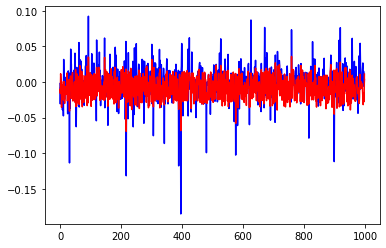

In [18]:
plt.plot(test['Ret_PlusTwo'].values[1:1000],c='b')
plt.plot(predicted[1:1000],c='r')
plt.show()

In [76]:
metrics.mean_absolute_error(test['Ret_PlusTwo'].values[1:1000],predicted['Ret_PlusTwo'][1:1000])

0.013738731513358573

In [46]:
len (test['Ret_PlusTwo'].values[1:1000]*predicted['Weight_Daily'].values[1:1000]]])

999

In [26]:
import sklearn.metrics as metrics
from tabulate import tabulate

def reg_metrics(y_true,y_pred):
    explvar = metrics.explained_variance_score(y_true, y_pred)
    maxerr  = metrics.max_error(y_true, y_pred)
    abs_err = metrics.mean_absolute_error(y_true, y_pred)
    mse     = metrics.mean_squared_error(y_true, y_pred)
    msle    = metrics.mean_squared_log_error(y_true, y_pred)
    mae     = metrics.median_absolute_error(y_true, y_pred)
    r2      = metrics.r2_score(y_true, y_pred)
    print (tabulate([["Explained Variance Score",explvar], ["Maxerror",maxerr] , ["Mean Absolute Error",abs_err],["Mean Squared Error",mse], ["Mean Squared Log error",msle] , ["Median Absolute Error",mae] , ["R2" ,r2]], headers=['Metric','score']))

In [278]:
predicted.to_csv(path_or_buf="./predicteddf.csv",index=False)

In [50]:
for Number in range(1,62+1): # From 1 to 62

    if Number == 61:
        name_of_column = 'Ret_PlusOne'
        name_of_weight = 'Weight_Daily'
    elif Number == 62:
        name_of_column = 'Ret_PlusTwo'
        name_of_weight = 'Weight_Daily'
    else:
        name_of_column = 'Ret_'+str(Number+120)
        name_of_weight = 'Weight_Intraday'


    train_targets = training_csv[name_of_column].values
    train_weights = training_csv[name_of_weight].values
    training_data = training_csv.drop(training_csv.columns[range(138, 202)], axis=1)
    training_data = training_data.values
    testing_data = testing_csv.values

    data_train = xgb.DMatrix(training_data, label=train_targets, missing=np.NaN, weight=train_weights)
    data_test = xgb.DMatrix(testing_data, missing=np.NaN)

    model_parameters = {'max_depth': 10, 'eta': 0.1, 'silent': 1, 'gamma': 0, 'lambda': 500, 'alpha': 400}
    number_of_rounds = 500

    watchlist = [(data_train, 'train')]
    bst = xgb.train(model_parameters, data_train, number_of_rounds, watchlist, early_stopping_rounds=10)
    print(Number)
    predictions = bst.predict(data_test)
    for ID, P in enumerate(predictions):
        major_list.append({'Id': str(ID+1)+'_'+str(Number), 'Predicted': P})

[0]	train-rmse:0.450027
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405025
[2]	train-rmse:0.364522
[3]	train-rmse:0.32807
[4]	train-rmse:0.295264
[5]	train-rmse:0.265738
[6]	train-rmse:0.239164
[7]	train-rmse:0.215248
[8]	train-rmse:0.193724
[9]	train-rmse:0.174352
[10]	train-rmse:0.156917
[11]	train-rmse:0.141226
[12]	train-rmse:0.127104
[13]	train-rmse:0.114395
[14]	train-rmse:0.102956
[15]	train-rmse:0.092661
[16]	train-rmse:0.083396
[17]	train-rmse:0.075057
[18]	train-rmse:0.067553
[19]	train-rmse:0.060799
[20]	train-rmse:0.05472
[21]	train-rmse:0.049249
[22]	train-rmse:0.044326
[23]	train-rmse:0.039895
[24]	train-rmse:0.035907
[25]	train-rmse:0.032319
[26]	train-rmse:0.029089
[27]	train-rmse:0.026182
[28]	train-rmse:0.023566
[29]	train-rmse:0.021213
[30]	train-rmse:0.019094
[31]	train-rmse:0.017188
[32]	train-rmse:0.015473
[33]	train-rmse:0.013929
[34]	train-rmse:0.01254
[35]	train-rmse:0.011291
[36]	train-rmse:0.010167
[37]	train-rmse:0.009155
[38]	

[322]	train-rmse:5e-05
[323]	train-rmse:4.9e-05
[324]	train-rmse:4.9e-05
[325]	train-rmse:4.9e-05
[326]	train-rmse:4.8e-05
[327]	train-rmse:4.7e-05
[328]	train-rmse:4.7e-05
[329]	train-rmse:4.6e-05
[330]	train-rmse:4.6e-05
[331]	train-rmse:4.5e-05
[332]	train-rmse:4.5e-05
[333]	train-rmse:4.5e-05
[334]	train-rmse:4.5e-05
[335]	train-rmse:4.4e-05
[336]	train-rmse:4.4e-05
[337]	train-rmse:4.3e-05
[338]	train-rmse:4.3e-05
[339]	train-rmse:4.3e-05
[340]	train-rmse:4.2e-05
[341]	train-rmse:4.2e-05
[342]	train-rmse:4.2e-05
[343]	train-rmse:4.1e-05
[344]	train-rmse:4.1e-05
[345]	train-rmse:4e-05
[346]	train-rmse:4e-05
[347]	train-rmse:4e-05
[348]	train-rmse:3.9e-05
[349]	train-rmse:3.9e-05
[350]	train-rmse:3.9e-05
[351]	train-rmse:3.8e-05
[352]	train-rmse:3.8e-05
[353]	train-rmse:3.8e-05
[354]	train-rmse:3.8e-05
[355]	train-rmse:3.7e-05
[356]	train-rmse:3.7e-05
[357]	train-rmse:3.7e-05
[358]	train-rmse:3.7e-05
[359]	train-rmse:3.6e-05
[360]	train-rmse:3.6e-05
[361]	train-rmse:3.6e-05
[362]	tr

[156]	train-rmse:0.000201
[157]	train-rmse:0.000201
[158]	train-rmse:0.000199
[159]	train-rmse:0.000197
[160]	train-rmse:0.000196
[161]	train-rmse:0.000193
[162]	train-rmse:0.000192
[163]	train-rmse:0.00019
[164]	train-rmse:0.000188
[165]	train-rmse:0.000187
[166]	train-rmse:0.000185
[167]	train-rmse:0.000184
[168]	train-rmse:0.000182
[169]	train-rmse:0.00018
[170]	train-rmse:0.000179
[171]	train-rmse:0.000178
[172]	train-rmse:0.000177
[173]	train-rmse:0.000175
[174]	train-rmse:0.000174
[175]	train-rmse:0.000172
[176]	train-rmse:0.000171
[177]	train-rmse:0.00017
[178]	train-rmse:0.000169
[179]	train-rmse:0.000168
[180]	train-rmse:0.000166
[181]	train-rmse:0.000165
[182]	train-rmse:0.000163
[183]	train-rmse:0.000161
[184]	train-rmse:0.00016
[185]	train-rmse:0.000159
[186]	train-rmse:0.000158
[187]	train-rmse:0.000156
[188]	train-rmse:0.000156
[189]	train-rmse:0.000155
[190]	train-rmse:0.000154
[191]	train-rmse:0.000153
[192]	train-rmse:0.000152
[193]	train-rmse:0.00015
[194]	train-rmse:

[483]	train-rmse:1.5e-05
[484]	train-rmse:1.5e-05
[485]	train-rmse:1.5e-05
[486]	train-rmse:1.5e-05
[487]	train-rmse:1.5e-05
[488]	train-rmse:1.5e-05
[489]	train-rmse:1.5e-05
[490]	train-rmse:1.5e-05
Stopping. Best iteration:
[480]	train-rmse:1.5e-05

2
[0]	train-rmse:0.450009
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405008
[2]	train-rmse:0.364508
[3]	train-rmse:0.328057
[4]	train-rmse:0.295252
[5]	train-rmse:0.265727
[6]	train-rmse:0.239155
[7]	train-rmse:0.21524
[8]	train-rmse:0.193716
[9]	train-rmse:0.174345
[10]	train-rmse:0.156911
[11]	train-rmse:0.141221
[12]	train-rmse:0.127099
[13]	train-rmse:0.11439
[14]	train-rmse:0.102952
[15]	train-rmse:0.092658
[16]	train-rmse:0.083393
[17]	train-rmse:0.075055
[18]	train-rmse:0.06755
[19]	train-rmse:0.060797
[20]	train-rmse:0.054718
[21]	train-rmse:0.049248
[22]	train-rmse:0.044325
[23]	train-rmse:0.039894
[24]	train-rmse:0.035907
[25]	train-rmse:0.032318
[26]	train-rmse:0.029088
[27]	train-rmse:0.026182
[

[311]	train-rmse:5.9e-05
[312]	train-rmse:5.9e-05
[313]	train-rmse:5.8e-05
[314]	train-rmse:5.8e-05
[315]	train-rmse:5.7e-05
[316]	train-rmse:5.6e-05
[317]	train-rmse:5.6e-05
[318]	train-rmse:5.6e-05
[319]	train-rmse:5.5e-05
[320]	train-rmse:5.5e-05
[321]	train-rmse:5.4e-05
[322]	train-rmse:5.3e-05
[323]	train-rmse:5.3e-05
[324]	train-rmse:5.2e-05
[325]	train-rmse:5.2e-05
[326]	train-rmse:5.2e-05
[327]	train-rmse:5.1e-05
[328]	train-rmse:5.1e-05
[329]	train-rmse:5e-05
[330]	train-rmse:5e-05
[331]	train-rmse:5e-05
[332]	train-rmse:4.9e-05
[333]	train-rmse:4.9e-05
[334]	train-rmse:4.8e-05
[335]	train-rmse:4.8e-05
[336]	train-rmse:4.7e-05
[337]	train-rmse:4.7e-05
[338]	train-rmse:4.6e-05
[339]	train-rmse:4.6e-05
[340]	train-rmse:4.5e-05
[341]	train-rmse:4.5e-05
[342]	train-rmse:4.5e-05
[343]	train-rmse:4.4e-05
[344]	train-rmse:4.4e-05
[345]	train-rmse:4.4e-05
[346]	train-rmse:4.3e-05
[347]	train-rmse:4.3e-05
[348]	train-rmse:4.3e-05
[349]	train-rmse:4.2e-05
[350]	train-rmse:4.2e-05
[351]	

[138]	train-rmse:0.000256
[139]	train-rmse:0.000254
[140]	train-rmse:0.000252
[141]	train-rmse:0.000249
[142]	train-rmse:0.000245
[143]	train-rmse:0.000244
[144]	train-rmse:0.000242
[145]	train-rmse:0.000239
[146]	train-rmse:0.000238
[147]	train-rmse:0.000237
[148]	train-rmse:0.000236
[149]	train-rmse:0.000234
[150]	train-rmse:0.000231
[151]	train-rmse:0.000228
[152]	train-rmse:0.000227
[153]	train-rmse:0.000225
[154]	train-rmse:0.000223
[155]	train-rmse:0.00022
[156]	train-rmse:0.000219
[157]	train-rmse:0.000216
[158]	train-rmse:0.000216
[159]	train-rmse:0.000215
[160]	train-rmse:0.000213
[161]	train-rmse:0.000212
[162]	train-rmse:0.000211
[163]	train-rmse:0.000209
[164]	train-rmse:0.000208
[165]	train-rmse:0.000205
[166]	train-rmse:0.000205
[167]	train-rmse:0.000202
[168]	train-rmse:0.000201
[169]	train-rmse:0.0002
[170]	train-rmse:0.000198
[171]	train-rmse:0.000197
[172]	train-rmse:0.000196
[173]	train-rmse:0.000195
[174]	train-rmse:0.000192
[175]	train-rmse:0.000191
[176]	train-rms

[464]	train-rmse:1.8e-05
[465]	train-rmse:1.8e-05
[466]	train-rmse:1.8e-05
[467]	train-rmse:1.8e-05
[468]	train-rmse:1.8e-05
[469]	train-rmse:1.8e-05
[470]	train-rmse:1.8e-05
[471]	train-rmse:1.7e-05
[472]	train-rmse:1.7e-05
[473]	train-rmse:1.7e-05
[474]	train-rmse:1.7e-05
[475]	train-rmse:1.7e-05
[476]	train-rmse:1.7e-05
[477]	train-rmse:1.7e-05
[478]	train-rmse:1.7e-05
[479]	train-rmse:1.7e-05
[480]	train-rmse:1.6e-05
[481]	train-rmse:1.6e-05
[482]	train-rmse:1.6e-05
[483]	train-rmse:1.6e-05
[484]	train-rmse:1.6e-05
[485]	train-rmse:1.6e-05
[486]	train-rmse:1.6e-05
[487]	train-rmse:1.6e-05
[488]	train-rmse:1.6e-05
[489]	train-rmse:1.5e-05
[490]	train-rmse:1.5e-05
[491]	train-rmse:1.5e-05
[492]	train-rmse:1.5e-05
[493]	train-rmse:1.5e-05
[494]	train-rmse:1.5e-05
[495]	train-rmse:1.5e-05
[496]	train-rmse:1.5e-05
[497]	train-rmse:1.5e-05
[498]	train-rmse:1.5e-05
[499]	train-rmse:1.5e-05
Stopping. Best iteration:
[489]	train-rmse:1.5e-05

4
[0]	train-rmse:0.450009
Will train until train

[283]	train-rmse:7.9e-05
[284]	train-rmse:7.8e-05
[285]	train-rmse:7.7e-05
[286]	train-rmse:7.6e-05
[287]	train-rmse:7.6e-05
[288]	train-rmse:7.5e-05
[289]	train-rmse:7.5e-05
[290]	train-rmse:7.4e-05
[291]	train-rmse:7.3e-05
[292]	train-rmse:7.3e-05
[293]	train-rmse:7.3e-05
[294]	train-rmse:7.2e-05
[295]	train-rmse:7.1e-05
[296]	train-rmse:7e-05
[297]	train-rmse:6.9e-05
[298]	train-rmse:6.9e-05
[299]	train-rmse:6.8e-05
[300]	train-rmse:6.8e-05
[301]	train-rmse:6.7e-05
[302]	train-rmse:6.7e-05
[303]	train-rmse:6.6e-05
[304]	train-rmse:6.6e-05
[305]	train-rmse:6.5e-05
[306]	train-rmse:6.5e-05
[307]	train-rmse:6.4e-05
[308]	train-rmse:6.4e-05
[309]	train-rmse:6.3e-05
[310]	train-rmse:6.2e-05
[311]	train-rmse:6.2e-05
[312]	train-rmse:6.1e-05
[313]	train-rmse:6.1e-05
[314]	train-rmse:6e-05
[315]	train-rmse:6e-05
[316]	train-rmse:5.9e-05
[317]	train-rmse:5.9e-05
[318]	train-rmse:5.8e-05
[319]	train-rmse:5.8e-05
[320]	train-rmse:5.7e-05
[321]	train-rmse:5.7e-05
[322]	train-rmse:5.6e-05
[323]	

[111]	train-rmse:0.000352
[112]	train-rmse:0.000349
[113]	train-rmse:0.000346
[114]	train-rmse:0.000343
[115]	train-rmse:0.000338
[116]	train-rmse:0.000333
[117]	train-rmse:0.000329
[118]	train-rmse:0.000325
[119]	train-rmse:0.000323
[120]	train-rmse:0.000319
[121]	train-rmse:0.000316
[122]	train-rmse:0.000313
[123]	train-rmse:0.000311
[124]	train-rmse:0.000308
[125]	train-rmse:0.000304
[126]	train-rmse:0.000302
[127]	train-rmse:0.000298
[128]	train-rmse:0.000296
[129]	train-rmse:0.000293
[130]	train-rmse:0.000291
[131]	train-rmse:0.000288
[132]	train-rmse:0.000285
[133]	train-rmse:0.000283
[134]	train-rmse:0.000281
[135]	train-rmse:0.00028
[136]	train-rmse:0.000277
[137]	train-rmse:0.000274
[138]	train-rmse:0.000273
[139]	train-rmse:0.000269
[140]	train-rmse:0.000269
[141]	train-rmse:0.000268
[142]	train-rmse:0.000266
[143]	train-rmse:0.000262
[144]	train-rmse:0.000261
[145]	train-rmse:0.00026
[146]	train-rmse:0.000258
[147]	train-rmse:0.000256
[148]	train-rmse:0.000253
[149]	train-rm

[435]	train-rmse:2.4e-05
[436]	train-rmse:2.4e-05
[437]	train-rmse:2.4e-05
[438]	train-rmse:2.4e-05
[439]	train-rmse:2.3e-05
[440]	train-rmse:2.3e-05
[441]	train-rmse:2.3e-05
[442]	train-rmse:2.3e-05
[443]	train-rmse:2.3e-05
[444]	train-rmse:2.3e-05
[445]	train-rmse:2.2e-05
[446]	train-rmse:2.2e-05
[447]	train-rmse:2.2e-05
[448]	train-rmse:2.2e-05
[449]	train-rmse:2.2e-05
[450]	train-rmse:2.2e-05
[451]	train-rmse:2.2e-05
[452]	train-rmse:2.1e-05
[453]	train-rmse:2.1e-05
[454]	train-rmse:2.1e-05
[455]	train-rmse:2.1e-05
[456]	train-rmse:2.1e-05
[457]	train-rmse:2.1e-05
[458]	train-rmse:2e-05
[459]	train-rmse:2e-05
[460]	train-rmse:2e-05
[461]	train-rmse:2e-05
[462]	train-rmse:2e-05
[463]	train-rmse:2e-05
[464]	train-rmse:2e-05
[465]	train-rmse:2e-05
[466]	train-rmse:2e-05
[467]	train-rmse:1.9e-05
[468]	train-rmse:1.9e-05
[469]	train-rmse:1.9e-05
[470]	train-rmse:1.9e-05
[471]	train-rmse:1.9e-05
[472]	train-rmse:1.9e-05
[473]	train-rmse:1.9e-05
[474]	train-rmse:1.9e-05
[475]	train-rmse:1

[257]	train-rmse:9.9e-05
[258]	train-rmse:9.8e-05
[259]	train-rmse:9.6e-05
[260]	train-rmse:9.5e-05
[261]	train-rmse:9.5e-05
[262]	train-rmse:9.4e-05
[263]	train-rmse:9.3e-05
[264]	train-rmse:9.2e-05
[265]	train-rmse:9.1e-05
[266]	train-rmse:9e-05
[267]	train-rmse:9e-05
[268]	train-rmse:8.8e-05
[269]	train-rmse:8.8e-05
[270]	train-rmse:8.7e-05
[271]	train-rmse:8.6e-05
[272]	train-rmse:8.6e-05
[273]	train-rmse:8.4e-05
[274]	train-rmse:8.4e-05
[275]	train-rmse:8.3e-05
[276]	train-rmse:8.2e-05
[277]	train-rmse:8.1e-05
[278]	train-rmse:8.1e-05
[279]	train-rmse:8e-05
[280]	train-rmse:7.9e-05
[281]	train-rmse:7.9e-05
[282]	train-rmse:7.8e-05
[283]	train-rmse:7.7e-05
[284]	train-rmse:7.7e-05
[285]	train-rmse:7.7e-05
[286]	train-rmse:7.6e-05
[287]	train-rmse:7.5e-05
[288]	train-rmse:7.5e-05
[289]	train-rmse:7.5e-05
[290]	train-rmse:7.4e-05
[291]	train-rmse:7.3e-05
[292]	train-rmse:7.3e-05
[293]	train-rmse:7.2e-05
[294]	train-rmse:7.2e-05
[295]	train-rmse:7.1e-05
[296]	train-rmse:7.1e-05
[297]	

[86]	train-rmse:0.000426
[87]	train-rmse:0.00042
[88]	train-rmse:0.000415
[89]	train-rmse:0.000409
[90]	train-rmse:0.000406
[91]	train-rmse:0.000402
[92]	train-rmse:0.000397
[93]	train-rmse:0.000392
[94]	train-rmse:0.000389
[95]	train-rmse:0.000383
[96]	train-rmse:0.000378
[97]	train-rmse:0.000375
[98]	train-rmse:0.000372
[99]	train-rmse:0.000367
[100]	train-rmse:0.000363
[101]	train-rmse:0.000361
[102]	train-rmse:0.000356
[103]	train-rmse:0.000353
[104]	train-rmse:0.00035
[105]	train-rmse:0.000348
[106]	train-rmse:0.000345
[107]	train-rmse:0.000343
[108]	train-rmse:0.000341
[109]	train-rmse:0.000337
[110]	train-rmse:0.000333
[111]	train-rmse:0.000329
[112]	train-rmse:0.000326
[113]	train-rmse:0.000322
[114]	train-rmse:0.00032
[115]	train-rmse:0.000318
[116]	train-rmse:0.000316
[117]	train-rmse:0.000313
[118]	train-rmse:0.000312
[119]	train-rmse:0.000308
[120]	train-rmse:0.000305
[121]	train-rmse:0.000302
[122]	train-rmse:0.000297
[123]	train-rmse:0.000295
[124]	train-rmse:0.000293
[12

[411]	train-rmse:2.3e-05
[412]	train-rmse:2.3e-05
[413]	train-rmse:2.2e-05
[414]	train-rmse:2.2e-05
[415]	train-rmse:2.2e-05
[416]	train-rmse:2.2e-05
[417]	train-rmse:2.2e-05
[418]	train-rmse:2.2e-05
[419]	train-rmse:2.2e-05
[420]	train-rmse:2.1e-05
[421]	train-rmse:2.1e-05
[422]	train-rmse:2.1e-05
[423]	train-rmse:2.1e-05
[424]	train-rmse:2.1e-05
[425]	train-rmse:2.1e-05
[426]	train-rmse:2.1e-05
[427]	train-rmse:2.1e-05
[428]	train-rmse:2e-05
[429]	train-rmse:2e-05
[430]	train-rmse:2e-05
[431]	train-rmse:2e-05
[432]	train-rmse:2e-05
[433]	train-rmse:2e-05
[434]	train-rmse:2e-05
[435]	train-rmse:2e-05
[436]	train-rmse:2e-05
[437]	train-rmse:1.9e-05
[438]	train-rmse:1.9e-05
[439]	train-rmse:1.9e-05
[440]	train-rmse:1.9e-05
[441]	train-rmse:1.9e-05
[442]	train-rmse:1.9e-05
[443]	train-rmse:1.9e-05
[444]	train-rmse:1.9e-05
[445]	train-rmse:1.9e-05
[446]	train-rmse:1.8e-05
[447]	train-rmse:1.8e-05
[448]	train-rmse:1.8e-05
[449]	train-rmse:1.8e-05
[450]	train-rmse:1.8e-05
[451]	train-rmse:1

[266]	train-rmse:8.2e-05
[267]	train-rmse:8.2e-05
[268]	train-rmse:8.1e-05
[269]	train-rmse:8.1e-05
[270]	train-rmse:8e-05
[271]	train-rmse:7.9e-05
[272]	train-rmse:7.8e-05
[273]	train-rmse:7.7e-05
[274]	train-rmse:7.7e-05
[275]	train-rmse:7.6e-05
[276]	train-rmse:7.6e-05
[277]	train-rmse:7.5e-05
[278]	train-rmse:7.5e-05
[279]	train-rmse:7.4e-05
[280]	train-rmse:7.3e-05
[281]	train-rmse:7.2e-05
[282]	train-rmse:7.2e-05
[283]	train-rmse:7.1e-05
[284]	train-rmse:7.1e-05
[285]	train-rmse:7.1e-05
[286]	train-rmse:7e-05
[287]	train-rmse:7e-05
[288]	train-rmse:6.9e-05
[289]	train-rmse:6.8e-05
[290]	train-rmse:6.7e-05
[291]	train-rmse:6.7e-05
[292]	train-rmse:6.6e-05
[293]	train-rmse:6.6e-05
[294]	train-rmse:6.5e-05
[295]	train-rmse:6.5e-05
[296]	train-rmse:6.4e-05
[297]	train-rmse:6.4e-05
[298]	train-rmse:6.3e-05
[299]	train-rmse:6.2e-05
[300]	train-rmse:6.2e-05
[301]	train-rmse:6.2e-05
[302]	train-rmse:6.1e-05
[303]	train-rmse:6e-05
[304]	train-rmse:6e-05
[305]	train-rmse:5.9e-05
[306]	trai

[118]	train-rmse:0.000309
[119]	train-rmse:0.000305
[120]	train-rmse:0.0003
[121]	train-rmse:0.0003
[122]	train-rmse:0.000298
[123]	train-rmse:0.000297
[124]	train-rmse:0.000295
[125]	train-rmse:0.000294
[126]	train-rmse:0.000293
[127]	train-rmse:0.000292
[128]	train-rmse:0.000288
[129]	train-rmse:0.000284
[130]	train-rmse:0.000281
[131]	train-rmse:0.000279
[132]	train-rmse:0.000275
[133]	train-rmse:0.000272
[134]	train-rmse:0.000269
[135]	train-rmse:0.000266
[136]	train-rmse:0.000263
[137]	train-rmse:0.00026
[138]	train-rmse:0.000259
[139]	train-rmse:0.000257
[140]	train-rmse:0.000255
[141]	train-rmse:0.000253
[142]	train-rmse:0.000252
[143]	train-rmse:0.00025
[144]	train-rmse:0.000248
[145]	train-rmse:0.000246
[146]	train-rmse:0.000244
[147]	train-rmse:0.000242
[148]	train-rmse:0.000241
[149]	train-rmse:0.00024
[150]	train-rmse:0.000238
[151]	train-rmse:0.000235
[152]	train-rmse:0.000233
[153]	train-rmse:0.000231
[154]	train-rmse:0.000231
[155]	train-rmse:0.000227
[156]	train-rmse:0.

[442]	train-rmse:2.3e-05
[443]	train-rmse:2.3e-05
[444]	train-rmse:2.2e-05
[445]	train-rmse:2.2e-05
[446]	train-rmse:2.2e-05
[447]	train-rmse:2.2e-05
[448]	train-rmse:2.2e-05
[449]	train-rmse:2.2e-05
[450]	train-rmse:2.1e-05
[451]	train-rmse:2.1e-05
[452]	train-rmse:2.1e-05
[453]	train-rmse:2.1e-05
[454]	train-rmse:2.1e-05
[455]	train-rmse:2e-05
[456]	train-rmse:2e-05
[457]	train-rmse:2e-05
[458]	train-rmse:2e-05
[459]	train-rmse:2e-05
[460]	train-rmse:2e-05
[461]	train-rmse:2e-05
[462]	train-rmse:1.9e-05
[463]	train-rmse:1.9e-05
[464]	train-rmse:1.9e-05
[465]	train-rmse:1.9e-05
[466]	train-rmse:1.9e-05
[467]	train-rmse:1.9e-05
[468]	train-rmse:1.9e-05
[469]	train-rmse:1.8e-05
[470]	train-rmse:1.8e-05
[471]	train-rmse:1.8e-05
[472]	train-rmse:1.8e-05
[473]	train-rmse:1.8e-05
[474]	train-rmse:1.8e-05
[475]	train-rmse:1.8e-05
[476]	train-rmse:1.8e-05
[477]	train-rmse:1.7e-05
[478]	train-rmse:1.7e-05
[479]	train-rmse:1.7e-05
[480]	train-rmse:1.7e-05
[481]	train-rmse:1.7e-05
[482]	train-rm

[264]	train-rmse:8.6e-05
[265]	train-rmse:8.5e-05
[266]	train-rmse:8.5e-05
[267]	train-rmse:8.4e-05
[268]	train-rmse:8.3e-05
[269]	train-rmse:8.2e-05
[270]	train-rmse:8.2e-05
[271]	train-rmse:8.1e-05
[272]	train-rmse:8e-05
[273]	train-rmse:8e-05
[274]	train-rmse:8e-05
[275]	train-rmse:7.9e-05
[276]	train-rmse:7.9e-05
[277]	train-rmse:7.8e-05
[278]	train-rmse:7.8e-05
[279]	train-rmse:7.7e-05
[280]	train-rmse:7.6e-05
[281]	train-rmse:7.5e-05
[282]	train-rmse:7.5e-05
[283]	train-rmse:7.4e-05
[284]	train-rmse:7.4e-05
[285]	train-rmse:7.3e-05
[286]	train-rmse:7.2e-05
[287]	train-rmse:7.2e-05
[288]	train-rmse:7.1e-05
[289]	train-rmse:7e-05
[290]	train-rmse:6.9e-05
[291]	train-rmse:6.9e-05
[292]	train-rmse:6.8e-05
[293]	train-rmse:6.7e-05
[294]	train-rmse:6.7e-05
[295]	train-rmse:6.6e-05
[296]	train-rmse:6.6e-05
[297]	train-rmse:6.5e-05
[298]	train-rmse:6.4e-05
[299]	train-rmse:6.4e-05
[300]	train-rmse:6.3e-05
[301]	train-rmse:6.3e-05
[302]	train-rmse:6.3e-05
[303]	train-rmse:6.2e-05
[304]	tr

[92]	train-rmse:0.000385
[93]	train-rmse:0.000381
[94]	train-rmse:0.000376
[95]	train-rmse:0.000373
[96]	train-rmse:0.000369
[97]	train-rmse:0.000364
[98]	train-rmse:0.000361
[99]	train-rmse:0.00036
[100]	train-rmse:0.000358
[101]	train-rmse:0.000353
[102]	train-rmse:0.000348
[103]	train-rmse:0.000346
[104]	train-rmse:0.000342
[105]	train-rmse:0.000338
[106]	train-rmse:0.000335
[107]	train-rmse:0.000332
[108]	train-rmse:0.000329
[109]	train-rmse:0.000325
[110]	train-rmse:0.000321
[111]	train-rmse:0.000317
[112]	train-rmse:0.000315
[113]	train-rmse:0.000312
[114]	train-rmse:0.00031
[115]	train-rmse:0.000307
[116]	train-rmse:0.000304
[117]	train-rmse:0.000302
[118]	train-rmse:0.000301
[119]	train-rmse:0.000299
[120]	train-rmse:0.000296
[121]	train-rmse:0.000292
[122]	train-rmse:0.000289
[123]	train-rmse:0.000288
[124]	train-rmse:0.000285
[125]	train-rmse:0.000283
[126]	train-rmse:0.000281
[127]	train-rmse:0.000279
[128]	train-rmse:0.000276
[129]	train-rmse:0.000275
[130]	train-rmse:0.000

[416]	train-rmse:2.6e-05
[417]	train-rmse:2.6e-05
[418]	train-rmse:2.5e-05
[419]	train-rmse:2.5e-05
[420]	train-rmse:2.5e-05
[421]	train-rmse:2.5e-05
[422]	train-rmse:2.4e-05
[423]	train-rmse:2.4e-05
[424]	train-rmse:2.4e-05
[425]	train-rmse:2.4e-05
[426]	train-rmse:2.4e-05
[427]	train-rmse:2.3e-05
[428]	train-rmse:2.3e-05
[429]	train-rmse:2.3e-05
[430]	train-rmse:2.3e-05
[431]	train-rmse:2.3e-05
[432]	train-rmse:2.3e-05
[433]	train-rmse:2.2e-05
[434]	train-rmse:2.2e-05
[435]	train-rmse:2.2e-05
[436]	train-rmse:2.2e-05
[437]	train-rmse:2.2e-05
[438]	train-rmse:2.2e-05
[439]	train-rmse:2.1e-05
[440]	train-rmse:2.1e-05
[441]	train-rmse:2.1e-05
[442]	train-rmse:2.1e-05
[443]	train-rmse:2.1e-05
[444]	train-rmse:2.1e-05
[445]	train-rmse:2e-05
[446]	train-rmse:2e-05
[447]	train-rmse:2e-05
[448]	train-rmse:2e-05
[449]	train-rmse:2e-05
[450]	train-rmse:2e-05
[451]	train-rmse:2e-05
[452]	train-rmse:1.9e-05
[453]	train-rmse:1.9e-05
[454]	train-rmse:1.9e-05
[455]	train-rmse:1.9e-05
[456]	train-rm

[236]	train-rmse:0.000102
[237]	train-rmse:0.000101
[238]	train-rmse:9.9e-05
[239]	train-rmse:9.9e-05
[240]	train-rmse:9.8e-05
[241]	train-rmse:9.7e-05
[242]	train-rmse:9.6e-05
[243]	train-rmse:9.5e-05
[244]	train-rmse:9.4e-05
[245]	train-rmse:9.3e-05
[246]	train-rmse:9.2e-05
[247]	train-rmse:9.1e-05
[248]	train-rmse:9.1e-05
[249]	train-rmse:9e-05
[250]	train-rmse:9e-05
[251]	train-rmse:8.9e-05
[252]	train-rmse:8.8e-05
[253]	train-rmse:8.7e-05
[254]	train-rmse:8.6e-05
[255]	train-rmse:8.5e-05
[256]	train-rmse:8.4e-05
[257]	train-rmse:8.3e-05
[258]	train-rmse:8.2e-05
[259]	train-rmse:8.2e-05
[260]	train-rmse:8.1e-05
[261]	train-rmse:8e-05
[262]	train-rmse:8e-05
[263]	train-rmse:7.9e-05
[264]	train-rmse:7.8e-05
[265]	train-rmse:7.7e-05
[266]	train-rmse:7.7e-05
[267]	train-rmse:7.6e-05
[268]	train-rmse:7.5e-05
[269]	train-rmse:7.5e-05
[270]	train-rmse:7.4e-05
[271]	train-rmse:7.3e-05
[272]	train-rmse:7.3e-05
[273]	train-rmse:7.2e-05
[274]	train-rmse:7.1e-05
[275]	train-rmse:7e-05
[276]	tr

[82]	train-rmse:0.000449
[83]	train-rmse:0.000444
[84]	train-rmse:0.000436
[85]	train-rmse:0.000434
[86]	train-rmse:0.000429
[87]	train-rmse:0.000426
[88]	train-rmse:0.000423
[89]	train-rmse:0.000417
[90]	train-rmse:0.000412
[91]	train-rmse:0.00041
[92]	train-rmse:0.000405
[93]	train-rmse:0.0004
[94]	train-rmse:0.000399
[95]	train-rmse:0.000395
[96]	train-rmse:0.000391
[97]	train-rmse:0.000387
[98]	train-rmse:0.000383
[99]	train-rmse:0.000377
[100]	train-rmse:0.000376
[101]	train-rmse:0.000373
[102]	train-rmse:0.000367
[103]	train-rmse:0.000362
[104]	train-rmse:0.00036
[105]	train-rmse:0.000359
[106]	train-rmse:0.000357
[107]	train-rmse:0.000353
[108]	train-rmse:0.000349
[109]	train-rmse:0.000348
[110]	train-rmse:0.000346
[111]	train-rmse:0.000343
[112]	train-rmse:0.000339
[113]	train-rmse:0.000335
[114]	train-rmse:0.000334
[115]	train-rmse:0.00033
[116]	train-rmse:0.000328
[117]	train-rmse:0.000325
[118]	train-rmse:0.000321
[119]	train-rmse:0.00032
[120]	train-rmse:0.000316
[121]	trai

[406]	train-rmse:2.7e-05
[407]	train-rmse:2.7e-05
[408]	train-rmse:2.7e-05
[409]	train-rmse:2.7e-05
[410]	train-rmse:2.6e-05
[411]	train-rmse:2.6e-05
[412]	train-rmse:2.6e-05
[413]	train-rmse:2.6e-05
[414]	train-rmse:2.6e-05
[415]	train-rmse:2.5e-05
[416]	train-rmse:2.5e-05
[417]	train-rmse:2.5e-05
[418]	train-rmse:2.5e-05
[419]	train-rmse:2.4e-05
[420]	train-rmse:2.4e-05
[421]	train-rmse:2.4e-05
[422]	train-rmse:2.4e-05
[423]	train-rmse:2.4e-05
[424]	train-rmse:2.4e-05
[425]	train-rmse:2.4e-05
[426]	train-rmse:2.3e-05
[427]	train-rmse:2.3e-05
[428]	train-rmse:2.3e-05
[429]	train-rmse:2.3e-05
[430]	train-rmse:2.3e-05
[431]	train-rmse:2.3e-05
[432]	train-rmse:2.2e-05
[433]	train-rmse:2.2e-05
[434]	train-rmse:2.2e-05
[435]	train-rmse:2.2e-05
[436]	train-rmse:2.2e-05
[437]	train-rmse:2.2e-05
[438]	train-rmse:2.2e-05
[439]	train-rmse:2.1e-05
[440]	train-rmse:2.1e-05
[441]	train-rmse:2.1e-05
[442]	train-rmse:2.1e-05
[443]	train-rmse:2.1e-05
[444]	train-rmse:2.1e-05
[445]	train-rmse:2.1e-05


[228]	train-rmse:0.000133
[229]	train-rmse:0.000131
[230]	train-rmse:0.00013
[231]	train-rmse:0.000129
[232]	train-rmse:0.000127
[233]	train-rmse:0.000126
[234]	train-rmse:0.000125
[235]	train-rmse:0.000124
[236]	train-rmse:0.000122
[237]	train-rmse:0.000122
[238]	train-rmse:0.00012
[239]	train-rmse:0.000119
[240]	train-rmse:0.000117
[241]	train-rmse:0.000116
[242]	train-rmse:0.000116
[243]	train-rmse:0.000115
[244]	train-rmse:0.000114
[245]	train-rmse:0.000113
[246]	train-rmse:0.000112
[247]	train-rmse:0.000111
[248]	train-rmse:0.00011
[249]	train-rmse:0.000109
[250]	train-rmse:0.000108
[251]	train-rmse:0.000107
[252]	train-rmse:0.000106
[253]	train-rmse:0.000106
[254]	train-rmse:0.000105
[255]	train-rmse:0.000104
[256]	train-rmse:0.000103
[257]	train-rmse:0.000102
[258]	train-rmse:0.0001
[259]	train-rmse:9.9e-05
[260]	train-rmse:9.8e-05
[261]	train-rmse:9.7e-05
[262]	train-rmse:9.6e-05
[263]	train-rmse:9.5e-05
[264]	train-rmse:9.4e-05
[265]	train-rmse:9.4e-05
[266]	train-rmse:9.2e-05

[60]	train-rmse:0.001006
[61]	train-rmse:0.000938
[62]	train-rmse:0.000876
[63]	train-rmse:0.000824
[64]	train-rmse:0.000778
[65]	train-rmse:0.000741
[66]	train-rmse:0.000707
[67]	train-rmse:0.000674
[68]	train-rmse:0.000649
[69]	train-rmse:0.000624
[70]	train-rmse:0.000605
[71]	train-rmse:0.000588
[72]	train-rmse:0.000572
[73]	train-rmse:0.000557
[74]	train-rmse:0.000547
[75]	train-rmse:0.000535
[76]	train-rmse:0.000525
[77]	train-rmse:0.000516
[78]	train-rmse:0.000508
[79]	train-rmse:0.000503
[80]	train-rmse:0.000494
[81]	train-rmse:0.000486
[82]	train-rmse:0.000478
[83]	train-rmse:0.000472
[84]	train-rmse:0.000465
[85]	train-rmse:0.00046
[86]	train-rmse:0.000453
[87]	train-rmse:0.000446
[88]	train-rmse:0.000441
[89]	train-rmse:0.000436
[90]	train-rmse:0.000434
[91]	train-rmse:0.000428
[92]	train-rmse:0.000425
[93]	train-rmse:0.000418
[94]	train-rmse:0.000413
[95]	train-rmse:0.000409
[96]	train-rmse:0.000404
[97]	train-rmse:0.000402
[98]	train-rmse:0.000396
[99]	train-rmse:0.000392
[

[384]	train-rmse:3.3e-05
[385]	train-rmse:3.2e-05
[386]	train-rmse:3.2e-05
[387]	train-rmse:3.2e-05
[388]	train-rmse:3.2e-05
[389]	train-rmse:3.1e-05
[390]	train-rmse:3.1e-05
[391]	train-rmse:3.1e-05
[392]	train-rmse:3e-05
[393]	train-rmse:3e-05
[394]	train-rmse:3e-05
[395]	train-rmse:3e-05
[396]	train-rmse:2.9e-05
[397]	train-rmse:2.9e-05
[398]	train-rmse:2.9e-05
[399]	train-rmse:2.9e-05
[400]	train-rmse:2.8e-05
[401]	train-rmse:2.8e-05
[402]	train-rmse:2.8e-05
[403]	train-rmse:2.8e-05
[404]	train-rmse:2.7e-05
[405]	train-rmse:2.7e-05
[406]	train-rmse:2.7e-05
[407]	train-rmse:2.7e-05
[408]	train-rmse:2.7e-05
[409]	train-rmse:2.6e-05
[410]	train-rmse:2.6e-05
[411]	train-rmse:2.6e-05
[412]	train-rmse:2.6e-05
[413]	train-rmse:2.6e-05
[414]	train-rmse:2.5e-05
[415]	train-rmse:2.5e-05
[416]	train-rmse:2.5e-05
[417]	train-rmse:2.5e-05
[418]	train-rmse:2.5e-05
[419]	train-rmse:2.5e-05
[420]	train-rmse:2.4e-05
[421]	train-rmse:2.4e-05
[422]	train-rmse:2.4e-05
[423]	train-rmse:2.4e-05
[424]	tr

[207]	train-rmse:0.000155
[208]	train-rmse:0.000154
[209]	train-rmse:0.000152
[210]	train-rmse:0.000151
[211]	train-rmse:0.000149
[212]	train-rmse:0.000148
[213]	train-rmse:0.000147
[214]	train-rmse:0.000146
[215]	train-rmse:0.000144
[216]	train-rmse:0.000142
[217]	train-rmse:0.000141
[218]	train-rmse:0.00014
[219]	train-rmse:0.000139
[220]	train-rmse:0.000139
[221]	train-rmse:0.000137
[222]	train-rmse:0.000137
[223]	train-rmse:0.000135
[224]	train-rmse:0.000134
[225]	train-rmse:0.000133
[226]	train-rmse:0.000131
[227]	train-rmse:0.000129
[228]	train-rmse:0.000129
[229]	train-rmse:0.000128
[230]	train-rmse:0.000127
[231]	train-rmse:0.000126
[232]	train-rmse:0.000125
[233]	train-rmse:0.000125
[234]	train-rmse:0.000124
[235]	train-rmse:0.000122
[236]	train-rmse:0.000121
[237]	train-rmse:0.00012
[238]	train-rmse:0.000119
[239]	train-rmse:0.000118
[240]	train-rmse:0.000117
[241]	train-rmse:0.000117
[242]	train-rmse:0.000115
[243]	train-rmse:0.000115
[244]	train-rmse:0.000114
[245]	train-rm

[34]	train-rmse:0.012541
[35]	train-rmse:0.011292
[36]	train-rmse:0.010168
[37]	train-rmse:0.009156
[38]	train-rmse:0.008247
[39]	train-rmse:0.007429
[40]	train-rmse:0.006693
[41]	train-rmse:0.006031
[42]	train-rmse:0.005437
[43]	train-rmse:0.004902
[44]	train-rmse:0.004421
[45]	train-rmse:0.00399
[46]	train-rmse:0.003602
[47]	train-rmse:0.003254
[48]	train-rmse:0.002941
[49]	train-rmse:0.002661
[50]	train-rmse:0.00241
[51]	train-rmse:0.002185
[52]	train-rmse:0.001984
[53]	train-rmse:0.001805
[54]	train-rmse:0.001644
[55]	train-rmse:0.001502
[56]	train-rmse:0.001374
[57]	train-rmse:0.001262
[58]	train-rmse:0.001162
[59]	train-rmse:0.001073
[60]	train-rmse:0.000995
[61]	train-rmse:0.000925
[62]	train-rmse:0.000865
[63]	train-rmse:0.000812
[64]	train-rmse:0.000765
[65]	train-rmse:0.000725
[66]	train-rmse:0.000688
[67]	train-rmse:0.000656
[68]	train-rmse:0.000629
[69]	train-rmse:0.000604
[70]	train-rmse:0.000583
[71]	train-rmse:0.000565
[72]	train-rmse:0.000552
[73]	train-rmse:0.000537
[7

[358]	train-rmse:4.1e-05
[359]	train-rmse:4.1e-05
[360]	train-rmse:4.1e-05
[361]	train-rmse:4.1e-05
[362]	train-rmse:4e-05
[363]	train-rmse:4e-05
[364]	train-rmse:3.9e-05
[365]	train-rmse:3.9e-05
[366]	train-rmse:3.9e-05
[367]	train-rmse:3.9e-05
[368]	train-rmse:3.8e-05
[369]	train-rmse:3.8e-05
[370]	train-rmse:3.7e-05
[371]	train-rmse:3.7e-05
[372]	train-rmse:3.7e-05
[373]	train-rmse:3.7e-05
[374]	train-rmse:3.6e-05
[375]	train-rmse:3.6e-05
[376]	train-rmse:3.6e-05
[377]	train-rmse:3.5e-05
[378]	train-rmse:3.5e-05
[379]	train-rmse:3.5e-05
[380]	train-rmse:3.5e-05
[381]	train-rmse:3.4e-05
[382]	train-rmse:3.4e-05
[383]	train-rmse:3.4e-05
[384]	train-rmse:3.4e-05
[385]	train-rmse:3.3e-05
[386]	train-rmse:3.3e-05
[387]	train-rmse:3.3e-05
[388]	train-rmse:3.3e-05
[389]	train-rmse:3.2e-05
[390]	train-rmse:3.2e-05
[391]	train-rmse:3.2e-05
[392]	train-rmse:3.2e-05
[393]	train-rmse:3.1e-05
[394]	train-rmse:3.1e-05
[395]	train-rmse:3.1e-05
[396]	train-rmse:3.1e-05
[397]	train-rmse:3.1e-05
[398

[183]	train-rmse:0.000191
[184]	train-rmse:0.000191
[185]	train-rmse:0.000189
[186]	train-rmse:0.000187
[187]	train-rmse:0.000186
[188]	train-rmse:0.000184
[189]	train-rmse:0.000181
[190]	train-rmse:0.000179
[191]	train-rmse:0.000178
[192]	train-rmse:0.000176
[193]	train-rmse:0.000174
[194]	train-rmse:0.000172
[195]	train-rmse:0.000169
[196]	train-rmse:0.000169
[197]	train-rmse:0.000168
[198]	train-rmse:0.000167
[199]	train-rmse:0.000165
[200]	train-rmse:0.000165
[201]	train-rmse:0.000163
[202]	train-rmse:0.000162
[203]	train-rmse:0.000161
[204]	train-rmse:0.000161
[205]	train-rmse:0.000159
[206]	train-rmse:0.000156
[207]	train-rmse:0.000155
[208]	train-rmse:0.000152
[209]	train-rmse:0.000151
[210]	train-rmse:0.000151
[211]	train-rmse:0.000149
[212]	train-rmse:0.000147
[213]	train-rmse:0.000146
[214]	train-rmse:0.000145
[215]	train-rmse:0.000143
[216]	train-rmse:0.000142
[217]	train-rmse:0.000141
[218]	train-rmse:0.00014
[219]	train-rmse:0.000139
[220]	train-rmse:0.000137
[221]	train-r

[8]	train-rmse:0.193719
[9]	train-rmse:0.174348
[10]	train-rmse:0.156914
[11]	train-rmse:0.141223
[12]	train-rmse:0.127101
[13]	train-rmse:0.114392
[14]	train-rmse:0.102954
[15]	train-rmse:0.092659
[16]	train-rmse:0.083394
[17]	train-rmse:0.075056
[18]	train-rmse:0.067551
[19]	train-rmse:0.060797
[20]	train-rmse:0.054719
[21]	train-rmse:0.049249
[22]	train-rmse:0.044325
[23]	train-rmse:0.039895
[24]	train-rmse:0.035907
[25]	train-rmse:0.032319
[26]	train-rmse:0.029089
[27]	train-rmse:0.026183
[28]	train-rmse:0.023567
[29]	train-rmse:0.021213
[30]	train-rmse:0.019095
[31]	train-rmse:0.017189
[32]	train-rmse:0.015474
[33]	train-rmse:0.013931
[34]	train-rmse:0.012542
[35]	train-rmse:0.011293
[36]	train-rmse:0.010169
[37]	train-rmse:0.009157
[38]	train-rmse:0.008248
[39]	train-rmse:0.007429
[40]	train-rmse:0.006693
[41]	train-rmse:0.006032
[42]	train-rmse:0.005437
[43]	train-rmse:0.004902
[44]	train-rmse:0.004421
[45]	train-rmse:0.00399
[46]	train-rmse:0.003602
[47]	train-rmse:0.003254
[48

[331]	train-rmse:5.6e-05
[332]	train-rmse:5.6e-05
[333]	train-rmse:5.6e-05
[334]	train-rmse:5.6e-05
[335]	train-rmse:5.5e-05
[336]	train-rmse:5.5e-05
[337]	train-rmse:5.5e-05
[338]	train-rmse:5.4e-05
[339]	train-rmse:5.4e-05
[340]	train-rmse:5.4e-05
[341]	train-rmse:5.3e-05
[342]	train-rmse:5.3e-05
[343]	train-rmse:5.2e-05
[344]	train-rmse:5.2e-05
[345]	train-rmse:5.2e-05
[346]	train-rmse:5.1e-05
[347]	train-rmse:5.1e-05
[348]	train-rmse:5.1e-05
[349]	train-rmse:5e-05
[350]	train-rmse:5e-05
[351]	train-rmse:4.9e-05
[352]	train-rmse:4.9e-05
[353]	train-rmse:4.9e-05
[354]	train-rmse:4.8e-05
[355]	train-rmse:4.8e-05
[356]	train-rmse:4.7e-05
[357]	train-rmse:4.7e-05
[358]	train-rmse:4.7e-05
[359]	train-rmse:4.6e-05
[360]	train-rmse:4.6e-05
[361]	train-rmse:4.5e-05
[362]	train-rmse:4.5e-05
[363]	train-rmse:4.5e-05
[364]	train-rmse:4.4e-05
[365]	train-rmse:4.4e-05
[366]	train-rmse:4.4e-05
[367]	train-rmse:4.4e-05
[368]	train-rmse:4.3e-05
[369]	train-rmse:4.3e-05
[370]	train-rmse:4.2e-05
[371

[157]	train-rmse:0.000212
[158]	train-rmse:0.000209
[159]	train-rmse:0.000208
[160]	train-rmse:0.000205
[161]	train-rmse:0.000204
[162]	train-rmse:0.000201
[163]	train-rmse:0.000201
[164]	train-rmse:0.000198
[165]	train-rmse:0.000198
[166]	train-rmse:0.000196
[167]	train-rmse:0.000194
[168]	train-rmse:0.000193
[169]	train-rmse:0.00019
[170]	train-rmse:0.000188
[171]	train-rmse:0.000187
[172]	train-rmse:0.000184
[173]	train-rmse:0.000183
[174]	train-rmse:0.000181
[175]	train-rmse:0.000178
[176]	train-rmse:0.000176
[177]	train-rmse:0.000174
[178]	train-rmse:0.000173
[179]	train-rmse:0.00017
[180]	train-rmse:0.000168
[181]	train-rmse:0.000166
[182]	train-rmse:0.000166
[183]	train-rmse:0.000164
[184]	train-rmse:0.000163
[185]	train-rmse:0.000161
[186]	train-rmse:0.00016
[187]	train-rmse:0.000158
[188]	train-rmse:0.000156
[189]	train-rmse:0.000154
[190]	train-rmse:0.000152
[191]	train-rmse:0.000149
[192]	train-rmse:0.000148
[193]	train-rmse:0.000147
[194]	train-rmse:0.000145
[195]	train-rms

[485]	train-rmse:1.5e-05
[486]	train-rmse:1.5e-05
[487]	train-rmse:1.5e-05
[488]	train-rmse:1.5e-05
[489]	train-rmse:1.5e-05
[490]	train-rmse:1.5e-05
[491]	train-rmse:1.5e-05
Stopping. Best iteration:
[481]	train-rmse:1.5e-05

21
[0]	train-rmse:0.450016
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405014
[2]	train-rmse:0.364513
[3]	train-rmse:0.328062
[4]	train-rmse:0.295256
[5]	train-rmse:0.265731
[6]	train-rmse:0.239158
[7]	train-rmse:0.215243
[8]	train-rmse:0.193719
[9]	train-rmse:0.174348
[10]	train-rmse:0.156914
[11]	train-rmse:0.141223
[12]	train-rmse:0.127101
[13]	train-rmse:0.114392
[14]	train-rmse:0.102954
[15]	train-rmse:0.092659
[16]	train-rmse:0.083394
[17]	train-rmse:0.075056
[18]	train-rmse:0.067551
[19]	train-rmse:0.060797
[20]	train-rmse:0.054719
[21]	train-rmse:0.049249
[22]	train-rmse:0.044325
[23]	train-rmse:0.039895
[24]	train-rmse:0.035907
[25]	train-rmse:0.032319
[26]	train-rmse:0.029089
[27]	train-rmse:0.026183
[28]	train-rmse:0.0235

[313]	train-rmse:5.7e-05
[314]	train-rmse:5.7e-05
[315]	train-rmse:5.6e-05
[316]	train-rmse:5.6e-05
[317]	train-rmse:5.5e-05
[318]	train-rmse:5.5e-05
[319]	train-rmse:5.4e-05
[320]	train-rmse:5.4e-05
[321]	train-rmse:5.4e-05
[322]	train-rmse:5.3e-05
[323]	train-rmse:5.3e-05
[324]	train-rmse:5.2e-05
[325]	train-rmse:5.2e-05
[326]	train-rmse:5.1e-05
[327]	train-rmse:5.1e-05
[328]	train-rmse:5.1e-05
[329]	train-rmse:5.1e-05
[330]	train-rmse:5e-05
[331]	train-rmse:5e-05
[332]	train-rmse:4.9e-05
[333]	train-rmse:4.9e-05
[334]	train-rmse:4.9e-05
[335]	train-rmse:4.8e-05
[336]	train-rmse:4.8e-05
[337]	train-rmse:4.8e-05
[338]	train-rmse:4.7e-05
[339]	train-rmse:4.7e-05
[340]	train-rmse:4.6e-05
[341]	train-rmse:4.6e-05
[342]	train-rmse:4.5e-05
[343]	train-rmse:4.5e-05
[344]	train-rmse:4.5e-05
[345]	train-rmse:4.5e-05
[346]	train-rmse:4.4e-05
[347]	train-rmse:4.4e-05
[348]	train-rmse:4.4e-05
[349]	train-rmse:4.3e-05
[350]	train-rmse:4.3e-05
[351]	train-rmse:4.3e-05
[352]	train-rmse:4.2e-05
[353

[139]	train-rmse:0.000262
[140]	train-rmse:0.000258
[141]	train-rmse:0.000254
[142]	train-rmse:0.000252
[143]	train-rmse:0.000249
[144]	train-rmse:0.000247
[145]	train-rmse:0.000244
[146]	train-rmse:0.000242
[147]	train-rmse:0.00024
[148]	train-rmse:0.000236
[149]	train-rmse:0.000234
[150]	train-rmse:0.000231
[151]	train-rmse:0.000229
[152]	train-rmse:0.000226
[153]	train-rmse:0.000224
[154]	train-rmse:0.000222
[155]	train-rmse:0.00022
[156]	train-rmse:0.000217
[157]	train-rmse:0.000216
[158]	train-rmse:0.000214
[159]	train-rmse:0.000212
[160]	train-rmse:0.00021
[161]	train-rmse:0.000209
[162]	train-rmse:0.000208
[163]	train-rmse:0.000206
[164]	train-rmse:0.000205
[165]	train-rmse:0.000203
[166]	train-rmse:0.000201
[167]	train-rmse:0.0002
[168]	train-rmse:0.000199
[169]	train-rmse:0.000197
[170]	train-rmse:0.000195
[171]	train-rmse:0.000194
[172]	train-rmse:0.000193
[173]	train-rmse:0.000192
[174]	train-rmse:0.00019
[175]	train-rmse:0.000189
[176]	train-rmse:0.000186
[177]	train-rmse:0

[465]	train-rmse:1.8e-05
[466]	train-rmse:1.8e-05
[467]	train-rmse:1.8e-05
[468]	train-rmse:1.8e-05
[469]	train-rmse:1.8e-05
[470]	train-rmse:1.8e-05
[471]	train-rmse:1.8e-05
[472]	train-rmse:1.8e-05
[473]	train-rmse:1.7e-05
[474]	train-rmse:1.7e-05
[475]	train-rmse:1.7e-05
[476]	train-rmse:1.7e-05
[477]	train-rmse:1.7e-05
[478]	train-rmse:1.7e-05
[479]	train-rmse:1.7e-05
[480]	train-rmse:1.7e-05
[481]	train-rmse:1.6e-05
[482]	train-rmse:1.6e-05
[483]	train-rmse:1.6e-05
[484]	train-rmse:1.6e-05
[485]	train-rmse:1.6e-05
[486]	train-rmse:1.6e-05
[487]	train-rmse:1.6e-05
[488]	train-rmse:1.6e-05
[489]	train-rmse:1.6e-05
[490]	train-rmse:1.6e-05
[491]	train-rmse:1.6e-05
Stopping. Best iteration:
[481]	train-rmse:1.6e-05

23
[0]	train-rmse:0.450004
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405004
[2]	train-rmse:0.364504
[3]	train-rmse:0.328054
[4]	train-rmse:0.295249
[5]	train-rmse:0.265724
[6]	train-rmse:0.239152
[7]	train-rmse:0.215238
[8]	train-rmse:0.193

[292]	train-rmse:7.1e-05
[293]	train-rmse:7e-05
[294]	train-rmse:7e-05
[295]	train-rmse:6.9e-05
[296]	train-rmse:6.9e-05
[297]	train-rmse:6.8e-05
[298]	train-rmse:6.8e-05
[299]	train-rmse:6.7e-05
[300]	train-rmse:6.7e-05
[301]	train-rmse:6.7e-05
[302]	train-rmse:6.6e-05
[303]	train-rmse:6.5e-05
[304]	train-rmse:6.5e-05
[305]	train-rmse:6.4e-05
[306]	train-rmse:6.3e-05
[307]	train-rmse:6.3e-05
[308]	train-rmse:6.2e-05
[309]	train-rmse:6.2e-05
[310]	train-rmse:6.1e-05
[311]	train-rmse:6.1e-05
[312]	train-rmse:6e-05
[313]	train-rmse:5.9e-05
[314]	train-rmse:5.9e-05
[315]	train-rmse:5.9e-05
[316]	train-rmse:5.8e-05
[317]	train-rmse:5.7e-05
[318]	train-rmse:5.7e-05
[319]	train-rmse:5.7e-05
[320]	train-rmse:5.7e-05
[321]	train-rmse:5.6e-05
[322]	train-rmse:5.6e-05
[323]	train-rmse:5.5e-05
[324]	train-rmse:5.4e-05
[325]	train-rmse:5.4e-05
[326]	train-rmse:5.4e-05
[327]	train-rmse:5.3e-05
[328]	train-rmse:5.3e-05
[329]	train-rmse:5.2e-05
[330]	train-rmse:5.2e-05
[331]	train-rmse:5.1e-05
[332]	

[120]	train-rmse:0.00031
[121]	train-rmse:0.000306
[122]	train-rmse:0.000305
[123]	train-rmse:0.000303
[124]	train-rmse:0.000301
[125]	train-rmse:0.000298
[126]	train-rmse:0.000295
[127]	train-rmse:0.000293
[128]	train-rmse:0.000293
[129]	train-rmse:0.00029
[130]	train-rmse:0.000288
[131]	train-rmse:0.000285
[132]	train-rmse:0.000284
[133]	train-rmse:0.00028
[134]	train-rmse:0.000276
[135]	train-rmse:0.000272
[136]	train-rmse:0.000269
[137]	train-rmse:0.000266
[138]	train-rmse:0.000263
[139]	train-rmse:0.000261
[140]	train-rmse:0.000258
[141]	train-rmse:0.000257
[142]	train-rmse:0.000253
[143]	train-rmse:0.000251
[144]	train-rmse:0.00025
[145]	train-rmse:0.000248
[146]	train-rmse:0.000246
[147]	train-rmse:0.000243
[148]	train-rmse:0.000239
[149]	train-rmse:0.000238
[150]	train-rmse:0.000236
[151]	train-rmse:0.000233
[152]	train-rmse:0.000231
[153]	train-rmse:0.000228
[154]	train-rmse:0.000225
[155]	train-rmse:0.000223
[156]	train-rmse:0.000222
[157]	train-rmse:0.00022
[158]	train-rmse:

[445]	train-rmse:2e-05
[446]	train-rmse:2e-05
[447]	train-rmse:2e-05
[448]	train-rmse:2e-05
[449]	train-rmse:2e-05
[450]	train-rmse:2e-05
[451]	train-rmse:2e-05
[452]	train-rmse:1.9e-05
[453]	train-rmse:1.9e-05
[454]	train-rmse:1.9e-05
[455]	train-rmse:1.9e-05
[456]	train-rmse:1.9e-05
[457]	train-rmse:1.9e-05
[458]	train-rmse:1.9e-05
[459]	train-rmse:1.9e-05
[460]	train-rmse:1.9e-05
[461]	train-rmse:1.8e-05
[462]	train-rmse:1.8e-05
[463]	train-rmse:1.8e-05
[464]	train-rmse:1.8e-05
[465]	train-rmse:1.8e-05
[466]	train-rmse:1.8e-05
[467]	train-rmse:1.8e-05
[468]	train-rmse:1.8e-05
[469]	train-rmse:1.8e-05
[470]	train-rmse:1.7e-05
[471]	train-rmse:1.7e-05
[472]	train-rmse:1.7e-05
[473]	train-rmse:1.7e-05
[474]	train-rmse:1.7e-05
[475]	train-rmse:1.7e-05
[476]	train-rmse:1.7e-05
[477]	train-rmse:1.7e-05
[478]	train-rmse:1.7e-05
[479]	train-rmse:1.7e-05
[480]	train-rmse:1.7e-05
Stopping. Best iteration:
[470]	train-rmse:1.7e-05

25
[0]	train-rmse:0.450017
Will train until train-rmse hasn't 

[284]	train-rmse:7e-05
[285]	train-rmse:6.9e-05
[286]	train-rmse:6.8e-05
[287]	train-rmse:6.8e-05
[288]	train-rmse:6.7e-05
[289]	train-rmse:6.6e-05
[290]	train-rmse:6.6e-05
[291]	train-rmse:6.6e-05
[292]	train-rmse:6.5e-05
[293]	train-rmse:6.4e-05
[294]	train-rmse:6.4e-05
[295]	train-rmse:6.3e-05
[296]	train-rmse:6.2e-05
[297]	train-rmse:6.2e-05
[298]	train-rmse:6.1e-05
[299]	train-rmse:6.1e-05
[300]	train-rmse:6e-05
[301]	train-rmse:6e-05
[302]	train-rmse:6e-05
[303]	train-rmse:5.9e-05
[304]	train-rmse:5.9e-05
[305]	train-rmse:5.8e-05
[306]	train-rmse:5.8e-05
[307]	train-rmse:5.8e-05
[308]	train-rmse:5.7e-05
[309]	train-rmse:5.7e-05
[310]	train-rmse:5.7e-05
[311]	train-rmse:5.6e-05
[312]	train-rmse:5.6e-05
[313]	train-rmse:5.6e-05
[314]	train-rmse:5.5e-05
[315]	train-rmse:5.5e-05
[316]	train-rmse:5.4e-05
[317]	train-rmse:5.4e-05
[318]	train-rmse:5.4e-05
[319]	train-rmse:5.3e-05
[320]	train-rmse:5.3e-05
[321]	train-rmse:5.3e-05
[322]	train-rmse:5.2e-05
[323]	train-rmse:5.2e-05
[324]	tr

[115]	train-rmse:0.000326
[116]	train-rmse:0.000322
[117]	train-rmse:0.000319
[118]	train-rmse:0.000315
[119]	train-rmse:0.000312
[120]	train-rmse:0.000309
[121]	train-rmse:0.000304
[122]	train-rmse:0.000304
[123]	train-rmse:0.000301
[124]	train-rmse:0.000297
[125]	train-rmse:0.000294
[126]	train-rmse:0.000292
[127]	train-rmse:0.000288
[128]	train-rmse:0.000287
[129]	train-rmse:0.000285
[130]	train-rmse:0.000285
[131]	train-rmse:0.000281
[132]	train-rmse:0.00028
[133]	train-rmse:0.000278
[134]	train-rmse:0.000274
[135]	train-rmse:0.000273
[136]	train-rmse:0.00027
[137]	train-rmse:0.000268
[138]	train-rmse:0.000267
[139]	train-rmse:0.000264
[140]	train-rmse:0.000261
[141]	train-rmse:0.00026
[142]	train-rmse:0.000256
[143]	train-rmse:0.000255
[144]	train-rmse:0.000252
[145]	train-rmse:0.000251
[146]	train-rmse:0.000248
[147]	train-rmse:0.000245
[148]	train-rmse:0.000242
[149]	train-rmse:0.000239
[150]	train-rmse:0.000237
[151]	train-rmse:0.000235
[152]	train-rmse:0.000232
[153]	train-rms

[440]	train-rmse:2.2e-05
[441]	train-rmse:2.2e-05
[442]	train-rmse:2.2e-05
[443]	train-rmse:2.1e-05
[444]	train-rmse:2.1e-05
[445]	train-rmse:2.1e-05
[446]	train-rmse:2.1e-05
[447]	train-rmse:2.1e-05
[448]	train-rmse:2.1e-05
[449]	train-rmse:2e-05
[450]	train-rmse:2e-05
[451]	train-rmse:2e-05
[452]	train-rmse:2e-05
[453]	train-rmse:2e-05
[454]	train-rmse:2e-05
[455]	train-rmse:2e-05
[456]	train-rmse:1.9e-05
[457]	train-rmse:1.9e-05
[458]	train-rmse:1.9e-05
[459]	train-rmse:1.9e-05
[460]	train-rmse:1.9e-05
[461]	train-rmse:1.9e-05
[462]	train-rmse:1.9e-05
[463]	train-rmse:1.9e-05
[464]	train-rmse:1.8e-05
[465]	train-rmse:1.8e-05
[466]	train-rmse:1.8e-05
[467]	train-rmse:1.8e-05
[468]	train-rmse:1.8e-05
[469]	train-rmse:1.8e-05
[470]	train-rmse:1.8e-05
[471]	train-rmse:1.8e-05
[472]	train-rmse:1.8e-05
[473]	train-rmse:1.7e-05
[474]	train-rmse:1.7e-05
[475]	train-rmse:1.7e-05
[476]	train-rmse:1.7e-05
[477]	train-rmse:1.7e-05
[478]	train-rmse:1.7e-05
[479]	train-rmse:1.7e-05
[480]	train-rm

[276]	train-rmse:8.1e-05
[277]	train-rmse:8.1e-05
[278]	train-rmse:8e-05
[279]	train-rmse:7.9e-05
[280]	train-rmse:7.8e-05
[281]	train-rmse:7.7e-05
[282]	train-rmse:7.7e-05
[283]	train-rmse:7.6e-05
[284]	train-rmse:7.5e-05
[285]	train-rmse:7.4e-05
[286]	train-rmse:7.4e-05
[287]	train-rmse:7.3e-05
[288]	train-rmse:7.2e-05
[289]	train-rmse:7.1e-05
[290]	train-rmse:7.1e-05
[291]	train-rmse:7e-05
[292]	train-rmse:6.9e-05
[293]	train-rmse:6.9e-05
[294]	train-rmse:6.8e-05
[295]	train-rmse:6.7e-05
[296]	train-rmse:6.7e-05
[297]	train-rmse:6.7e-05
[298]	train-rmse:6.6e-05
[299]	train-rmse:6.5e-05
[300]	train-rmse:6.5e-05
[301]	train-rmse:6.4e-05
[302]	train-rmse:6.4e-05
[303]	train-rmse:6.3e-05
[304]	train-rmse:6.2e-05
[305]	train-rmse:6.2e-05
[306]	train-rmse:6.1e-05
[307]	train-rmse:6.1e-05
[308]	train-rmse:6e-05
[309]	train-rmse:5.9e-05
[310]	train-rmse:5.9e-05
[311]	train-rmse:5.8e-05
[312]	train-rmse:5.8e-05
[313]	train-rmse:5.7e-05
[314]	train-rmse:5.6e-05
[315]	train-rmse:5.6e-05
[316]	

[107]	train-rmse:0.00034
[108]	train-rmse:0.000335
[109]	train-rmse:0.000331
[110]	train-rmse:0.000325
[111]	train-rmse:0.000324
[112]	train-rmse:0.000319
[113]	train-rmse:0.000316
[114]	train-rmse:0.000312
[115]	train-rmse:0.000309
[116]	train-rmse:0.000306
[117]	train-rmse:0.000305
[118]	train-rmse:0.000304
[119]	train-rmse:0.000303
[120]	train-rmse:0.000298
[121]	train-rmse:0.000298
[122]	train-rmse:0.000295
[123]	train-rmse:0.000294
[124]	train-rmse:0.000291
[125]	train-rmse:0.000291
[126]	train-rmse:0.000287
[127]	train-rmse:0.000283
[128]	train-rmse:0.00028
[129]	train-rmse:0.000276
[130]	train-rmse:0.000273
[131]	train-rmse:0.00027
[132]	train-rmse:0.000269
[133]	train-rmse:0.000266
[134]	train-rmse:0.000263
[135]	train-rmse:0.00026
[136]	train-rmse:0.000256
[137]	train-rmse:0.000255
[138]	train-rmse:0.000252
[139]	train-rmse:0.000248
[140]	train-rmse:0.000245
[141]	train-rmse:0.000242
[142]	train-rmse:0.000241
[143]	train-rmse:0.00024
[144]	train-rmse:0.000238
[145]	train-rmse:

[432]	train-rmse:2.3e-05
[433]	train-rmse:2.3e-05
[434]	train-rmse:2.3e-05
[435]	train-rmse:2.2e-05
[436]	train-rmse:2.2e-05
[437]	train-rmse:2.2e-05
[438]	train-rmse:2.2e-05
[439]	train-rmse:2.2e-05
[440]	train-rmse:2.2e-05
[441]	train-rmse:2.1e-05
[442]	train-rmse:2.1e-05
[443]	train-rmse:2.1e-05
[444]	train-rmse:2.1e-05
[445]	train-rmse:2.1e-05
[446]	train-rmse:2.1e-05
[447]	train-rmse:2.1e-05
[448]	train-rmse:2e-05
[449]	train-rmse:2e-05
[450]	train-rmse:2e-05
[451]	train-rmse:2e-05
[452]	train-rmse:2e-05
[453]	train-rmse:2e-05
[454]	train-rmse:1.9e-05
[455]	train-rmse:1.9e-05
[456]	train-rmse:1.9e-05
[457]	train-rmse:1.9e-05
[458]	train-rmse:1.9e-05
[459]	train-rmse:1.9e-05
[460]	train-rmse:1.9e-05
[461]	train-rmse:1.8e-05
[462]	train-rmse:1.8e-05
[463]	train-rmse:1.8e-05
[464]	train-rmse:1.8e-05
[465]	train-rmse:1.8e-05
[466]	train-rmse:1.8e-05
[467]	train-rmse:1.8e-05
[468]	train-rmse:1.7e-05
[469]	train-rmse:1.7e-05
[470]	train-rmse:1.7e-05
[471]	train-rmse:1.7e-05
[472]	train-

[254]	train-rmse:9.9e-05
[255]	train-rmse:9.8e-05
[256]	train-rmse:9.7e-05
[257]	train-rmse:9.7e-05
[258]	train-rmse:9.5e-05
[259]	train-rmse:9.5e-05
[260]	train-rmse:9.4e-05
[261]	train-rmse:9.4e-05
[262]	train-rmse:9.2e-05
[263]	train-rmse:9.1e-05
[264]	train-rmse:9.1e-05
[265]	train-rmse:9e-05
[266]	train-rmse:9e-05
[267]	train-rmse:8.9e-05
[268]	train-rmse:8.8e-05
[269]	train-rmse:8.7e-05
[270]	train-rmse:8.6e-05
[271]	train-rmse:8.6e-05
[272]	train-rmse:8.5e-05
[273]	train-rmse:8.5e-05
[274]	train-rmse:8.4e-05
[275]	train-rmse:8.4e-05
[276]	train-rmse:8.3e-05
[277]	train-rmse:8.2e-05
[278]	train-rmse:8.1e-05
[279]	train-rmse:8e-05
[280]	train-rmse:8e-05
[281]	train-rmse:7.9e-05
[282]	train-rmse:7.8e-05
[283]	train-rmse:7.8e-05
[284]	train-rmse:7.8e-05
[285]	train-rmse:7.7e-05
[286]	train-rmse:7.6e-05
[287]	train-rmse:7.6e-05
[288]	train-rmse:7.5e-05
[289]	train-rmse:7.5e-05
[290]	train-rmse:7.5e-05
[291]	train-rmse:7.4e-05
[292]	train-rmse:7.3e-05
[293]	train-rmse:7.3e-05
[294]	tr

[93]	train-rmse:0.000383
[94]	train-rmse:0.000379
[95]	train-rmse:0.000374
[96]	train-rmse:0.00037
[97]	train-rmse:0.000367
[98]	train-rmse:0.000363
[99]	train-rmse:0.000358
[100]	train-rmse:0.000355
[101]	train-rmse:0.00035
[102]	train-rmse:0.000346
[103]	train-rmse:0.000342
[104]	train-rmse:0.000337
[105]	train-rmse:0.000333
[106]	train-rmse:0.000331
[107]	train-rmse:0.000328
[108]	train-rmse:0.000324
[109]	train-rmse:0.00032
[110]	train-rmse:0.000317
[111]	train-rmse:0.000315
[112]	train-rmse:0.000311
[113]	train-rmse:0.000308
[114]	train-rmse:0.000306
[115]	train-rmse:0.000304
[116]	train-rmse:0.0003
[117]	train-rmse:0.000297
[118]	train-rmse:0.000294
[119]	train-rmse:0.000291
[120]	train-rmse:0.000289
[121]	train-rmse:0.000286
[122]	train-rmse:0.000282
[123]	train-rmse:0.00028
[124]	train-rmse:0.000277
[125]	train-rmse:0.000274
[126]	train-rmse:0.000271
[127]	train-rmse:0.000269
[128]	train-rmse:0.000267
[129]	train-rmse:0.000264
[130]	train-rmse:0.00026
[131]	train-rmse:0.000258


[418]	train-rmse:2.3e-05
[419]	train-rmse:2.3e-05
[420]	train-rmse:2.2e-05
[421]	train-rmse:2.2e-05
[422]	train-rmse:2.2e-05
[423]	train-rmse:2.2e-05
[424]	train-rmse:2.2e-05
[425]	train-rmse:2.2e-05
[426]	train-rmse:2.1e-05
[427]	train-rmse:2.1e-05
[428]	train-rmse:2.1e-05
[429]	train-rmse:2.1e-05
[430]	train-rmse:2.1e-05
[431]	train-rmse:2.1e-05
[432]	train-rmse:2.1e-05
[433]	train-rmse:2e-05
[434]	train-rmse:2e-05
[435]	train-rmse:2e-05
[436]	train-rmse:2e-05
[437]	train-rmse:2e-05
[438]	train-rmse:2e-05
[439]	train-rmse:1.9e-05
[440]	train-rmse:1.9e-05
[441]	train-rmse:1.9e-05
[442]	train-rmse:1.9e-05
[443]	train-rmse:1.9e-05
[444]	train-rmse:1.9e-05
[445]	train-rmse:1.9e-05
[446]	train-rmse:1.9e-05
[447]	train-rmse:1.8e-05
[448]	train-rmse:1.8e-05
[449]	train-rmse:1.8e-05
[450]	train-rmse:1.8e-05
[451]	train-rmse:1.8e-05
[452]	train-rmse:1.8e-05
[453]	train-rmse:1.8e-05
[454]	train-rmse:1.8e-05
[455]	train-rmse:1.7e-05
[456]	train-rmse:1.7e-05
[457]	train-rmse:1.7e-05
[458]	train-

[242]	train-rmse:0.000114
[243]	train-rmse:0.000113
[244]	train-rmse:0.000112
[245]	train-rmse:0.000112
[246]	train-rmse:0.000111
[247]	train-rmse:0.00011
[248]	train-rmse:0.000108
[249]	train-rmse:0.000107
[250]	train-rmse:0.000106
[251]	train-rmse:0.000105
[252]	train-rmse:0.000104
[253]	train-rmse:0.000103
[254]	train-rmse:0.000102
[255]	train-rmse:0.000102
[256]	train-rmse:0.000101
[257]	train-rmse:0.0001
[258]	train-rmse:9.9e-05
[259]	train-rmse:9.8e-05
[260]	train-rmse:9.7e-05
[261]	train-rmse:9.7e-05
[262]	train-rmse:9.6e-05
[263]	train-rmse:9.6e-05
[264]	train-rmse:9.5e-05
[265]	train-rmse:9.4e-05
[266]	train-rmse:9.3e-05
[267]	train-rmse:9.2e-05
[268]	train-rmse:9.1e-05
[269]	train-rmse:9e-05
[270]	train-rmse:8.9e-05
[271]	train-rmse:8.8e-05
[272]	train-rmse:8.7e-05
[273]	train-rmse:8.6e-05
[274]	train-rmse:8.6e-05
[275]	train-rmse:8.5e-05
[276]	train-rmse:8.4e-05
[277]	train-rmse:8.3e-05
[278]	train-rmse:8.2e-05
[279]	train-rmse:8.1e-05
[280]	train-rmse:8e-05
[281]	train-rmse

[70]	train-rmse:0.000604
[71]	train-rmse:0.000585
[72]	train-rmse:0.000568
[73]	train-rmse:0.000553
[74]	train-rmse:0.000539
[75]	train-rmse:0.000526
[76]	train-rmse:0.000516
[77]	train-rmse:0.000506
[78]	train-rmse:0.000498
[79]	train-rmse:0.000488
[80]	train-rmse:0.00048
[81]	train-rmse:0.000471
[82]	train-rmse:0.000464
[83]	train-rmse:0.000456
[84]	train-rmse:0.000449
[85]	train-rmse:0.000444
[86]	train-rmse:0.000438
[87]	train-rmse:0.000434
[88]	train-rmse:0.000429
[89]	train-rmse:0.000422
[90]	train-rmse:0.000417
[91]	train-rmse:0.00041
[92]	train-rmse:0.000405
[93]	train-rmse:0.000398
[94]	train-rmse:0.000396
[95]	train-rmse:0.000392
[96]	train-rmse:0.000386
[97]	train-rmse:0.00038
[98]	train-rmse:0.000377
[99]	train-rmse:0.000373
[100]	train-rmse:0.00037
[101]	train-rmse:0.000365
[102]	train-rmse:0.00036
[103]	train-rmse:0.000359
[104]	train-rmse:0.000355
[105]	train-rmse:0.000352
[106]	train-rmse:0.00035
[107]	train-rmse:0.000347
[108]	train-rmse:0.000344
[109]	train-rmse:0.000

[394]	train-rmse:2.9e-05
[395]	train-rmse:2.9e-05
[396]	train-rmse:2.9e-05
[397]	train-rmse:2.8e-05
[398]	train-rmse:2.8e-05
[399]	train-rmse:2.8e-05
[400]	train-rmse:2.8e-05
[401]	train-rmse:2.8e-05
[402]	train-rmse:2.7e-05
[403]	train-rmse:2.7e-05
[404]	train-rmse:2.7e-05
[405]	train-rmse:2.7e-05
[406]	train-rmse:2.7e-05
[407]	train-rmse:2.6e-05
[408]	train-rmse:2.6e-05
[409]	train-rmse:2.6e-05
[410]	train-rmse:2.6e-05
[411]	train-rmse:2.6e-05
[412]	train-rmse:2.5e-05
[413]	train-rmse:2.5e-05
[414]	train-rmse:2.5e-05
[415]	train-rmse:2.5e-05
[416]	train-rmse:2.5e-05
[417]	train-rmse:2.4e-05
[418]	train-rmse:2.4e-05
[419]	train-rmse:2.4e-05
[420]	train-rmse:2.4e-05
[421]	train-rmse:2.4e-05
[422]	train-rmse:2.3e-05
[423]	train-rmse:2.3e-05
[424]	train-rmse:2.3e-05
[425]	train-rmse:2.3e-05
[426]	train-rmse:2.3e-05
[427]	train-rmse:2.2e-05
[428]	train-rmse:2.2e-05
[429]	train-rmse:2.2e-05
[430]	train-rmse:2.2e-05
[431]	train-rmse:2.2e-05
[432]	train-rmse:2.2e-05
[433]	train-rmse:2.2e-05


[238]	train-rmse:0.000115
[239]	train-rmse:0.000114
[240]	train-rmse:0.000114
[241]	train-rmse:0.000113
[242]	train-rmse:0.000112
[243]	train-rmse:0.000111
[244]	train-rmse:0.000111
[245]	train-rmse:0.00011
[246]	train-rmse:0.000109
[247]	train-rmse:0.000108
[248]	train-rmse:0.000107
[249]	train-rmse:0.000106
[250]	train-rmse:0.000106
[251]	train-rmse:0.000106
[252]	train-rmse:0.000105
[253]	train-rmse:0.000103
[254]	train-rmse:0.000103
[255]	train-rmse:0.000102
[256]	train-rmse:0.000101
[257]	train-rmse:0.0001
[258]	train-rmse:0.0001
[259]	train-rmse:9.9e-05
[260]	train-rmse:9.8e-05
[261]	train-rmse:9.7e-05
[262]	train-rmse:9.6e-05
[263]	train-rmse:9.5e-05
[264]	train-rmse:9.4e-05
[265]	train-rmse:9.4e-05
[266]	train-rmse:9.3e-05
[267]	train-rmse:9.2e-05
[268]	train-rmse:9e-05
[269]	train-rmse:8.9e-05
[270]	train-rmse:8.9e-05
[271]	train-rmse:8.8e-05
[272]	train-rmse:8.7e-05
[273]	train-rmse:8.6e-05
[274]	train-rmse:8.6e-05
[275]	train-rmse:8.5e-05
[276]	train-rmse:8.5e-05
[277]	train

[65]	train-rmse:0.000737
[66]	train-rmse:0.000702
[67]	train-rmse:0.00067
[68]	train-rmse:0.000643
[69]	train-rmse:0.000618
[70]	train-rmse:0.000597
[71]	train-rmse:0.000576
[72]	train-rmse:0.000562
[73]	train-rmse:0.000548
[74]	train-rmse:0.000535
[75]	train-rmse:0.000522
[76]	train-rmse:0.000515
[77]	train-rmse:0.000505
[78]	train-rmse:0.000494
[79]	train-rmse:0.000489
[80]	train-rmse:0.000481
[81]	train-rmse:0.000473
[82]	train-rmse:0.000466
[83]	train-rmse:0.000458
[84]	train-rmse:0.00045
[85]	train-rmse:0.000444
[86]	train-rmse:0.00044
[87]	train-rmse:0.000439
[88]	train-rmse:0.000432
[89]	train-rmse:0.000425
[90]	train-rmse:0.000419
[91]	train-rmse:0.000415
[92]	train-rmse:0.000412
[93]	train-rmse:0.000411
[94]	train-rmse:0.000404
[95]	train-rmse:0.000401
[96]	train-rmse:0.000398
[97]	train-rmse:0.000395
[98]	train-rmse:0.000389
[99]	train-rmse:0.000386
[100]	train-rmse:0.000384
[101]	train-rmse:0.00038
[102]	train-rmse:0.000374
[103]	train-rmse:0.000371
[104]	train-rmse:0.000365

[389]	train-rmse:3e-05
[390]	train-rmse:3e-05
[391]	train-rmse:3e-05
[392]	train-rmse:3e-05
[393]	train-rmse:2.9e-05
[394]	train-rmse:2.9e-05
[395]	train-rmse:2.9e-05
[396]	train-rmse:2.9e-05
[397]	train-rmse:2.9e-05
[398]	train-rmse:2.8e-05
[399]	train-rmse:2.8e-05
[400]	train-rmse:2.8e-05
[401]	train-rmse:2.8e-05
[402]	train-rmse:2.7e-05
[403]	train-rmse:2.7e-05
[404]	train-rmse:2.7e-05
[405]	train-rmse:2.7e-05
[406]	train-rmse:2.7e-05
[407]	train-rmse:2.6e-05
[408]	train-rmse:2.6e-05
[409]	train-rmse:2.6e-05
[410]	train-rmse:2.6e-05
[411]	train-rmse:2.5e-05
[412]	train-rmse:2.5e-05
[413]	train-rmse:2.5e-05
[414]	train-rmse:2.5e-05
[415]	train-rmse:2.5e-05
[416]	train-rmse:2.5e-05
[417]	train-rmse:2.4e-05
[418]	train-rmse:2.4e-05
[419]	train-rmse:2.4e-05
[420]	train-rmse:2.4e-05
[421]	train-rmse:2.4e-05
[422]	train-rmse:2.4e-05
[423]	train-rmse:2.3e-05
[424]	train-rmse:2.3e-05
[425]	train-rmse:2.3e-05
[426]	train-rmse:2.3e-05
[427]	train-rmse:2.3e-05
[428]	train-rmse:2.2e-05
[429]	tr

[219]	train-rmse:0.000133
[220]	train-rmse:0.000132
[221]	train-rmse:0.00013
[222]	train-rmse:0.000129
[223]	train-rmse:0.000128
[224]	train-rmse:0.000127
[225]	train-rmse:0.000126
[226]	train-rmse:0.000125
[227]	train-rmse:0.000123
[228]	train-rmse:0.000122
[229]	train-rmse:0.00012
[230]	train-rmse:0.000119
[231]	train-rmse:0.000118
[232]	train-rmse:0.000117
[233]	train-rmse:0.000116
[234]	train-rmse:0.000115
[235]	train-rmse:0.000114
[236]	train-rmse:0.000113
[237]	train-rmse:0.000112
[238]	train-rmse:0.000111
[239]	train-rmse:0.00011
[240]	train-rmse:0.000108
[241]	train-rmse:0.000107
[242]	train-rmse:0.000106
[243]	train-rmse:0.000105
[244]	train-rmse:0.000103
[245]	train-rmse:0.000103
[246]	train-rmse:0.000102
[247]	train-rmse:0.000101
[248]	train-rmse:0.0001
[249]	train-rmse:9.9e-05
[250]	train-rmse:9.8e-05
[251]	train-rmse:9.7e-05
[252]	train-rmse:9.7e-05
[253]	train-rmse:9.6e-05
[254]	train-rmse:9.5e-05
[255]	train-rmse:9.5e-05
[256]	train-rmse:9.3e-05
[257]	train-rmse:9.3e-05


[52]	train-rmse:0.00199
[53]	train-rmse:0.001811
[54]	train-rmse:0.001652
[55]	train-rmse:0.001509
[56]	train-rmse:0.001382
[57]	train-rmse:0.001271
[58]	train-rmse:0.001171
[59]	train-rmse:0.001082
[60]	train-rmse:0.001003
[61]	train-rmse:0.000934
[62]	train-rmse:0.000873
[63]	train-rmse:0.000823
[64]	train-rmse:0.000776
[65]	train-rmse:0.000735
[66]	train-rmse:0.0007
[67]	train-rmse:0.000668
[68]	train-rmse:0.000642
[69]	train-rmse:0.000619
[70]	train-rmse:0.000597
[71]	train-rmse:0.000582
[72]	train-rmse:0.000564
[73]	train-rmse:0.000548
[74]	train-rmse:0.000534
[75]	train-rmse:0.000522
[76]	train-rmse:0.000513
[77]	train-rmse:0.000505
[78]	train-rmse:0.000496
[79]	train-rmse:0.000486
[80]	train-rmse:0.000479
[81]	train-rmse:0.000475
[82]	train-rmse:0.000467
[83]	train-rmse:0.000461
[84]	train-rmse:0.000453
[85]	train-rmse:0.000447
[86]	train-rmse:0.00044
[87]	train-rmse:0.000437
[88]	train-rmse:0.000432
[89]	train-rmse:0.000428
[90]	train-rmse:0.000424
[91]	train-rmse:0.00042
[92]	

[376]	train-rmse:3.5e-05
[377]	train-rmse:3.4e-05
[378]	train-rmse:3.4e-05
[379]	train-rmse:3.4e-05
[380]	train-rmse:3.4e-05
[381]	train-rmse:3.4e-05
[382]	train-rmse:3.3e-05
[383]	train-rmse:3.3e-05
[384]	train-rmse:3.3e-05
[385]	train-rmse:3.3e-05
[386]	train-rmse:3.2e-05
[387]	train-rmse:3.2e-05
[388]	train-rmse:3.2e-05
[389]	train-rmse:3.2e-05
[390]	train-rmse:3.1e-05
[391]	train-rmse:3.1e-05
[392]	train-rmse:3.1e-05
[393]	train-rmse:3.1e-05
[394]	train-rmse:3.1e-05
[395]	train-rmse:3e-05
[396]	train-rmse:3e-05
[397]	train-rmse:3e-05
[398]	train-rmse:3e-05
[399]	train-rmse:3e-05
[400]	train-rmse:2.9e-05
[401]	train-rmse:2.9e-05
[402]	train-rmse:2.9e-05
[403]	train-rmse:2.9e-05
[404]	train-rmse:2.9e-05
[405]	train-rmse:2.8e-05
[406]	train-rmse:2.8e-05
[407]	train-rmse:2.8e-05
[408]	train-rmse:2.8e-05
[409]	train-rmse:2.8e-05
[410]	train-rmse:2.7e-05
[411]	train-rmse:2.7e-05
[412]	train-rmse:2.7e-05
[413]	train-rmse:2.7e-05
[414]	train-rmse:2.7e-05
[415]	train-rmse:2.6e-05
[416]	trai

[205]	train-rmse:0.000156
[206]	train-rmse:0.000155
[207]	train-rmse:0.000154
[208]	train-rmse:0.000152
[209]	train-rmse:0.000151
[210]	train-rmse:0.000149
[211]	train-rmse:0.000148
[212]	train-rmse:0.000146
[213]	train-rmse:0.000145
[214]	train-rmse:0.000144
[215]	train-rmse:0.000144
[216]	train-rmse:0.000143
[217]	train-rmse:0.000141
[218]	train-rmse:0.00014
[219]	train-rmse:0.000139
[220]	train-rmse:0.000139
[221]	train-rmse:0.000138
[222]	train-rmse:0.000137
[223]	train-rmse:0.000136
[224]	train-rmse:0.000134
[225]	train-rmse:0.000133
[226]	train-rmse:0.000132
[227]	train-rmse:0.000131
[228]	train-rmse:0.00013
[229]	train-rmse:0.000129
[230]	train-rmse:0.000127
[231]	train-rmse:0.000126
[232]	train-rmse:0.000125
[233]	train-rmse:0.000124
[234]	train-rmse:0.000122
[235]	train-rmse:0.000121
[236]	train-rmse:0.000121
[237]	train-rmse:0.000119
[238]	train-rmse:0.000118
[239]	train-rmse:0.000117
[240]	train-rmse:0.000116
[241]	train-rmse:0.000116
[242]	train-rmse:0.000115
[243]	train-rm

[31]	train-rmse:0.01719
[32]	train-rmse:0.015476
[33]	train-rmse:0.013932
[34]	train-rmse:0.012544
[35]	train-rmse:0.011295
[36]	train-rmse:0.010171
[37]	train-rmse:0.00916
[38]	train-rmse:0.00825
[39]	train-rmse:0.007432
[40]	train-rmse:0.006696
[41]	train-rmse:0.006035
[42]	train-rmse:0.00544
[43]	train-rmse:0.004906
[44]	train-rmse:0.004426
[45]	train-rmse:0.003994
[46]	train-rmse:0.003607
[47]	train-rmse:0.003259
[48]	train-rmse:0.002947
[49]	train-rmse:0.002668
[50]	train-rmse:0.002418
[51]	train-rmse:0.002194
[52]	train-rmse:0.001995
[53]	train-rmse:0.001815
[54]	train-rmse:0.001655
[55]	train-rmse:0.001514
[56]	train-rmse:0.001387
[57]	train-rmse:0.001276
[58]	train-rmse:0.001176
[59]	train-rmse:0.00109
[60]	train-rmse:0.001012
[61]	train-rmse:0.000944
[62]	train-rmse:0.000886
[63]	train-rmse:0.000834
[64]	train-rmse:0.000787
[65]	train-rmse:0.000747
[66]	train-rmse:0.000711
[67]	train-rmse:0.00068
[68]	train-rmse:0.000653
[69]	train-rmse:0.00063
[70]	train-rmse:0.000611
[71]	tr

[354]	train-rmse:4.2e-05
[355]	train-rmse:4.2e-05
[356]	train-rmse:4.2e-05
[357]	train-rmse:4.1e-05
[358]	train-rmse:4.1e-05
[359]	train-rmse:4.1e-05
[360]	train-rmse:4e-05
[361]	train-rmse:4e-05
[362]	train-rmse:4e-05
[363]	train-rmse:3.9e-05
[364]	train-rmse:3.9e-05
[365]	train-rmse:3.9e-05
[366]	train-rmse:3.8e-05
[367]	train-rmse:3.8e-05
[368]	train-rmse:3.8e-05
[369]	train-rmse:3.7e-05
[370]	train-rmse:3.7e-05
[371]	train-rmse:3.7e-05
[372]	train-rmse:3.6e-05
[373]	train-rmse:3.6e-05
[374]	train-rmse:3.6e-05
[375]	train-rmse:3.5e-05
[376]	train-rmse:3.5e-05
[377]	train-rmse:3.5e-05
[378]	train-rmse:3.5e-05
[379]	train-rmse:3.4e-05
[380]	train-rmse:3.4e-05
[381]	train-rmse:3.4e-05
[382]	train-rmse:3.4e-05
[383]	train-rmse:3.3e-05
[384]	train-rmse:3.3e-05
[385]	train-rmse:3.3e-05
[386]	train-rmse:3.2e-05
[387]	train-rmse:3.2e-05
[388]	train-rmse:3.2e-05
[389]	train-rmse:3.2e-05
[390]	train-rmse:3.1e-05
[391]	train-rmse:3.1e-05
[392]	train-rmse:3.1e-05
[393]	train-rmse:3.1e-05
[394]	

[184]	train-rmse:0.000188
[185]	train-rmse:0.000186
[186]	train-rmse:0.000185
[187]	train-rmse:0.000184
[188]	train-rmse:0.000183
[189]	train-rmse:0.00018
[190]	train-rmse:0.000179
[191]	train-rmse:0.000178
[192]	train-rmse:0.000176
[193]	train-rmse:0.000174
[194]	train-rmse:0.000172
[195]	train-rmse:0.00017
[196]	train-rmse:0.000168
[197]	train-rmse:0.000166
[198]	train-rmse:0.000165
[199]	train-rmse:0.000164
[200]	train-rmse:0.000162
[201]	train-rmse:0.00016
[202]	train-rmse:0.000158
[203]	train-rmse:0.000156
[204]	train-rmse:0.000155
[205]	train-rmse:0.000154
[206]	train-rmse:0.000153
[207]	train-rmse:0.000152
[208]	train-rmse:0.00015
[209]	train-rmse:0.00015
[210]	train-rmse:0.000148
[211]	train-rmse:0.000146
[212]	train-rmse:0.000145
[213]	train-rmse:0.000143
[214]	train-rmse:0.000143
[215]	train-rmse:0.000142
[216]	train-rmse:0.000142
[217]	train-rmse:0.000141
[218]	train-rmse:0.000139
[219]	train-rmse:0.000139
[220]	train-rmse:0.000138
[221]	train-rmse:0.000136
[222]	train-rmse:

[9]	train-rmse:0.174335
[10]	train-rmse:0.156902
[11]	train-rmse:0.141212
[12]	train-rmse:0.127092
[13]	train-rmse:0.114383
[14]	train-rmse:0.102946
[15]	train-rmse:0.092652
[16]	train-rmse:0.083388
[17]	train-rmse:0.07505
[18]	train-rmse:0.067546
[19]	train-rmse:0.060793
[20]	train-rmse:0.054715
[21]	train-rmse:0.049245
[22]	train-rmse:0.044322
[23]	train-rmse:0.039892
[24]	train-rmse:0.035905
[25]	train-rmse:0.032317
[26]	train-rmse:0.029087
[27]	train-rmse:0.026181
[28]	train-rmse:0.023566
[29]	train-rmse:0.021212
[30]	train-rmse:0.019095
[31]	train-rmse:0.017189
[32]	train-rmse:0.015474
[33]	train-rmse:0.013931
[34]	train-rmse:0.012542
[35]	train-rmse:0.011293
[36]	train-rmse:0.010169
[37]	train-rmse:0.009158
[38]	train-rmse:0.008248
[39]	train-rmse:0.00743
[40]	train-rmse:0.006695
[41]	train-rmse:0.006033
[42]	train-rmse:0.005439
[43]	train-rmse:0.004904
[44]	train-rmse:0.004424
[45]	train-rmse:0.003993
[46]	train-rmse:0.003606
[47]	train-rmse:0.003258
[48]	train-rmse:0.002946
[49

[332]	train-rmse:5.1e-05
[333]	train-rmse:5.1e-05
[334]	train-rmse:5.1e-05
[335]	train-rmse:5e-05
[336]	train-rmse:5e-05
[337]	train-rmse:4.9e-05
[338]	train-rmse:4.9e-05
[339]	train-rmse:4.9e-05
[340]	train-rmse:4.9e-05
[341]	train-rmse:4.8e-05
[342]	train-rmse:4.8e-05
[343]	train-rmse:4.8e-05
[344]	train-rmse:4.7e-05
[345]	train-rmse:4.7e-05
[346]	train-rmse:4.7e-05
[347]	train-rmse:4.6e-05
[348]	train-rmse:4.6e-05
[349]	train-rmse:4.5e-05
[350]	train-rmse:4.5e-05
[351]	train-rmse:4.5e-05
[352]	train-rmse:4.4e-05
[353]	train-rmse:4.4e-05
[354]	train-rmse:4.4e-05
[355]	train-rmse:4.4e-05
[356]	train-rmse:4.3e-05
[357]	train-rmse:4.3e-05
[358]	train-rmse:4.3e-05
[359]	train-rmse:4.2e-05
[360]	train-rmse:4.2e-05
[361]	train-rmse:4.1e-05
[362]	train-rmse:4.1e-05
[363]	train-rmse:4.1e-05
[364]	train-rmse:4e-05
[365]	train-rmse:4e-05
[366]	train-rmse:4e-05
[367]	train-rmse:3.9e-05
[368]	train-rmse:3.9e-05
[369]	train-rmse:3.8e-05
[370]	train-rmse:3.8e-05
[371]	train-rmse:3.8e-05
[372]	trai

[158]	train-rmse:0.00024
[159]	train-rmse:0.000239
[160]	train-rmse:0.000239
[161]	train-rmse:0.000236
[162]	train-rmse:0.000234
[163]	train-rmse:0.000232
[164]	train-rmse:0.000229
[165]	train-rmse:0.000226
[166]	train-rmse:0.000226
[167]	train-rmse:0.000223
[168]	train-rmse:0.000222
[169]	train-rmse:0.000221
[170]	train-rmse:0.000219
[171]	train-rmse:0.000218
[172]	train-rmse:0.000217
[173]	train-rmse:0.000215
[174]	train-rmse:0.000212
[175]	train-rmse:0.00021
[176]	train-rmse:0.000209
[177]	train-rmse:0.000206
[178]	train-rmse:0.000205
[179]	train-rmse:0.000204
[180]	train-rmse:0.000202
[181]	train-rmse:0.000201
[182]	train-rmse:0.000198
[183]	train-rmse:0.000197
[184]	train-rmse:0.000195
[185]	train-rmse:0.000194
[186]	train-rmse:0.000192
[187]	train-rmse:0.00019
[188]	train-rmse:0.000189
[189]	train-rmse:0.000188
[190]	train-rmse:0.000187
[191]	train-rmse:0.000184
[192]	train-rmse:0.000182
[193]	train-rmse:0.000181
[194]	train-rmse:0.000179
[195]	train-rmse:0.000178
[196]	train-rms

[484]	train-rmse:1.9e-05
[485]	train-rmse:1.9e-05
[486]	train-rmse:1.9e-05
[487]	train-rmse:1.9e-05
[488]	train-rmse:1.9e-05
[489]	train-rmse:1.9e-05
[490]	train-rmse:1.9e-05
[491]	train-rmse:1.8e-05
[492]	train-rmse:1.8e-05
[493]	train-rmse:1.8e-05
[494]	train-rmse:1.8e-05
[495]	train-rmse:1.8e-05
[496]	train-rmse:1.8e-05
[497]	train-rmse:1.8e-05
[498]	train-rmse:1.8e-05
[499]	train-rmse:1.7e-05
42
[0]	train-rmse:0.450029
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405026
[2]	train-rmse:0.364524
[3]	train-rmse:0.328072
[4]	train-rmse:0.295265
[5]	train-rmse:0.265739
[6]	train-rmse:0.239165
[7]	train-rmse:0.215249
[8]	train-rmse:0.193725
[9]	train-rmse:0.174353
[10]	train-rmse:0.156918
[11]	train-rmse:0.141227
[12]	train-rmse:0.127105
[13]	train-rmse:0.114396
[14]	train-rmse:0.102957
[15]	train-rmse:0.092662
[16]	train-rmse:0.083397
[17]	train-rmse:0.075059
[18]	train-rmse:0.067554
[19]	train-rmse:0.0608
[20]	train-rmse:0.054721
[21]	train-rmse:0.049251
[

[304]	train-rmse:7.5e-05
[305]	train-rmse:7.5e-05
[306]	train-rmse:7.4e-05
[307]	train-rmse:7.3e-05
[308]	train-rmse:7.2e-05
[309]	train-rmse:7.2e-05
[310]	train-rmse:7.1e-05
[311]	train-rmse:7.1e-05
[312]	train-rmse:7e-05
[313]	train-rmse:6.9e-05
[314]	train-rmse:6.8e-05
[315]	train-rmse:6.8e-05
[316]	train-rmse:6.7e-05
[317]	train-rmse:6.6e-05
[318]	train-rmse:6.6e-05
[319]	train-rmse:6.5e-05
[320]	train-rmse:6.4e-05
[321]	train-rmse:6.4e-05
[322]	train-rmse:6.3e-05
[323]	train-rmse:6.3e-05
[324]	train-rmse:6.2e-05
[325]	train-rmse:6.1e-05
[326]	train-rmse:6.1e-05
[327]	train-rmse:6e-05
[328]	train-rmse:6e-05
[329]	train-rmse:5.9e-05
[330]	train-rmse:5.9e-05
[331]	train-rmse:5.8e-05
[332]	train-rmse:5.8e-05
[333]	train-rmse:5.7e-05
[334]	train-rmse:5.7e-05
[335]	train-rmse:5.6e-05
[336]	train-rmse:5.6e-05
[337]	train-rmse:5.5e-05
[338]	train-rmse:5.4e-05
[339]	train-rmse:5.4e-05
[340]	train-rmse:5.3e-05
[341]	train-rmse:5.3e-05
[342]	train-rmse:5.3e-05
[343]	train-rmse:5.2e-05
[344]	

[131]	train-rmse:0.000275
[132]	train-rmse:0.000273
[133]	train-rmse:0.00027
[134]	train-rmse:0.000268
[135]	train-rmse:0.000266
[136]	train-rmse:0.000265
[137]	train-rmse:0.000263
[138]	train-rmse:0.000259
[139]	train-rmse:0.000258
[140]	train-rmse:0.000257
[141]	train-rmse:0.000255
[142]	train-rmse:0.000252
[143]	train-rmse:0.00025
[144]	train-rmse:0.000246
[145]	train-rmse:0.000245
[146]	train-rmse:0.000244
[147]	train-rmse:0.000241
[148]	train-rmse:0.00024
[149]	train-rmse:0.000238
[150]	train-rmse:0.000236
[151]	train-rmse:0.000234
[152]	train-rmse:0.000232
[153]	train-rmse:0.00023
[154]	train-rmse:0.000228
[155]	train-rmse:0.000226
[156]	train-rmse:0.000224
[157]	train-rmse:0.000222
[158]	train-rmse:0.00022
[159]	train-rmse:0.000218
[160]	train-rmse:0.000216
[161]	train-rmse:0.000215
[162]	train-rmse:0.000213
[163]	train-rmse:0.000211
[164]	train-rmse:0.000209
[165]	train-rmse:0.000206
[166]	train-rmse:0.000204
[167]	train-rmse:0.000201
[168]	train-rmse:0.000199
[169]	train-rmse:

[457]	train-rmse:1.8e-05
[458]	train-rmse:1.8e-05
[459]	train-rmse:1.8e-05
[460]	train-rmse:1.8e-05
[461]	train-rmse:1.7e-05
[462]	train-rmse:1.7e-05
[463]	train-rmse:1.7e-05
[464]	train-rmse:1.7e-05
[465]	train-rmse:1.7e-05
[466]	train-rmse:1.7e-05
[467]	train-rmse:1.7e-05
[468]	train-rmse:1.7e-05
[469]	train-rmse:1.7e-05
[470]	train-rmse:1.6e-05
[471]	train-rmse:1.6e-05
[472]	train-rmse:1.6e-05
[473]	train-rmse:1.6e-05
[474]	train-rmse:1.6e-05
[475]	train-rmse:1.6e-05
[476]	train-rmse:1.6e-05
[477]	train-rmse:1.6e-05
[478]	train-rmse:1.6e-05
[479]	train-rmse:1.6e-05
[480]	train-rmse:1.5e-05
[481]	train-rmse:1.5e-05
[482]	train-rmse:1.5e-05
[483]	train-rmse:1.5e-05
[484]	train-rmse:1.5e-05
[485]	train-rmse:1.5e-05
[486]	train-rmse:1.5e-05
[487]	train-rmse:1.5e-05
[488]	train-rmse:1.5e-05
[489]	train-rmse:1.5e-05
[490]	train-rmse:1.5e-05
Stopping. Best iteration:
[480]	train-rmse:1.5e-05

44
[0]	train-rmse:0.449996
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rms

[285]	train-rmse:9e-05
[286]	train-rmse:8.9e-05
[287]	train-rmse:8.8e-05
[288]	train-rmse:8.8e-05
[289]	train-rmse:8.7e-05
[290]	train-rmse:8.6e-05
[291]	train-rmse:8.6e-05
[292]	train-rmse:8.5e-05
[293]	train-rmse:8.4e-05
[294]	train-rmse:8.3e-05
[295]	train-rmse:8.2e-05
[296]	train-rmse:8.2e-05
[297]	train-rmse:8.1e-05
[298]	train-rmse:8e-05
[299]	train-rmse:8e-05
[300]	train-rmse:7.9e-05
[301]	train-rmse:7.9e-05
[302]	train-rmse:7.8e-05
[303]	train-rmse:7.7e-05
[304]	train-rmse:7.6e-05
[305]	train-rmse:7.5e-05
[306]	train-rmse:7.5e-05
[307]	train-rmse:7.4e-05
[308]	train-rmse:7.3e-05
[309]	train-rmse:7.3e-05
[310]	train-rmse:7.2e-05
[311]	train-rmse:7.2e-05
[312]	train-rmse:7.1e-05
[313]	train-rmse:7e-05
[314]	train-rmse:6.9e-05
[315]	train-rmse:6.9e-05
[316]	train-rmse:6.8e-05
[317]	train-rmse:6.8e-05
[318]	train-rmse:6.7e-05
[319]	train-rmse:6.6e-05
[320]	train-rmse:6.5e-05
[321]	train-rmse:6.5e-05
[322]	train-rmse:6.5e-05
[323]	train-rmse:6.4e-05
[324]	train-rmse:6.4e-05
[325]	tr

[113]	train-rmse:0.00034
[114]	train-rmse:0.000339
[115]	train-rmse:0.000334
[116]	train-rmse:0.000331
[117]	train-rmse:0.000329
[118]	train-rmse:0.000326
[119]	train-rmse:0.000323
[120]	train-rmse:0.000321
[121]	train-rmse:0.00032
[122]	train-rmse:0.000317
[123]	train-rmse:0.000314
[124]	train-rmse:0.000312
[125]	train-rmse:0.00031
[126]	train-rmse:0.000306
[127]	train-rmse:0.000303
[128]	train-rmse:0.000301
[129]	train-rmse:0.000299
[130]	train-rmse:0.000297
[131]	train-rmse:0.000296
[132]	train-rmse:0.000293
[133]	train-rmse:0.000289
[134]	train-rmse:0.000285
[135]	train-rmse:0.000283
[136]	train-rmse:0.00028
[137]	train-rmse:0.00028
[138]	train-rmse:0.000277
[139]	train-rmse:0.000274
[140]	train-rmse:0.000271
[141]	train-rmse:0.00027
[142]	train-rmse:0.000266
[143]	train-rmse:0.000263
[144]	train-rmse:0.00026
[145]	train-rmse:0.000258
[146]	train-rmse:0.000256
[147]	train-rmse:0.000253
[148]	train-rmse:0.000251
[149]	train-rmse:0.000249
[150]	train-rmse:0.000247
[151]	train-rmse:0.

[438]	train-rmse:2.1e-05
[439]	train-rmse:2.1e-05
[440]	train-rmse:2.1e-05
[441]	train-rmse:2.1e-05
[442]	train-rmse:2e-05
[443]	train-rmse:2e-05
[444]	train-rmse:2e-05
[445]	train-rmse:2e-05
[446]	train-rmse:2e-05
[447]	train-rmse:2e-05
[448]	train-rmse:2e-05
[449]	train-rmse:2e-05
[450]	train-rmse:1.9e-05
[451]	train-rmse:1.9e-05
[452]	train-rmse:1.9e-05
[453]	train-rmse:1.9e-05
[454]	train-rmse:1.9e-05
[455]	train-rmse:1.9e-05
[456]	train-rmse:1.9e-05
[457]	train-rmse:1.8e-05
[458]	train-rmse:1.8e-05
[459]	train-rmse:1.8e-05
[460]	train-rmse:1.8e-05
[461]	train-rmse:1.8e-05
[462]	train-rmse:1.8e-05
[463]	train-rmse:1.8e-05
[464]	train-rmse:1.8e-05
[465]	train-rmse:1.7e-05
[466]	train-rmse:1.7e-05
[467]	train-rmse:1.7e-05
[468]	train-rmse:1.7e-05
[469]	train-rmse:1.7e-05
[470]	train-rmse:1.7e-05
[471]	train-rmse:1.7e-05
[472]	train-rmse:1.7e-05
[473]	train-rmse:1.7e-05
[474]	train-rmse:1.6e-05
[475]	train-rmse:1.6e-05
[476]	train-rmse:1.6e-05
[477]	train-rmse:1.6e-05
[478]	train-rmse

[260]	train-rmse:0.000104
[261]	train-rmse:0.000103
[262]	train-rmse:0.000103
[263]	train-rmse:0.000101
[264]	train-rmse:0.000101
[265]	train-rmse:9.9e-05
[266]	train-rmse:9.9e-05
[267]	train-rmse:9.8e-05
[268]	train-rmse:9.7e-05
[269]	train-rmse:9.6e-05
[270]	train-rmse:9.6e-05
[271]	train-rmse:9.5e-05
[272]	train-rmse:9.4e-05
[273]	train-rmse:9.3e-05
[274]	train-rmse:9.3e-05
[275]	train-rmse:9.2e-05
[276]	train-rmse:9.1e-05
[277]	train-rmse:9e-05
[278]	train-rmse:9e-05
[279]	train-rmse:8.9e-05
[280]	train-rmse:8.8e-05
[281]	train-rmse:8.8e-05
[282]	train-rmse:8.7e-05
[283]	train-rmse:8.6e-05
[284]	train-rmse:8.5e-05
[285]	train-rmse:8.4e-05
[286]	train-rmse:8.4e-05
[287]	train-rmse:8.3e-05
[288]	train-rmse:8.2e-05
[289]	train-rmse:8.2e-05
[290]	train-rmse:8.1e-05
[291]	train-rmse:8e-05
[292]	train-rmse:8e-05
[293]	train-rmse:7.9e-05
[294]	train-rmse:7.9e-05
[295]	train-rmse:7.8e-05
[296]	train-rmse:7.7e-05
[297]	train-rmse:7.6e-05
[298]	train-rmse:7.6e-05
[299]	train-rmse:7.5e-05
[30

[88]	train-rmse:0.000462
[89]	train-rmse:0.000457
[90]	train-rmse:0.000453
[91]	train-rmse:0.000448
[92]	train-rmse:0.000443
[93]	train-rmse:0.000437
[94]	train-rmse:0.000433
[95]	train-rmse:0.000432
[96]	train-rmse:0.000428
[97]	train-rmse:0.000423
[98]	train-rmse:0.000418
[99]	train-rmse:0.000417
[100]	train-rmse:0.00041
[101]	train-rmse:0.000405
[102]	train-rmse:0.000399
[103]	train-rmse:0.000394
[104]	train-rmse:0.000391
[105]	train-rmse:0.000387
[106]	train-rmse:0.000382
[107]	train-rmse:0.000379
[108]	train-rmse:0.000374
[109]	train-rmse:0.00037
[110]	train-rmse:0.000366
[111]	train-rmse:0.000364
[112]	train-rmse:0.00036
[113]	train-rmse:0.000357
[114]	train-rmse:0.000355
[115]	train-rmse:0.000352
[116]	train-rmse:0.000347
[117]	train-rmse:0.000345
[118]	train-rmse:0.00034
[119]	train-rmse:0.000337
[120]	train-rmse:0.000336
[121]	train-rmse:0.000333
[122]	train-rmse:0.000332
[123]	train-rmse:0.000329
[124]	train-rmse:0.000328
[125]	train-rmse:0.000326
[126]	train-rmse:0.000324
[1

[412]	train-rmse:3.2e-05
[413]	train-rmse:3.2e-05
[414]	train-rmse:3.2e-05
[415]	train-rmse:3.1e-05
[416]	train-rmse:3.1e-05
[417]	train-rmse:3.1e-05
[418]	train-rmse:3.1e-05
[419]	train-rmse:3e-05
[420]	train-rmse:3e-05
[421]	train-rmse:3e-05
[422]	train-rmse:3e-05
[423]	train-rmse:2.9e-05
[424]	train-rmse:2.9e-05
[425]	train-rmse:2.9e-05
[426]	train-rmse:2.9e-05
[427]	train-rmse:2.9e-05
[428]	train-rmse:2.8e-05
[429]	train-rmse:2.8e-05
[430]	train-rmse:2.8e-05
[431]	train-rmse:2.8e-05
[432]	train-rmse:2.7e-05
[433]	train-rmse:2.7e-05
[434]	train-rmse:2.7e-05
[435]	train-rmse:2.7e-05
[436]	train-rmse:2.7e-05
[437]	train-rmse:2.6e-05
[438]	train-rmse:2.6e-05
[439]	train-rmse:2.6e-05
[440]	train-rmse:2.6e-05
[441]	train-rmse:2.6e-05
[442]	train-rmse:2.6e-05
[443]	train-rmse:2.5e-05
[444]	train-rmse:2.5e-05
[445]	train-rmse:2.5e-05
[446]	train-rmse:2.5e-05
[447]	train-rmse:2.5e-05
[448]	train-rmse:2.5e-05
[449]	train-rmse:2.4e-05
[450]	train-rmse:2.4e-05
[451]	train-rmse:2.4e-05
[452]	tr

[235]	train-rmse:0.000121
[236]	train-rmse:0.000119
[237]	train-rmse:0.000118
[238]	train-rmse:0.000117
[239]	train-rmse:0.000116
[240]	train-rmse:0.000115
[241]	train-rmse:0.000114
[242]	train-rmse:0.000113
[243]	train-rmse:0.000113
[244]	train-rmse:0.000112
[245]	train-rmse:0.00011
[246]	train-rmse:0.00011
[247]	train-rmse:0.000109
[248]	train-rmse:0.000108
[249]	train-rmse:0.000107
[250]	train-rmse:0.000107
[251]	train-rmse:0.000106
[252]	train-rmse:0.000105
[253]	train-rmse:0.000104
[254]	train-rmse:0.000104
[255]	train-rmse:0.000102
[256]	train-rmse:0.000101
[257]	train-rmse:0.000101
[258]	train-rmse:0.0001
[259]	train-rmse:9.8e-05
[260]	train-rmse:9.8e-05
[261]	train-rmse:9.7e-05
[262]	train-rmse:9.6e-05
[263]	train-rmse:9.6e-05
[264]	train-rmse:9.5e-05
[265]	train-rmse:9.4e-05
[266]	train-rmse:9.3e-05
[267]	train-rmse:9.3e-05
[268]	train-rmse:9.2e-05
[269]	train-rmse:9.1e-05
[270]	train-rmse:9.1e-05
[271]	train-rmse:9e-05
[272]	train-rmse:9e-05
[273]	train-rmse:8.9e-05
[274]	tra

[73]	train-rmse:0.000566
[74]	train-rmse:0.000552
[75]	train-rmse:0.00054
[76]	train-rmse:0.000529
[77]	train-rmse:0.000519
[78]	train-rmse:0.000511
[79]	train-rmse:0.000505
[80]	train-rmse:0.000496
[81]	train-rmse:0.000489
[82]	train-rmse:0.000481
[83]	train-rmse:0.000473
[84]	train-rmse:0.000467
[85]	train-rmse:0.000461
[86]	train-rmse:0.000455
[87]	train-rmse:0.00045
[88]	train-rmse:0.000444
[89]	train-rmse:0.000438
[90]	train-rmse:0.000431
[91]	train-rmse:0.000426
[92]	train-rmse:0.00042
[93]	train-rmse:0.000416
[94]	train-rmse:0.000409
[95]	train-rmse:0.000407
[96]	train-rmse:0.000405
[97]	train-rmse:0.0004
[98]	train-rmse:0.000395
[99]	train-rmse:0.00039
[100]	train-rmse:0.000385
[101]	train-rmse:0.00038
[102]	train-rmse:0.000376
[103]	train-rmse:0.000372
[104]	train-rmse:0.000368
[105]	train-rmse:0.000363
[106]	train-rmse:0.000358
[107]	train-rmse:0.000354
[108]	train-rmse:0.000353
[109]	train-rmse:0.000351
[110]	train-rmse:0.000347
[111]	train-rmse:0.000343
[112]	train-rmse:0.0

[397]	train-rmse:3e-05
[398]	train-rmse:2.9e-05
[399]	train-rmse:2.9e-05
[400]	train-rmse:2.9e-05
[401]	train-rmse:2.9e-05
[402]	train-rmse:2.8e-05
[403]	train-rmse:2.8e-05
[404]	train-rmse:2.8e-05
[405]	train-rmse:2.8e-05
[406]	train-rmse:2.8e-05
[407]	train-rmse:2.7e-05
[408]	train-rmse:2.7e-05
[409]	train-rmse:2.7e-05
[410]	train-rmse:2.7e-05
[411]	train-rmse:2.7e-05
[412]	train-rmse:2.6e-05
[413]	train-rmse:2.6e-05
[414]	train-rmse:2.6e-05
[415]	train-rmse:2.6e-05
[416]	train-rmse:2.6e-05
[417]	train-rmse:2.6e-05
[418]	train-rmse:2.5e-05
[419]	train-rmse:2.5e-05
[420]	train-rmse:2.5e-05
[421]	train-rmse:2.5e-05
[422]	train-rmse:2.5e-05
[423]	train-rmse:2.5e-05
[424]	train-rmse:2.4e-05
[425]	train-rmse:2.4e-05
[426]	train-rmse:2.4e-05
[427]	train-rmse:2.4e-05
[428]	train-rmse:2.4e-05
[429]	train-rmse:2.4e-05
[430]	train-rmse:2.3e-05
[431]	train-rmse:2.3e-05
[432]	train-rmse:2.3e-05
[433]	train-rmse:2.3e-05
[434]	train-rmse:2.3e-05
[435]	train-rmse:2.3e-05
[436]	train-rmse:2.2e-05
[4

[225]	train-rmse:0.000151
[226]	train-rmse:0.000149
[227]	train-rmse:0.000147
[228]	train-rmse:0.000146
[229]	train-rmse:0.000145
[230]	train-rmse:0.000143
[231]	train-rmse:0.000142
[232]	train-rmse:0.000141
[233]	train-rmse:0.00014
[234]	train-rmse:0.000139
[235]	train-rmse:0.000137
[236]	train-rmse:0.000136
[237]	train-rmse:0.000134
[238]	train-rmse:0.000133
[239]	train-rmse:0.000132
[240]	train-rmse:0.000132
[241]	train-rmse:0.000131
[242]	train-rmse:0.00013
[243]	train-rmse:0.000129
[244]	train-rmse:0.000127
[245]	train-rmse:0.000127
[246]	train-rmse:0.000125
[247]	train-rmse:0.000124
[248]	train-rmse:0.000123
[249]	train-rmse:0.000121
[250]	train-rmse:0.00012
[251]	train-rmse:0.000118
[252]	train-rmse:0.000117
[253]	train-rmse:0.000116
[254]	train-rmse:0.000115
[255]	train-rmse:0.000115
[256]	train-rmse:0.000114
[257]	train-rmse:0.000113
[258]	train-rmse:0.000112
[259]	train-rmse:0.000111
[260]	train-rmse:0.000111
[261]	train-rmse:0.00011
[262]	train-rmse:0.000108
[263]	train-rmse

[52]	train-rmse:0.002024
[53]	train-rmse:0.001848
[54]	train-rmse:0.00169
[55]	train-rmse:0.00155
[56]	train-rmse:0.001427
[57]	train-rmse:0.001318
[58]	train-rmse:0.001222
[59]	train-rmse:0.001137
[60]	train-rmse:0.001064
[61]	train-rmse:0.000998
[62]	train-rmse:0.000941
[63]	train-rmse:0.000891
[64]	train-rmse:0.000847
[65]	train-rmse:0.000811
[66]	train-rmse:0.000778
[67]	train-rmse:0.000749
[68]	train-rmse:0.000726
[69]	train-rmse:0.000702
[70]	train-rmse:0.00068
[71]	train-rmse:0.000662
[72]	train-rmse:0.000649
[73]	train-rmse:0.000635
[74]	train-rmse:0.000622
[75]	train-rmse:0.000608
[76]	train-rmse:0.000597
[77]	train-rmse:0.000588
[78]	train-rmse:0.000579
[79]	train-rmse:0.000573
[80]	train-rmse:0.000565
[81]	train-rmse:0.00056
[82]	train-rmse:0.000553
[83]	train-rmse:0.000547
[84]	train-rmse:0.000542
[85]	train-rmse:0.000536
[86]	train-rmse:0.00053
[87]	train-rmse:0.000523
[88]	train-rmse:0.000518
[89]	train-rmse:0.000514
[90]	train-rmse:0.000508
[91]	train-rmse:0.000506
[92]	

[375]	train-rmse:4.6e-05
[376]	train-rmse:4.6e-05
[377]	train-rmse:4.5e-05
[378]	train-rmse:4.5e-05
[379]	train-rmse:4.4e-05
[380]	train-rmse:4.4e-05
[381]	train-rmse:4.4e-05
[382]	train-rmse:4.3e-05
[383]	train-rmse:4.3e-05
[384]	train-rmse:4.3e-05
[385]	train-rmse:4.3e-05
[386]	train-rmse:4.2e-05
[387]	train-rmse:4.2e-05
[388]	train-rmse:4.2e-05
[389]	train-rmse:4.1e-05
[390]	train-rmse:4.1e-05
[391]	train-rmse:4.1e-05
[392]	train-rmse:4e-05
[393]	train-rmse:4e-05
[394]	train-rmse:4e-05
[395]	train-rmse:3.9e-05
[396]	train-rmse:3.9e-05
[397]	train-rmse:3.9e-05
[398]	train-rmse:3.8e-05
[399]	train-rmse:3.8e-05
[400]	train-rmse:3.8e-05
[401]	train-rmse:3.7e-05
[402]	train-rmse:3.7e-05
[403]	train-rmse:3.7e-05
[404]	train-rmse:3.6e-05
[405]	train-rmse:3.6e-05
[406]	train-rmse:3.6e-05
[407]	train-rmse:3.5e-05
[408]	train-rmse:3.5e-05
[409]	train-rmse:3.5e-05
[410]	train-rmse:3.4e-05
[411]	train-rmse:3.4e-05
[412]	train-rmse:3.4e-05
[413]	train-rmse:3.4e-05
[414]	train-rmse:3.3e-05
[415]	

[199]	train-rmse:0.000175
[200]	train-rmse:0.000175
[201]	train-rmse:0.000174
[202]	train-rmse:0.000173
[203]	train-rmse:0.000172
[204]	train-rmse:0.000169
[205]	train-rmse:0.000168
[206]	train-rmse:0.000167
[207]	train-rmse:0.000165
[208]	train-rmse:0.000164
[209]	train-rmse:0.000163
[210]	train-rmse:0.000163
[211]	train-rmse:0.000162
[212]	train-rmse:0.000161
[213]	train-rmse:0.00016
[214]	train-rmse:0.00016
[215]	train-rmse:0.000159
[216]	train-rmse:0.000158
[217]	train-rmse:0.000157
[218]	train-rmse:0.000156
[219]	train-rmse:0.000154
[220]	train-rmse:0.000154
[221]	train-rmse:0.000152
[222]	train-rmse:0.000151
[223]	train-rmse:0.000149
[224]	train-rmse:0.000148
[225]	train-rmse:0.000146
[226]	train-rmse:0.000145
[227]	train-rmse:0.000144
[228]	train-rmse:0.000143
[229]	train-rmse:0.000141
[230]	train-rmse:0.00014
[231]	train-rmse:0.000139
[232]	train-rmse:0.000138
[233]	train-rmse:0.000138
[234]	train-rmse:0.000136
[235]	train-rmse:0.000136
[236]	train-rmse:0.000135
[237]	train-rms

[25]	train-rmse:0.03232
[26]	train-rmse:0.02909
[27]	train-rmse:0.026184
[28]	train-rmse:0.023569
[29]	train-rmse:0.021215
[30]	train-rmse:0.019097
[31]	train-rmse:0.017191
[32]	train-rmse:0.015476
[33]	train-rmse:0.013933
[34]	train-rmse:0.012545
[35]	train-rmse:0.011295
[36]	train-rmse:0.010172
[37]	train-rmse:0.009161
[38]	train-rmse:0.008251
[39]	train-rmse:0.007433
[40]	train-rmse:0.006697
[41]	train-rmse:0.006036
[42]	train-rmse:0.005442
[43]	train-rmse:0.004908
[44]	train-rmse:0.004428
[45]	train-rmse:0.003997
[46]	train-rmse:0.00361
[47]	train-rmse:0.003263
[48]	train-rmse:0.002951
[49]	train-rmse:0.002672
[50]	train-rmse:0.002421
[51]	train-rmse:0.002197
[52]	train-rmse:0.001997
[53]	train-rmse:0.001818
[54]	train-rmse:0.001659
[55]	train-rmse:0.001517
[56]	train-rmse:0.001391
[57]	train-rmse:0.001278
[58]	train-rmse:0.001178
[59]	train-rmse:0.00109
[60]	train-rmse:0.001014
[61]	train-rmse:0.000945
[62]	train-rmse:0.000885
[63]	train-rmse:0.000833
[64]	train-rmse:0.000788
[65]

[349]	train-rmse:4.1e-05
[350]	train-rmse:4.1e-05
[351]	train-rmse:4.1e-05
[352]	train-rmse:4e-05
[353]	train-rmse:4e-05
[354]	train-rmse:4e-05
[355]	train-rmse:3.9e-05
[356]	train-rmse:3.9e-05
[357]	train-rmse:3.8e-05
[358]	train-rmse:3.8e-05
[359]	train-rmse:3.8e-05
[360]	train-rmse:3.7e-05
[361]	train-rmse:3.7e-05
[362]	train-rmse:3.7e-05
[363]	train-rmse:3.7e-05
[364]	train-rmse:3.6e-05
[365]	train-rmse:3.6e-05
[366]	train-rmse:3.6e-05
[367]	train-rmse:3.6e-05
[368]	train-rmse:3.5e-05
[369]	train-rmse:3.5e-05
[370]	train-rmse:3.5e-05
[371]	train-rmse:3.4e-05
[372]	train-rmse:3.4e-05
[373]	train-rmse:3.4e-05
[374]	train-rmse:3.3e-05
[375]	train-rmse:3.3e-05
[376]	train-rmse:3.3e-05
[377]	train-rmse:3.3e-05
[378]	train-rmse:3.2e-05
[379]	train-rmse:3.2e-05
[380]	train-rmse:3.2e-05
[381]	train-rmse:3.2e-05
[382]	train-rmse:3.1e-05
[383]	train-rmse:3.1e-05
[384]	train-rmse:3.1e-05
[385]	train-rmse:3e-05
[386]	train-rmse:3e-05
[387]	train-rmse:3e-05
[388]	train-rmse:2.9e-05
[389]	train-

[181]	train-rmse:0.000204
[182]	train-rmse:0.000203
[183]	train-rmse:0.000201
[184]	train-rmse:0.0002
[185]	train-rmse:0.000199
[186]	train-rmse:0.000198
[187]	train-rmse:0.000196
[188]	train-rmse:0.000193
[189]	train-rmse:0.000191
[190]	train-rmse:0.00019
[191]	train-rmse:0.000188
[192]	train-rmse:0.000186
[193]	train-rmse:0.000185
[194]	train-rmse:0.000184
[195]	train-rmse:0.000183
[196]	train-rmse:0.000181
[197]	train-rmse:0.000179
[198]	train-rmse:0.000178
[199]	train-rmse:0.000175
[200]	train-rmse:0.000174
[201]	train-rmse:0.000173
[202]	train-rmse:0.000172
[203]	train-rmse:0.00017
[204]	train-rmse:0.000169
[205]	train-rmse:0.000167
[206]	train-rmse:0.000166
[207]	train-rmse:0.000163
[208]	train-rmse:0.000162
[209]	train-rmse:0.000161
[210]	train-rmse:0.00016
[211]	train-rmse:0.000159
[212]	train-rmse:0.000158
[213]	train-rmse:0.000158
[214]	train-rmse:0.000156
[215]	train-rmse:0.000155
[216]	train-rmse:0.000153
[217]	train-rmse:0.000151
[218]	train-rmse:0.00015
[219]	train-rmse:0

[6]	train-rmse:0.239152
[7]	train-rmse:0.215237
[8]	train-rmse:0.193714
[9]	train-rmse:0.174343
[10]	train-rmse:0.15691
[11]	train-rmse:0.141219
[12]	train-rmse:0.127098
[13]	train-rmse:0.114389
[14]	train-rmse:0.102951
[15]	train-rmse:0.092657
[16]	train-rmse:0.083393
[17]	train-rmse:0.075055
[18]	train-rmse:0.067551
[19]	train-rmse:0.060797
[20]	train-rmse:0.054719
[21]	train-rmse:0.049249
[22]	train-rmse:0.044326
[23]	train-rmse:0.039895
[24]	train-rmse:0.035908
[25]	train-rmse:0.03232
[26]	train-rmse:0.029091
[27]	train-rmse:0.026185
[28]	train-rmse:0.023569
[29]	train-rmse:0.021216
[30]	train-rmse:0.019098
[31]	train-rmse:0.017192
[32]	train-rmse:0.015478
[33]	train-rmse:0.013935
[34]	train-rmse:0.012546
[35]	train-rmse:0.011297
[36]	train-rmse:0.010174
[37]	train-rmse:0.009163
[38]	train-rmse:0.008254
[39]	train-rmse:0.007436
[40]	train-rmse:0.006701
[41]	train-rmse:0.00604
[42]	train-rmse:0.005446
[43]	train-rmse:0.004912
[44]	train-rmse:0.004432
[45]	train-rmse:0.004001
[46]	tr

[329]	train-rmse:6.3e-05
[330]	train-rmse:6.2e-05
[331]	train-rmse:6.2e-05
[332]	train-rmse:6.1e-05
[333]	train-rmse:6e-05
[334]	train-rmse:6e-05
[335]	train-rmse:6e-05
[336]	train-rmse:5.9e-05
[337]	train-rmse:5.9e-05
[338]	train-rmse:5.8e-05
[339]	train-rmse:5.8e-05
[340]	train-rmse:5.7e-05
[341]	train-rmse:5.6e-05
[342]	train-rmse:5.6e-05
[343]	train-rmse:5.6e-05
[344]	train-rmse:5.5e-05
[345]	train-rmse:5.5e-05
[346]	train-rmse:5.4e-05
[347]	train-rmse:5.4e-05
[348]	train-rmse:5.3e-05
[349]	train-rmse:5.3e-05
[350]	train-rmse:5.2e-05
[351]	train-rmse:5.2e-05
[352]	train-rmse:5.1e-05
[353]	train-rmse:5.1e-05
[354]	train-rmse:5e-05
[355]	train-rmse:5e-05
[356]	train-rmse:5e-05
[357]	train-rmse:4.9e-05
[358]	train-rmse:4.9e-05
[359]	train-rmse:4.9e-05
[360]	train-rmse:4.8e-05
[361]	train-rmse:4.8e-05
[362]	train-rmse:4.7e-05
[363]	train-rmse:4.7e-05
[364]	train-rmse:4.7e-05
[365]	train-rmse:4.6e-05
[366]	train-rmse:4.6e-05
[367]	train-rmse:4.5e-05
[368]	train-rmse:4.5e-05
[369]	train-

[156]	train-rmse:0.000275
[157]	train-rmse:0.000273
[158]	train-rmse:0.000271
[159]	train-rmse:0.00027
[160]	train-rmse:0.000268
[161]	train-rmse:0.000265
[162]	train-rmse:0.000264
[163]	train-rmse:0.000261
[164]	train-rmse:0.000259
[165]	train-rmse:0.000257
[166]	train-rmse:0.000253
[167]	train-rmse:0.000252
[168]	train-rmse:0.00025
[169]	train-rmse:0.000249
[170]	train-rmse:0.000246
[171]	train-rmse:0.000245
[172]	train-rmse:0.000243
[173]	train-rmse:0.000241
[174]	train-rmse:0.000239
[175]	train-rmse:0.000237
[176]	train-rmse:0.000233
[177]	train-rmse:0.000231
[178]	train-rmse:0.000229
[179]	train-rmse:0.000227
[180]	train-rmse:0.000225
[181]	train-rmse:0.000223
[182]	train-rmse:0.00022
[183]	train-rmse:0.000218
[184]	train-rmse:0.000216
[185]	train-rmse:0.000214
[186]	train-rmse:0.000212
[187]	train-rmse:0.000211
[188]	train-rmse:0.00021
[189]	train-rmse:0.000209
[190]	train-rmse:0.000208
[191]	train-rmse:0.000206
[192]	train-rmse:0.000204
[193]	train-rmse:0.000202
[194]	train-rmse

[482]	train-rmse:1.9e-05
[483]	train-rmse:1.9e-05
[484]	train-rmse:1.9e-05
[485]	train-rmse:1.9e-05
[486]	train-rmse:1.9e-05
[487]	train-rmse:1.9e-05
[488]	train-rmse:1.8e-05
[489]	train-rmse:1.8e-05
[490]	train-rmse:1.8e-05
[491]	train-rmse:1.8e-05
[492]	train-rmse:1.8e-05
[493]	train-rmse:1.8e-05
[494]	train-rmse:1.8e-05
[495]	train-rmse:1.7e-05
[496]	train-rmse:1.7e-05
[497]	train-rmse:1.7e-05
[498]	train-rmse:1.7e-05
[499]	train-rmse:1.7e-05
57
[0]	train-rmse:0.450009
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.405009
[2]	train-rmse:0.364508
[3]	train-rmse:0.328058
[4]	train-rmse:0.295252
[5]	train-rmse:0.265727
[6]	train-rmse:0.239155
[7]	train-rmse:0.21524
[8]	train-rmse:0.193717
[9]	train-rmse:0.174346
[10]	train-rmse:0.156912
[11]	train-rmse:0.141221
[12]	train-rmse:0.1271
[13]	train-rmse:0.114391
[14]	train-rmse:0.102953
[15]	train-rmse:0.092659
[16]	train-rmse:0.083394
[17]	train-rmse:0.075056
[18]	train-rmse:0.067552
[19]	train-rmse:0.060798
[2

[302]	train-rmse:9.1e-05
[303]	train-rmse:9.1e-05
[304]	train-rmse:9e-05
[305]	train-rmse:8.9e-05
[306]	train-rmse:8.8e-05
[307]	train-rmse:8.7e-05
[308]	train-rmse:8.7e-05
[309]	train-rmse:8.6e-05
[310]	train-rmse:8.6e-05
[311]	train-rmse:8.5e-05
[312]	train-rmse:8.4e-05
[313]	train-rmse:8.4e-05
[314]	train-rmse:8.3e-05
[315]	train-rmse:8.2e-05
[316]	train-rmse:8.2e-05
[317]	train-rmse:8.1e-05
[318]	train-rmse:8.1e-05
[319]	train-rmse:8e-05
[320]	train-rmse:8e-05
[321]	train-rmse:7.9e-05
[322]	train-rmse:7.9e-05
[323]	train-rmse:7.8e-05
[324]	train-rmse:7.7e-05
[325]	train-rmse:7.6e-05
[326]	train-rmse:7.6e-05
[327]	train-rmse:7.5e-05
[328]	train-rmse:7.5e-05
[329]	train-rmse:7.4e-05
[330]	train-rmse:7.3e-05
[331]	train-rmse:7.2e-05
[332]	train-rmse:7.2e-05
[333]	train-rmse:7.1e-05
[334]	train-rmse:7e-05
[335]	train-rmse:6.9e-05
[336]	train-rmse:6.9e-05
[337]	train-rmse:6.8e-05
[338]	train-rmse:6.8e-05
[339]	train-rmse:6.7e-05
[340]	train-rmse:6.6e-05
[341]	train-rmse:6.6e-05
[342]	tr

[130]	train-rmse:0.000346
[131]	train-rmse:0.000345
[132]	train-rmse:0.000342
[133]	train-rmse:0.000338
[134]	train-rmse:0.000337
[135]	train-rmse:0.000336
[136]	train-rmse:0.000331
[137]	train-rmse:0.000327
[138]	train-rmse:0.000324
[139]	train-rmse:0.00032
[140]	train-rmse:0.000316
[141]	train-rmse:0.000314
[142]	train-rmse:0.00031
[143]	train-rmse:0.000308
[144]	train-rmse:0.000306
[145]	train-rmse:0.000305
[146]	train-rmse:0.000302
[147]	train-rmse:0.000299
[148]	train-rmse:0.000296
[149]	train-rmse:0.000294
[150]	train-rmse:0.00029
[151]	train-rmse:0.000287
[152]	train-rmse:0.000284
[153]	train-rmse:0.000281
[154]	train-rmse:0.000279
[155]	train-rmse:0.000278
[156]	train-rmse:0.000274
[157]	train-rmse:0.000273
[158]	train-rmse:0.00027
[159]	train-rmse:0.000268
[160]	train-rmse:0.000265
[161]	train-rmse:0.000263
[162]	train-rmse:0.000261
[163]	train-rmse:0.00026
[164]	train-rmse:0.000258
[165]	train-rmse:0.000256
[166]	train-rmse:0.000254
[167]	train-rmse:0.000251
[168]	train-rmse:

[455]	train-rmse:2.3e-05
[456]	train-rmse:2.2e-05
[457]	train-rmse:2.2e-05
[458]	train-rmse:2.2e-05
[459]	train-rmse:2.2e-05
[460]	train-rmse:2.2e-05
[461]	train-rmse:2.1e-05
[462]	train-rmse:2.1e-05
[463]	train-rmse:2.1e-05
[464]	train-rmse:2.1e-05
[465]	train-rmse:2.1e-05
[466]	train-rmse:2.1e-05
[467]	train-rmse:2.1e-05
[468]	train-rmse:2.1e-05
[469]	train-rmse:2e-05
[470]	train-rmse:2e-05
[471]	train-rmse:2e-05
[472]	train-rmse:2e-05
[473]	train-rmse:2e-05
[474]	train-rmse:2e-05
[475]	train-rmse:2e-05
[476]	train-rmse:2e-05
[477]	train-rmse:1.9e-05
[478]	train-rmse:1.9e-05
[479]	train-rmse:1.9e-05
[480]	train-rmse:1.9e-05
[481]	train-rmse:1.9e-05
[482]	train-rmse:1.9e-05
[483]	train-rmse:1.9e-05
[484]	train-rmse:1.9e-05
[485]	train-rmse:1.8e-05
[486]	train-rmse:1.8e-05
[487]	train-rmse:1.8e-05
[488]	train-rmse:1.8e-05
[489]	train-rmse:1.8e-05
[490]	train-rmse:1.8e-05
[491]	train-rmse:1.8e-05
[492]	train-rmse:1.8e-05
[493]	train-rmse:1.7e-05
[494]	train-rmse:1.7e-05
[495]	train-rmse

[276]	train-rmse:0.000108
[277]	train-rmse:0.000107
[278]	train-rmse:0.000107
[279]	train-rmse:0.000106
[280]	train-rmse:0.000104
[281]	train-rmse:0.000103
[282]	train-rmse:0.000103
[283]	train-rmse:0.000101
[284]	train-rmse:0.000101
[285]	train-rmse:9.9e-05
[286]	train-rmse:9.8e-05
[287]	train-rmse:9.7e-05
[288]	train-rmse:9.7e-05
[289]	train-rmse:9.6e-05
[290]	train-rmse:9.5e-05
[291]	train-rmse:9.5e-05
[292]	train-rmse:9.4e-05
[293]	train-rmse:9.4e-05
[294]	train-rmse:9.3e-05
[295]	train-rmse:9.1e-05
[296]	train-rmse:9.1e-05
[297]	train-rmse:9e-05
[298]	train-rmse:8.9e-05
[299]	train-rmse:8.8e-05
[300]	train-rmse:8.7e-05
[301]	train-rmse:8.6e-05
[302]	train-rmse:8.5e-05
[303]	train-rmse:8.5e-05
[304]	train-rmse:8.4e-05
[305]	train-rmse:8.4e-05
[306]	train-rmse:8.3e-05
[307]	train-rmse:8.2e-05
[308]	train-rmse:8.1e-05
[309]	train-rmse:8.1e-05
[310]	train-rmse:8e-05
[311]	train-rmse:7.9e-05
[312]	train-rmse:7.8e-05
[313]	train-rmse:7.7e-05
[314]	train-rmse:7.6e-05
[315]	train-rmse:7.6

[104]	train-rmse:0.008064
[105]	train-rmse:0.008032
[106]	train-rmse:0.007924
[107]	train-rmse:0.007908
[108]	train-rmse:0.007818
[109]	train-rmse:0.007735
[110]	train-rmse:0.00771
[111]	train-rmse:0.007636
[112]	train-rmse:0.007578
[113]	train-rmse:0.007546
[114]	train-rmse:0.007456
[115]	train-rmse:0.00743
[116]	train-rmse:0.007343
[117]	train-rmse:0.007267
[118]	train-rmse:0.007183
[119]	train-rmse:0.007153
[120]	train-rmse:0.00711
[121]	train-rmse:0.007041
[122]	train-rmse:0.006953
[123]	train-rmse:0.006937
[124]	train-rmse:0.006925
[125]	train-rmse:0.006873
[126]	train-rmse:0.006802
[127]	train-rmse:0.006723
[128]	train-rmse:0.006699
[129]	train-rmse:0.006626
[130]	train-rmse:0.006568
[131]	train-rmse:0.006497
[132]	train-rmse:0.006483
[133]	train-rmse:0.006401
[134]	train-rmse:0.006331
[135]	train-rmse:0.006289
[136]	train-rmse:0.0062
[137]	train-rmse:0.006142
[138]	train-rmse:0.006093
[139]	train-rmse:0.006025
[140]	train-rmse:0.005939
[141]	train-rmse:0.005865
[142]	train-rmse:

[421]	train-rmse:0.000849
[422]	train-rmse:0.000841
[423]	train-rmse:0.000836
[424]	train-rmse:0.000832
[425]	train-rmse:0.000824
[426]	train-rmse:0.000816
[427]	train-rmse:0.000812
[428]	train-rmse:0.000809
[429]	train-rmse:0.000803
[430]	train-rmse:0.000798
[431]	train-rmse:0.000791
[432]	train-rmse:0.000783
[433]	train-rmse:0.000779
[434]	train-rmse:0.000778
[435]	train-rmse:0.000777
[436]	train-rmse:0.000774
[437]	train-rmse:0.000772
[438]	train-rmse:0.000769
[439]	train-rmse:0.00076
[440]	train-rmse:0.000757
[441]	train-rmse:0.000749
[442]	train-rmse:0.000744
[443]	train-rmse:0.000738
[444]	train-rmse:0.000734
[445]	train-rmse:0.000731
[446]	train-rmse:0.000727
[447]	train-rmse:0.000724
[448]	train-rmse:0.000717
[449]	train-rmse:0.000716
[450]	train-rmse:0.000708
[451]	train-rmse:0.000702
[452]	train-rmse:0.0007
[453]	train-rmse:0.000695
[454]	train-rmse:0.000692
[455]	train-rmse:0.00069
[456]	train-rmse:0.000686
[457]	train-rmse:0.000681
[458]	train-rmse:0.000674
[459]	train-rmse

[240]	train-rmse:0.002962
[241]	train-rmse:0.002937
[242]	train-rmse:0.00291
[243]	train-rmse:0.002879
[244]	train-rmse:0.002858
[245]	train-rmse:0.002855
[246]	train-rmse:0.002832
[247]	train-rmse:0.00281
[248]	train-rmse:0.002776
[249]	train-rmse:0.002752
[250]	train-rmse:0.002738
[251]	train-rmse:0.002726
[252]	train-rmse:0.00271
[253]	train-rmse:0.002692
[254]	train-rmse:0.002677
[255]	train-rmse:0.002648
[256]	train-rmse:0.002636
[257]	train-rmse:0.002633
[258]	train-rmse:0.002619
[259]	train-rmse:0.002599
[260]	train-rmse:0.002578
[261]	train-rmse:0.002561
[262]	train-rmse:0.002527
[263]	train-rmse:0.002514
[264]	train-rmse:0.002502
[265]	train-rmse:0.002483
[266]	train-rmse:0.002478
[267]	train-rmse:0.00245
[268]	train-rmse:0.00244
[269]	train-rmse:0.002433
[270]	train-rmse:0.002416
[271]	train-rmse:0.002398
[272]	train-rmse:0.002382
[273]	train-rmse:0.002353
[274]	train-rmse:0.002329
[275]	train-rmse:0.002311
[276]	train-rmse:0.002284
[277]	train-rmse:0.002277
[278]	train-rmse:

In [194]:
output = pd.DataFrame(data=major_list)
# output.sort_values(by='Id', inplace=True)
print(output.head())
output.to_csv(path_or_buf="./output.csv",index=False)

    Id  Predicted
0  1_1   0.295239
1  2_1   0.295239
2  3_1   0.295239
3  4_1   0.295239
4  5_1   0.295239
